# AI LAB: Predicting cell Hypoxia/ Normoxia cell condition according to gene expression

#### AIELLO Tommaso (3208263), BERTHE Coline (3185068), BOTTARDI Alessandro (3219145), BRAMBILLA Claudia (3199479), SALKENOVA Dariya (3232415)

## Introduction

Cancer development is a complex, multistep process in which healthy cells transition into tumor cells through successive gene mutations. These genetic alterations allow the mutated cells to proliferate abnormally also in hostile conditions.

One prominent feature that characterizes tumor tissues is hypoxia, that is, a state in which oxygen in not available in sufficient amounts to maintain adequate homeostasis. While hypoxia results to be lethal for healthy cells, tumor cells are not only able to adapt their metabolism to survive in hypoxic conditions, but they also become more invasive, developing a better ability to metastasize. 


### Objective of the Research


The purpose of this research is to investigate the cellular mechanisms underlying tumor development, adopting a gene-based approach. In particular, starting from Single-cell RNA sequences obtained by employing two different sequencing techniques, Smart-Sequencing and Drop-Sequencing, on cells cultivated in various cell lines, our aim is to develop a predictor capable of distinguishing between hypoxic (~1% O2) and normoxic (~21% O2) cellular environments.

### Data

The provided datasets contain information about two cell lines, namely HCC1086 and MCF7 derived from human breast cancer patients. The MetaData.tsv files indicate for each cell line the oxygen level condition (either normoxia or hypoxia), the time after which they’re sequenced (24 hours for HCC1086 and 72 hours for MCF7), their position and lane, and the cell line’s filenames summarizing these features.

## Outline of our analysis

We start off by analyzing the file, HCC1806_SmartS_Unfiltered:

- Exploratory Data Analysis
- Data Cleaning and Quality Control
- Normalisation and Scaling

Then for each filtered file we perform:
- Unsupervised learning
- Supervised learning

Then we will perform feature selection and fit the best model on the following datasets:

- HCC1806_SmartS_Filtered_Normalised_3000_Data_train
- MCF7_SmartS_Filtered_Normalised_3000_Data_train
- HCC1806_DropS_Filtered_Normalised_3000_Data_train
- MCF7_DropS_Filtered_Normalised_3000_Data_train

## Importing packages

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, mean_squared_error, accuracy_score, r2_score
from sklearn import preprocessing, svm
import random
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import Ridge





## Importing files

In [3]:
#Importing the files
dfu = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
dff = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/HCC1806_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0)


# #Fast reading of the third dataset in SmartSeq (METADATA)
df1_meta = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
df2_meta = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
open("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/HCC1806_SmartS_MetaData.tsv").readline()
print("Dataframe dimensions:", np.shape(df1_meta))
print("First column: ", df1_meta.iloc[ : , 0])

#General purpose information
# %%
#Don't re run. Unfiltered data loading
df1 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df2 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df3 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df4 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

test_df1 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
test_df2 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/Smartseq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
test_df3 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
test_df4 = pd.read_csv("/Users/coline/Downloads/OneDrive_1_21-04-2024/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)


<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:16: SyntaxWarning: invalid escape sequence '\ '
<>:17: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:23: SyntaxWarning: invalid escape sequence '\ '
<>:24: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:16: SyntaxWarning: invalid escape sequence '\ '
<>:17: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:23: SyntaxWarning: invalid escape sequence '\ '
<>:24: SyntaxWarning: invalid escap

Dataframe dimensions: (243, 8)
First column:  Filename
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       HCC1806
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        HCC1806
                                                                         ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     HCC1806
Name: Cell Line, Length: 243, dtype: object


## Exploratory data analysis

We can begin the EDA process by focusing our attention on HCC1806 obatained through SmartSequencing technique.

In [3]:

print("Dataframe dimensions:", np.shape(df1_meta))
print("First column: ", df1_meta.iloc[ : , 0])
df1_meta.head()

Dataframe dimensions: (243, 8)
First column:  Filename
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       HCC1806
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        HCC1806
                                                                         ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     HCC1806
Name: Cell Line, Length: 243, dtype: object


Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts

As we mentioned above, the columns of the MetaData file contain the information about the cell lines (which are the rows in the data frame).

## **HCC1806_SmartS_Unfiltered_Data**



In the following dataset each column represents the genomic expression of each cell:


In [4]:
#Unfiltered data loading (HCC1806)
print("Filtered Dataframe dimensions:", np.shape(dfu))
print("First column: ", dfu.iloc[ : , 0])
#Filtered data loading (HCC1806)
print("Filtered Dataframe dimensions:", np.shape(dff))
print("First column: ", dff.iloc[ : , 0])
#Filtered and normalized data loading (HCC1806)
print("Filtered and normalized Dataframe dimensions:", np.shape(df1))
print("First column: ", df1.iloc[ : , 0])

Filtered Dataframe dimensions: (23396, 243)
First column:  "WASH7P"         0
"CICP27"         0
"DDX11L17"       0
"WASH9P"         0
"OR4F29"         2
              ... 
"MT-TE"         22
"MT-CYB"      4208
"MT-TT"         26
"MT-TP"         66
"MAFIP"          0
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", Length: 23396, dtype: int64
Filtered Dataframe dimensions: (19503, 227)
First column:  "CICP27"         0
"DDX11L17"       0
"WASH9P"         0
"OR4F29"         2
"MTND1P23"     250
              ... 
"MT-TE"         22
"MT-CYB"      4208
"MT-TT"         26
"MT-TP"         66
"MAFIP"          0
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", Length: 19503, dtype: int64
Filtered and normalized Dataframe dimensions: (3000, 182)
First column:  "DDIT4"          0
"ANGPTL4"       48
"CALML5"         0
"KRT14"        321
"CCNB1"        298
              ... 
"LINC02693"     29
"OR8B9P"         0
"NEAT1"         29
"ZDHHC23

In [5]:
print(dfu.shape)
print(df1_meta.shape)

(23396, 243)
(243, 8)


The unfiltered data shows 243 columns (cells), which correspond exactly to the number of rows in the meta data.

In [6]:
print("Dataframe genes:", dfu.index)
print("Dataframe cells:", dfu.columns)


Dataframe genes: Index(['"WASH7P"', '"CICP27"', '"DDX11L17"', '"WASH9P"', '"OR4F29"',
       '"MTND1P23"', '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=23396)
Dataframe cells: Index(['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"',
       '"outpu

In [7]:
print(dfu.dtypes)                   

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     int64
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"       int64
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"        int64
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     int64
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     int64
Length: 243, dtype: object


All cells have numeric type.

In [8]:

for i in range(len(dfu.isnull().sum())):
    print(dfu.isnull().sum()[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/var/folders/69/hhjjr06524j6ztntghhvpzk80000gn/T/ipykernel_2648/1083426491.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dfu.isnull().sum()[i])


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


There are no missing values.

In [9]:
dfu.dropna()
print(dfu.count)
dfu.describe()


<bound method DataFrame.count of             "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        
"WASH9P"                                                    0                        
"OR4F29"                                                    2                        
...                                                       ...                        
"MT-TE"                                                    22                        
"MT-CYB"                                                 4208                        
"MT-TT"                                                    26                        
"MT-TP"                                                    66                        
"MAFIP"              

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                        
mean                                           99.565695                        
std                                           529.532443                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                            51.000000                        
max                                         35477.000000                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                       
mean                                          207.678278                       
std                                           981.107905                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                           125.000000                       
max                                         69068.000000                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                     
mean                                            9.694734                     
std                                            65.546050                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             5.000000                     
max                                          6351.000000                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                      
mean                                          150.689007                      
std                                           976.936548                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            40.000000                      
max                                         70206.000000                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           35.700504                    
std                                           205.885369                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            22.000000                    
max                                         17326.000000                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           47.088434                    
std                                           545.367706                    
min                                             0.000000                    
25%                                             0.000000      

We are dealing with 23396 genes and 243 cells. 
Here a brief interpretation of rows in the table above: 
- Mean: is average value of each column (i.e. the number of times that each gene is expressed on avarage)
- Std : is the standard deviation of the genetic expression of each cell   
- Min: expresses for each cell the frequency of its least frequently expressed gene 
- 25% (First Quartile): we see that for all cells this value is 0, meaning that for each cell more than 25% of the genes analyzed is not expressed.
- 50% (50th Percentile): We see that also the median of each column is 0 most of the times, meaning that for most cells half of the genes analyzed is not expressed. 
- 75th Percentile (Third Quartile): expresses the value below which 75% of the data points fall in each column and we see that is is usually non 0. 
- Max: expresses for each cell the frequency of its most frequently expressed gene 

We notice high flluctuations in the mean and standard deviation of the data. Such fluctuations could either be hinting that the data is very heterogeneous and could possibly be divided into different clusters (which we will investigate later on), or they could mean that the presence of outliers off-sets the position indices.

### Plotting

This boxplot shows the values related to every gene of a single cell (here the second one, S26)

<Axes: xlabel='"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"'>

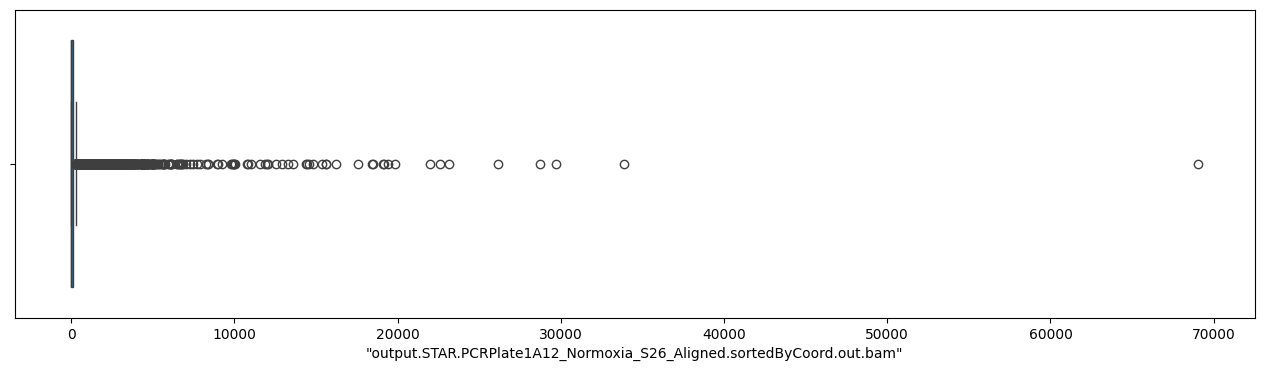

In [10]:

cnames = list(dfu.columns)
cnames[1]
plt.figure(figsize=(16,4))
sns.boxplot(x=dfu[cnames[1]])


In [11]:
print('The highest expressed gene is',dfu.iloc[:,1].idxmax(),'with',dfu.iloc[:,1].max())


The highest expressed gene is "ACTB" with 69068


Most of the values are near 0 or exactly 0, and the highest gene expression of S26 is ACTB with 69068.0.

The following violin plot shows the empirical distribution of the gene expression values of S26, with the white dot representing the median value.

<Axes: ylabel='"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"'>

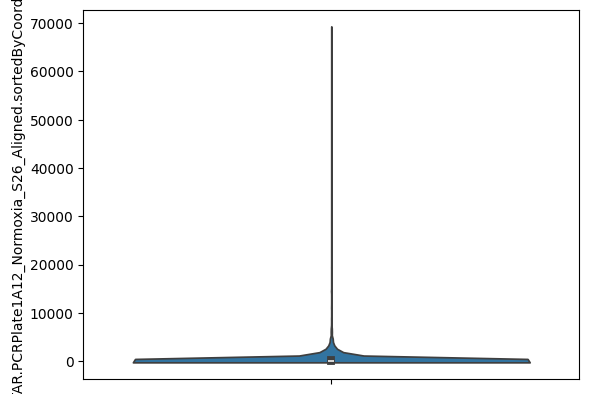

In [12]:
sns.violinplot(data=dfu[cnames[1]])

We look at the violin plot of the whole cell line. From the violin plot of the whole cell line, we can observe that the gene expressions are quite low for most of the genes, the median being quite close to zero too. This indicates that there is a quite high frequency for gene expressions equal to zero.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

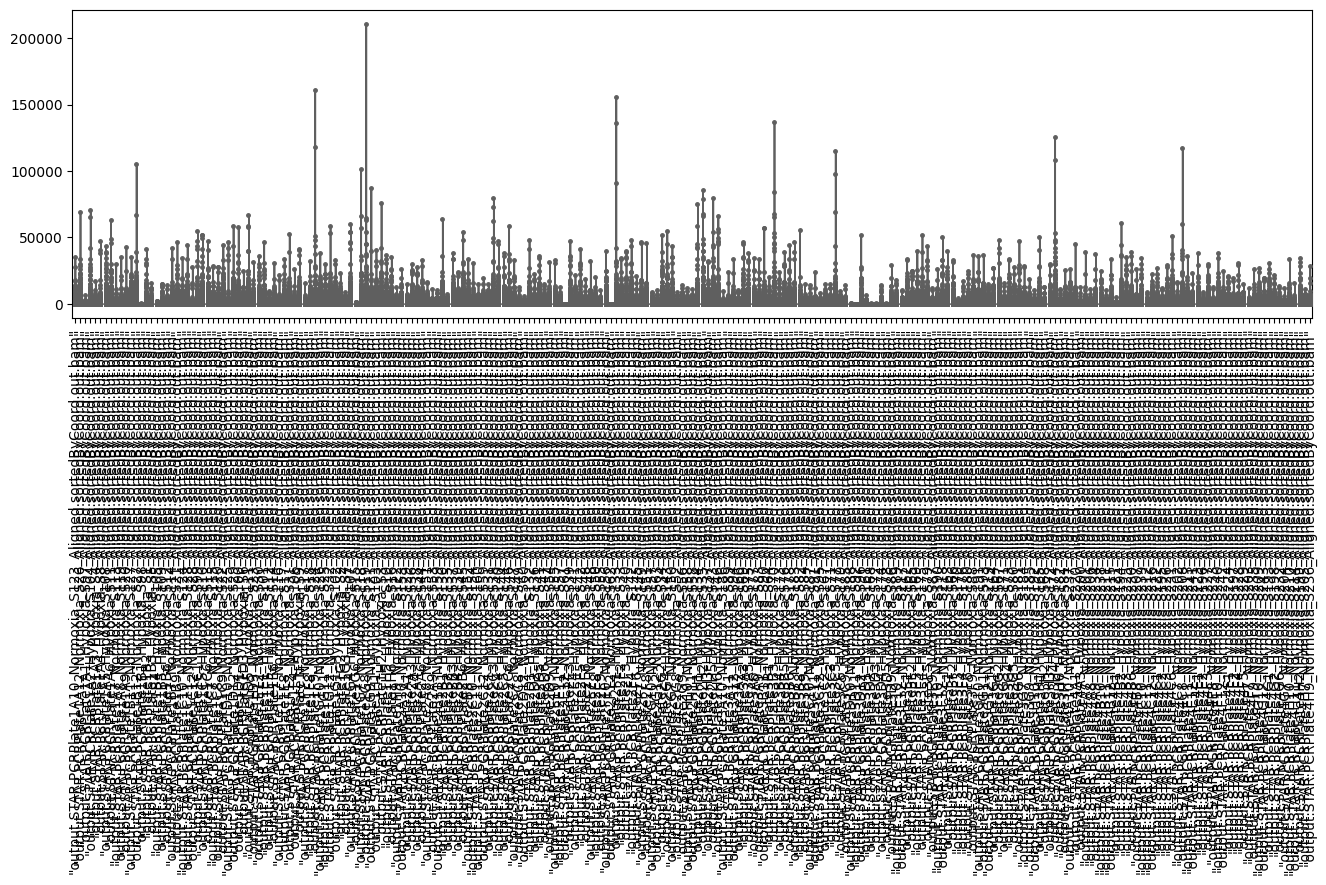

In [13]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=dfu,palette="Set3",cut=0, inner="point")
plt.setp(plot.get_xticklabels(), rotation=90)

Most of the values are 0 or around 0 for every single cells.

Such distribution can also be seen with an histogram as well.

<Axes: xlabel='"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"', ylabel='Count'>

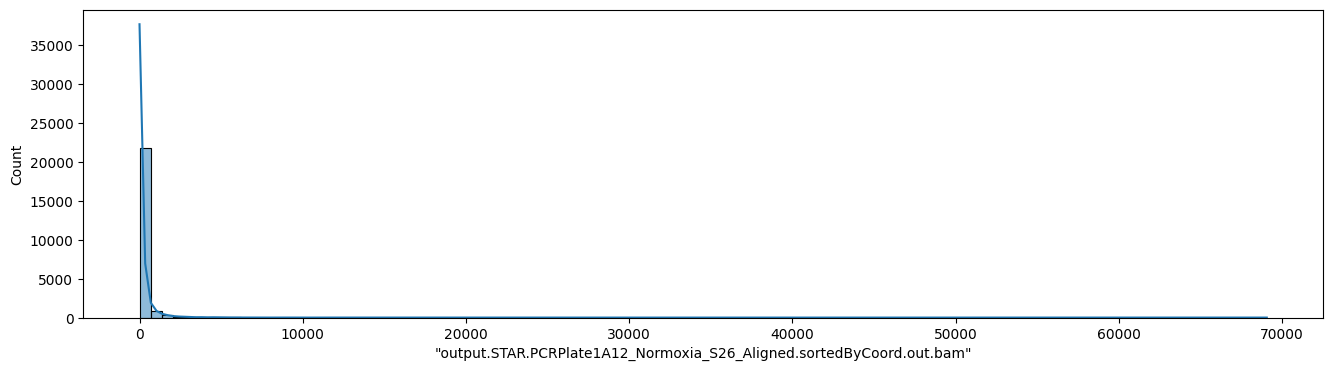

In [14]:
plt.figure(figsize=(16,4))
sns.histplot(dfu[cnames[1]], bins=100, kde=True)

### Skewness and Kurtosis

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

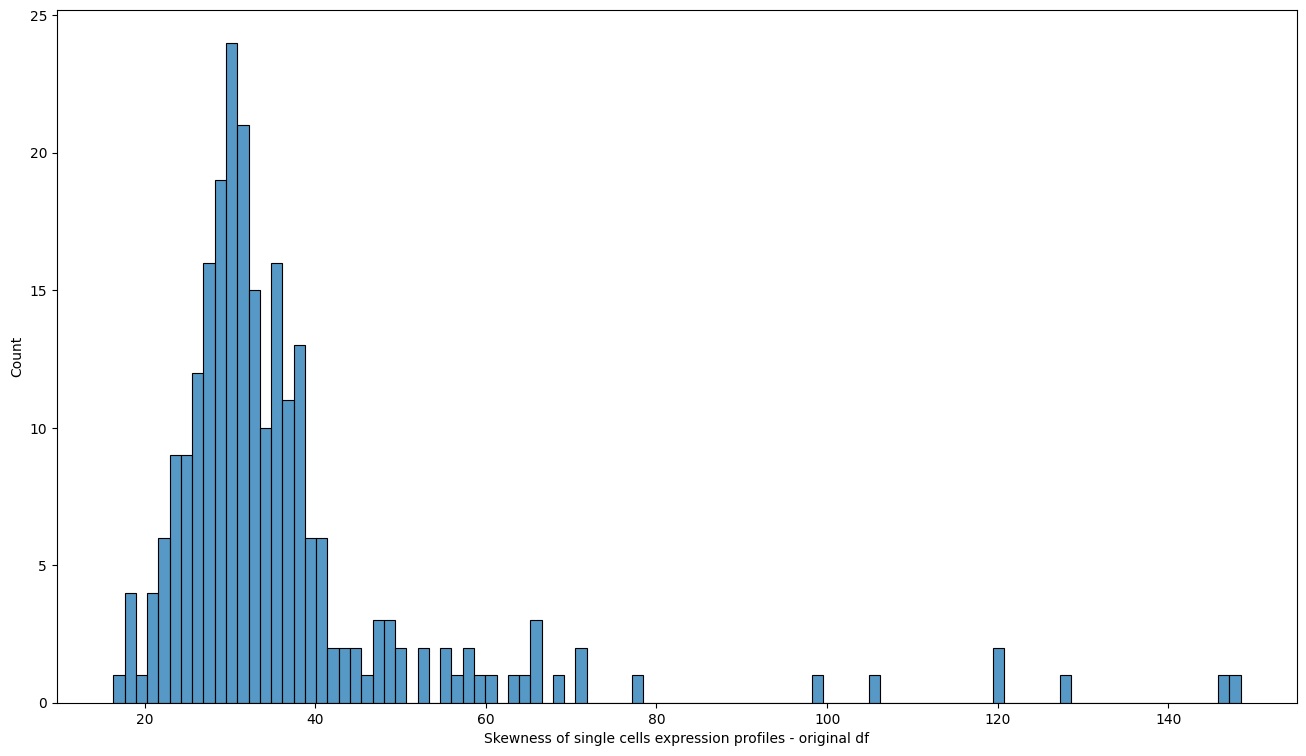

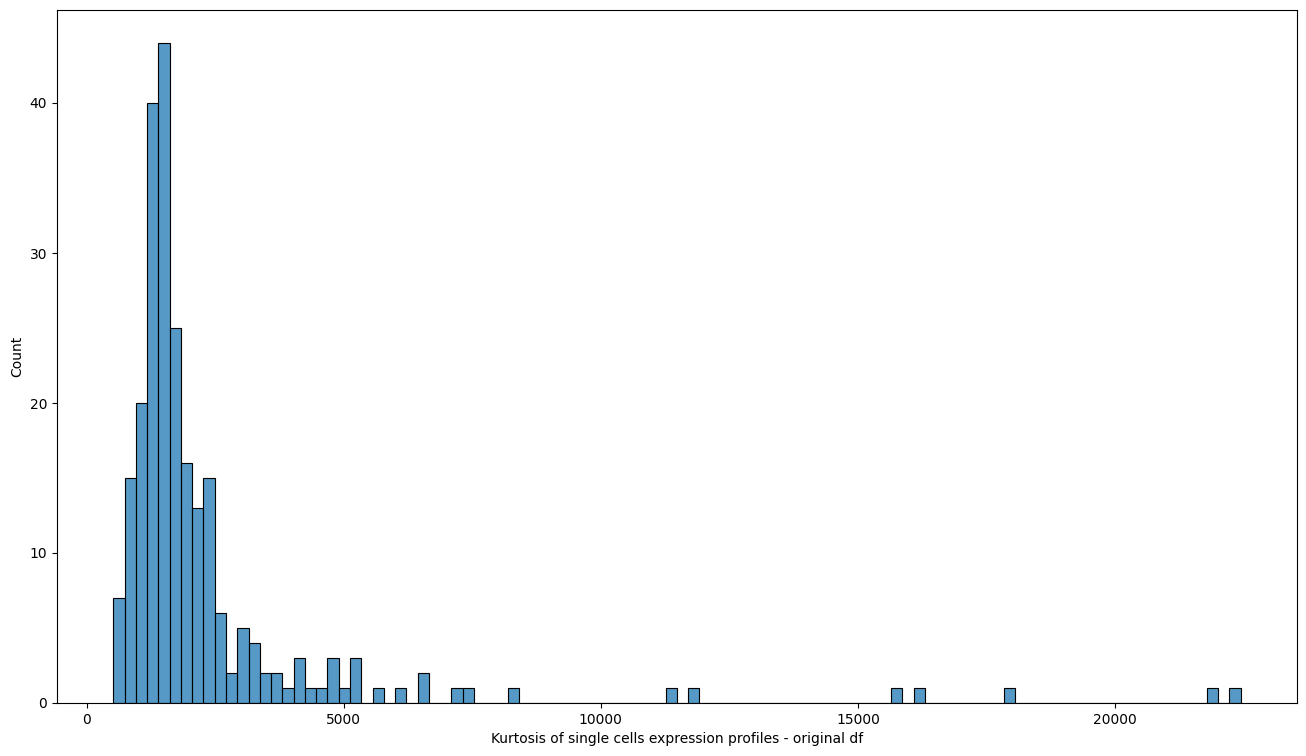

In [15]:
colN = np.shape(dfu)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = dfu[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
plt.figure(figsize=(16,9))
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')


df_kurt_cells = []
for i in range(colN) :     
     v_df = dfu[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells
plt.figure(figsize=(16,9))
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')


The skewness and kurtosis measures are used to asses whether a distribution is close or not to a normal distribution. The first measures the symmetry with respect to the mean value, while the second measures the thickness of the tails. From the first graph we see that the data is not symmetric and that the right tail is much more extended than the left one highlighting the presence of outliers. This fact is also confirmd by the kurtosis analysis which shows that the tails are thicker than those of a normal distribution.

In [16]:
sk = []
for i in range(dfu.shape[1]):
    print(f"Skew of col[{i}]: ",skew(dfu[cnames[i]]), f"     kurtosis of col[{i}]: " ,kurtosis(dfu[cnames[i]]))

Skew of col[0]:  29.060170892188808      kurtosis of col[0]:  1388.583010159152
Skew of col[1]:  26.375803364082593      kurtosis of col[1]:  1290.4301826776475
Skew of col[2]:  50.42219295095526      kurtosis of col[2]:  4079.209798054817
Skew of col[3]:  39.962261084335715      kurtosis of col[3]:  2316.7828064792766
Skew of col[4]:  40.831761136535434      kurtosis of col[4]:  2651.508589359459
Skew of col[5]:  63.23072175896631      kurtosis of col[5]:  4781.495660172821
Skew of col[6]:  26.321572538057914      kurtosis of col[6]:  967.5003508365031
Skew of col[7]:  38.16336782098296      kurtosis of col[7]:  2089.988351704901
Skew of col[8]:  71.1522146807669      kurtosis of col[8]:  7441.513802172525
Skew of col[9]:  56.09724027024084      kurtosis of col[9]:  4497.648192314962
Skew of col[10]:  48.99814039787873      kurtosis of col[10]:  3897.421744461462
Skew of col[11]:  18.464775901153637      kurtosis of col[11]:  581.4072589704341
Skew of col[12]:  47.15195689494234      

In [17]:
xnorm = np.random.normal(0, 2, 10000000)   # create random values based on a normal distribution
xnorm 

print( "Excess kurtosis of normal distribution: ",  kurtosis(xnorm) )
print( "Skewness of normal distribution: ", skew(xnorm) )
#

Excess kurtosis of normal distribution:  -0.0007324287248007266
Skewness of normal distribution:  -0.001008727400686588


In summary, comparing the skewness and kurtosis values of our dataset with the normal distribution's ones, the genes expression distribution is right-skewed and highly non-normal with heavy tails, since both values significantly differ positively from 0.

## Outlier detection

We could implement the interquantile range method, but the results are not very satisfying:

In [18]:
Q1 = dfu.quantile(0.25)
Q3 = dfu.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_iqr = dfu[~((dfu < (Q1 - 1.5 * IQR)) |(dfu > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.head()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     51.0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     125.0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         5.0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       40.0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         22.0
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     76.0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     24.0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       68.0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      22.0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      44.0
Length: 243, dtype: float64


"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        
"WASH9P"                                                    0                        
"OR4F29"                                                    2                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       
"WASH9P"                                                    0                       
"OR4F29"                                                    0                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     
"WASH9P"                                                    0                     
"OR4F29"                                                    0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      
"WASH9P"                                                    0                      
"OR4F29"                                                    0                      

            "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  0                    
"WASH9P"                                                    0                    
"OR4F29"                                                    0                    

            "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  1                    
"WASH9P"                                                    0                    
"OR4F29"                                                    0                    

            "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      
"WASH9P"                                                    0                      
"OR4F29"                                                    1                      

            "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     
"WASH9P"                                                    0                     
"OR4F29"                                                    0             

In [19]:
df_iqr.shape

(10815, 243)

We'd rather implement outlier detection by selecting the data which lies in [-6std,6std] from the median value of our distribution, given the fact that the mean could be skewed by very large outliers:

In [20]:
df_std= dfu[~((dfu < (dfu.mean() - 3 * dfu.std())) |(dfu > (dfu.mean() + 3*dfu.std()))).any(axis=1)]
print(df_std.shape)

(22047, 243)


We need more filtering, such as looking for really low gene expression, low variance values and duplicates.

### Duplicates delection

We inspect if there are duplicate rows, i.e. whether there are some genes whose expression in the different cells is unvaried.

In [21]:
duplicate_rows_df = df_std[df_std.duplicated(keep=False)]
print("shape of duplicate rows: ", duplicate_rows_df.shape)
print("number of duplicate rows: ", duplicate_rows_df)


shape of duplicate rows:  (89, 243)
number of duplicate rows:               "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                        
"LINC01647"                                                  0                        
"LINC01361"                                                  0                        
"ITGA10"                                                     0                        
"RORC"                                                       0                        
...                                                        ...                        
"ENPP7"                                                      0                        
"DTNA"                                                       0                        
"ALPK2"                                                      0                        
"OR7G2"                                                      0     

In [22]:
print(duplicate_rows_df.T)
c_dupl = duplicate_rows_df.T.corr()
c_dupl

                                                    "MMP23A"  "LINC01647"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...         0            0   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....         0            0   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...         0            0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...         0            0   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...         0            0   
...                                                      ...          ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...         0            0   
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...         0            0   
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...         0            0   
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....         0            0   
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....         0            0   

                                                    "LINC01361"  "ITGA10"  

"MMP23A"  "LINC01647"  "LINC01361"  "ITGA10"    "RORC"   "GPA33"  \
"MMP23A"     1.000000    -0.008299    -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647" -0.008299     1.000000     0.495851  0.495851 -0.008299  0.495851   
"LINC01361" -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ITGA10"    -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"RORC"      -0.008299    -0.008299     0.495851  0.495851  1.000000  0.495851   
...               ...          ...          ...       ...       ...       ...   
"ENPP7"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"DTNA"      -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ALPK2"     -0.006540     0.788121     0.081755  0.081755 -0.006540  0.081755   
"OR7G2"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"PLVAP"     -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   

              "OR2M4"  "LINC01247"  "SNORD92"  "LINC01106"  ...  "MSX2P1"  \
"MMP23A"    -0.008299    -0.008299  -0.008299    -0.010083  ... -0.008299   
"LINC01647" -0.008299     0.495851  -0.008299     0.234944  ... -0.008299   
"LINC01361"  0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"ITGA10"     0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"RORC"       1.000000    -0.008299  -0.008299    -0.010083  ... -0.008299   
...               ...          ...        ...          ...  ...       ...   
"ENPP7"     -0.008299     0.495851  -0.008299    -0.010083  ... -0.008299   
"DTNA"       0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   
"ALPK2"     -0.006540     0.081755  -0.006540     0.335362  ... -0.006540   
"OR7G2"     -0.008299     0.495851  -0.008299    -0.010083  ... -0.008299   
"PLVAP"      0.495851     0.495851  -0.008299    -0.010083  ... -0.008299   

             "MIR548D2"  "MIR548AA2"  "KCNJ16"  "CD300A"   "ENPP7"    "DTNA"  \
"MMP23A"      -0.009421    -0.009421 -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647"   -0.009421    -0.009421  0.495851  0.495851  0.495851  0.495851   
"LINC01361"   -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"ITGA10"      -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"RORC"        -0.009421    -0.009421 -0.008299  0.495851 -0.008299  0.495851   
...                 ...          ...       ...       ...       ...       ...   
"ENPP7"       -0.009421    -0.009421  0.495851  0.495851  1.000000  0.495851   
"DTNA"        -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   
"ALPK2"       -0.007425    -0.007425  0.081755  0.081755  0.081755  0.081755   
"OR7G2"       -0.009421    -0.009421  0.495851  0.495851  0.495851  0.495851   
"PLVAP"       -0.009421    -0.009421  0.495851  1.000000  0.495851  1.000000   

              "ALPK2"   "OR7G2"   "PLVAP"  
"MMP23A"    -0.006540 -0.008299 -0.008299  
"LINC01647"  0.788121  0.495851  0.495851  
"LINC01361"  0.081755  0.495851  1.000000  
"ITGA10"     0.081755  0.495851  1.000000  
"RORC"      -0.006540 -0.008299  0.495851  
...               ...       ...       ...  
"ENPP7"      0.081755  0.495851  0.495851  
"DTNA"       0.081755  0.495851  1.000000  
"ALPK2"      1.000000  0.081755  0.081755  
"OR7G2"      0.081755  1.000000  0.495851  
"PLVAP"      0.081755  0.495851  1.000000  

[89 rows x 89 columns]

In [23]:
duplicate_rows_df.T.describe()

"MMP23A"  "LINC01647"  "LINC01361"    "ITGA10"      "RORC"  \
count  243.000000   243.000000   243.000000  243.000000  243.000000   
mean     0.008230     0.008230     0.008230    0.008230    0.008230   
std      0.090534     0.090534     0.090534    0.090534    0.090534   
min      0.000000     0.000000     0.000000    0.000000    0.000000   
25%      0.000000     0.000000     0.000000    0.000000    0.000000   
50%      0.000000     0.000000     0.000000    0.000000    0.000000   
75%      0.000000     0.000000     0.000000    0.000000    0.000000   
max      1.000000     1.000000     1.000000    1.000000    1.000000   

          "GPA33"     "OR2M4"  "LINC01247"   "SNORD92"  "LINC01106"  ...  \
count  243.000000  243.000000   243.000000  243.000000   243.000000  ...   
mean     0.008230    0.008230     0.008230    0.008230     0.041152  ...   
std      0.090534    0.090534     0.090534    0.090534     0.372552  ...   
min      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
25%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
50%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
75%      0.000000    0.000000     0.000000    0.000000     0.000000  ...   
max      1.000000    1.000000     1.000000    1.000000     5.000000  ...   

         "MSX2P1"  "MIR548D2"  "MIR548AA2"    "KCNJ16"    "CD300A"  \
count  243.000000  243.000000   243.000000  243.000000  243.000000   
mean     0.008230    0.024691     0.024691    0.008230    0.008230   
std      0.090534    0.239247     0.239247    0.090534    0.090534   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.000000    0.000000    0.000000   
50%      0.000000    0.000000     0.000000    0.000000    0.000000   
75%      0.000000    0.000000     0.000000    0.000000    0.000000   
max      1.000000    3.000000     3.000000    1.000000    1.000000   

          "ENPP7"      "DTNA"     "ALPK2"     "OR7G2"     "PLVAP"  
count  243.000000  243.000000  243.000000  243.000000  243.000000  
mean     0.008230    0.008230    0.037037    0.008230    0.008230  
std      0.090534    0.090534    0.516931    0.090534    0.090534  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    8.000000    1.000000    1.000000  

[8 rows x 89 columns]

We see that there are 89 duplicate genes.

In [24]:
df_noDup = df_std.drop_duplicates()
df_noDup.count()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    21993
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     21993
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"       21993
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      21993
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"        21993
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    21993
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    21993
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      21993
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     21993
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     21993
Length: 243, dtype: int64

In [25]:
df_std = df_noDup
print("The shape of the dataframe after removing the duplicates is: ", df_std.shape)

The shape of the dataframe after removing the duplicates is:  (21993, 243)


### Removing cells and genes with a low expression

In [26]:
row_zeros = (df_std == 0).sum(axis=1) / df_std.shape[1]
col_zeros = (df_std == 0).sum(axis=0) / df_std.shape[0]
rows_to_drop = row_zeros[row_zeros > 0.99].index
cols_to_drop = col_zeros[col_zeros > 0.99].index
df_new_filtered = df_std.drop(rows_to_drop, axis=0).drop(cols_to_drop, axis=1)
print("The shape of the dataframe without rows and columns with 0.99 or more of zero values is: ", df_new_filtered.shape)

The shape of the dataframe without rows and columns with 0.99 or more of zero values is:  (20479, 235)


In [27]:
df_std = df_new_filtered

### Correlation Heatmaps

In [28]:
cp = df_std.corr()
cp_median=cp.median(axis=1)
sorted(np.array(cp_median))


[0.1762836124408855,
 0.3183473024994642,
 0.4015948857871819,
 0.4118950496595267,
 0.4566361086174877,
 0.4754958331937437,
 0.48508786198936904,
 0.5007785624808673,
 0.5197832938684136,
 0.5444888652358566,
 0.5558905806832738,
 0.5629145415000811,
 0.5630014872680681,
 0.5630148071139471,
 0.570149628253729,
 0.5704481871812564,
 0.5758091932727218,
 0.577135575272393,
 0.5831249683302258,
 0.5834114143548018,
 0.5886915908702381,
 0.5986171972759577,
 0.599178182854119,
 0.6010100580419654,
 0.6022581411850941,
 0.6065535989514165,
 0.6081118786465465,
 0.6109891747950935,
 0.6139400294519947,
 0.6139740061327649,
 0.614515103529254,
 0.6152826753985936,
 0.6153381140687172,
 0.6272111352542138,
 0.6307714262162631,
 0.6316582164415487,
 0.6374864455032647,
 0.6385135548811016,
 0.6389297354747624,
 0.641693975475336,
 0.6435929044571292,
 0.6446215100203408,
 0.6451661042990825,
 0.6464620233659737,
 0.6468630700243885,
 0.6499874037126326,
 0.6511562121185538,
 0.65308869589732

Number of cells included:  (235, 235)
Average correlation of expression profiles between cells:  0.5473769906940684
Min. correlation of expression profiles between cells:  0.09475398138813688


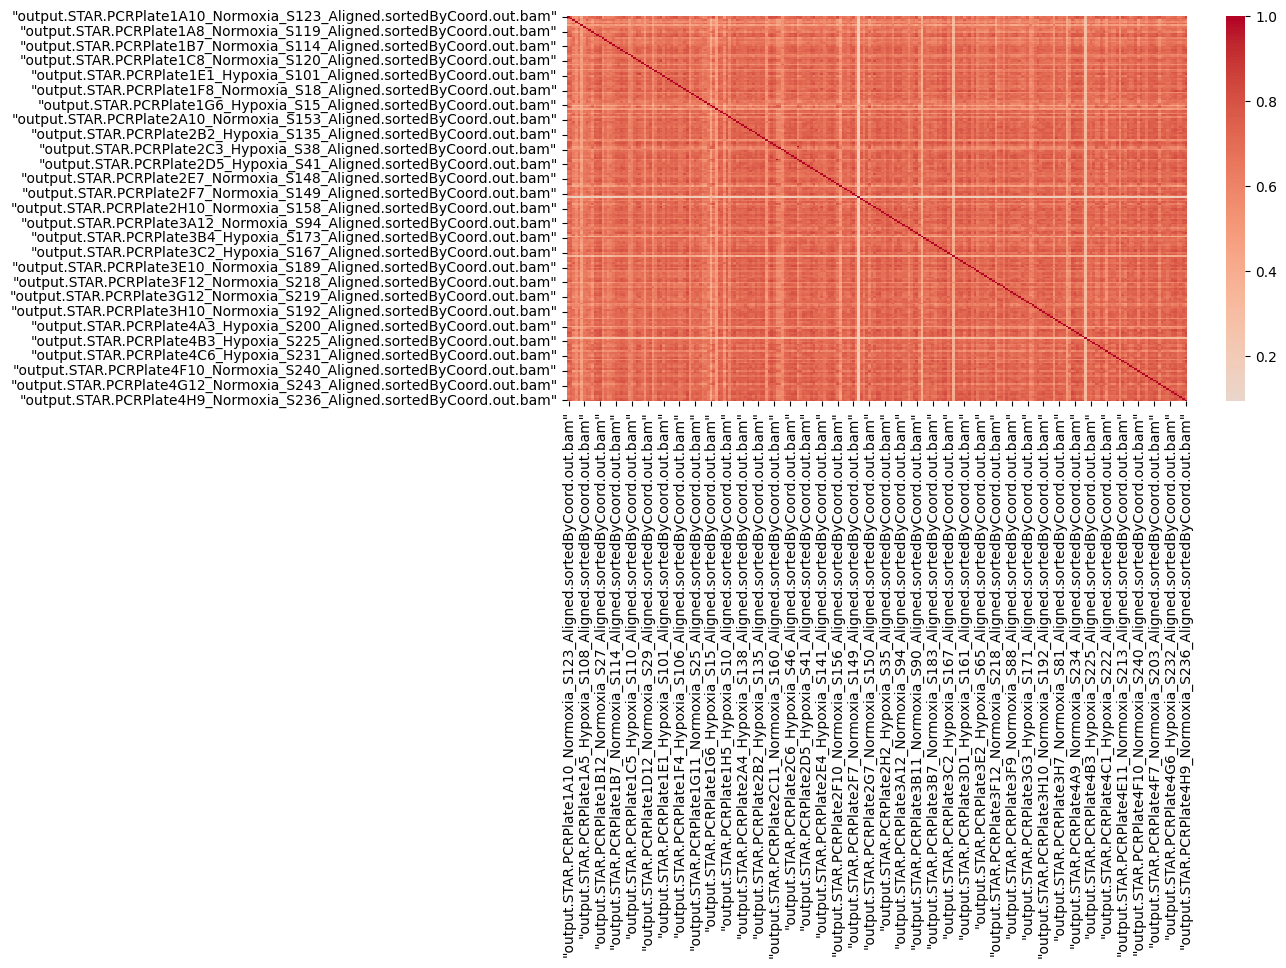

In [29]:
plt.figure(figsize=(10,5))
#df_small = dfu.iloc[:, 100:117]
#cp= df_small.corr()
midpoint = (cp.values.max() - cp.values.min()) /2 + cp.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(cp,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(cp))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", cp.values.min())

In [30]:
nan_df = cp[cp.iloc[:,1].isna()]
nan_df.index

Index([], dtype='object')

In [31]:
cp_remove=cp_median[cp_median<0.4]
cp_remove.index

Index(['"output.STAR.PCRPlate2G10_Normoxia_S157_Aligned.sortedByCoord.out.bam"', '"output.STAR.PCRPlate4B1_Hypoxia_S221_Aligned.sortedByCoord.out.bam"'], dtype='object')

In [32]:
df_std=df_std.drop(columns=cp_remove.index)

Number of cells included:  (233, 233)
Average correlation of expression profiles between cells:  0.6271917337161756
Min. correlation of expression profiles between cells:  0.25438346743235146


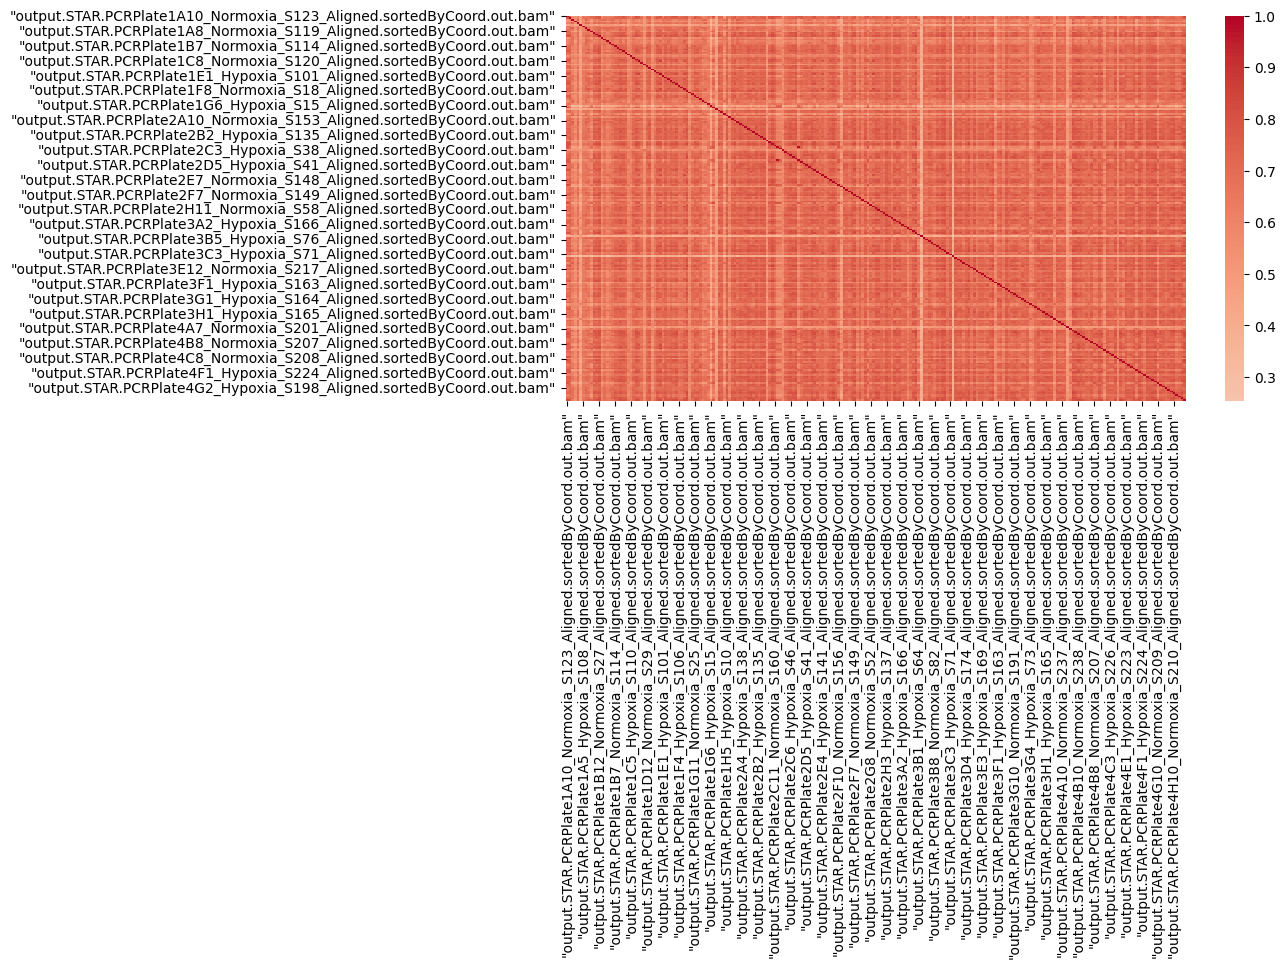

In [33]:
plt.figure(figsize=(10,5))
#df_small = df_std.iloc[:, 100:117]
cp= df_std.corr()
midpoint = (cp.values.max() - cp.values.min()) /2 + cp.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(cp,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(cp))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", cp.values.min())

Text(0.5, 0, 'Correlation between cells expression profiles')

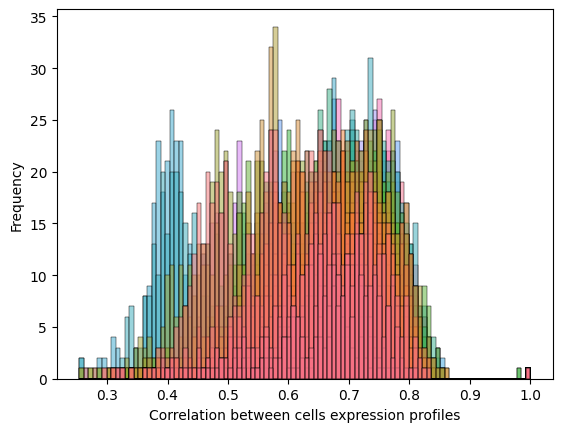

In [34]:
sns.histplot(cp,bins=100,legend=False)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

Overall, both from the correlation matrix and the histogram we can observe that the data is quite correlated however not highly correlated. This implies that the data with high correlation is probably the one with a great impact on the condition of the cell rather than the ones with lower correlation. 

### Filtering using Index of Dispersion

In [35]:
variances = df_std.var()
print('The cells variances are :',variances)

The cells variances are : "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    13508.676543
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     52329.223789
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         136.219198
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      41557.514490
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         1877.205824
                                                                              ...     
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    13504.864613
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     1680.884897
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      14483.097790
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      1686.938177
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      7468.704389
Length: 233, dtyp

In [36]:
means = df_std.mean()
print('The cells means are :',means)

The cells means are : "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     49.087211
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     106.169051
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         4.807071
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       77.259144
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         19.190878
                                                                             ...    
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     58.675424
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     19.661605
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       55.740368
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      19.038918
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      39.866400
Length: 233, dtype: float64


In [37]:
indis = variances/means
print('The cells indexes of dispersion are :',indis)

The cells indexes of dispersion are : "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    275.197474
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     492.885857
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"        28.337257
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      537.897686
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         97.817608
                                                                             ...    
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    230.162201
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     85.490728
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      259.831398
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      88.604730
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     187.343338
Length: 233, dtype: float64

In [38]:
cells_to_drop = indis[indis<30].index
cells_to_drop

Index(['"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1B4_Hypoxia_S105_Aligned.sortedByCoord.out.bam"',
       '"output.STAR.PCRPlate1G6_Hypoxia_S15_Aligned.sortedByCoord.out.bam"'],
      dtype='object')

In [39]:
df_filt_indis=df_std.drop(columns=cells_to_drop)
df_filt_indis.shape

(20479, 230)

In [40]:
df_std = df_filt_indis

In [41]:
dfu = df_std

After removing the cell with low variance to mean ratio we reduced the data set once again. This aims to remove cells that have low relative variability, suggesting more consistent expression, therefore implying gene expressions gave little information.

## Data normalization

Data normalization is a preprocessing procedure which involves transforming the data using a common scaler, in order not to have any significantly dominant feature during the analysis process. 

We are going to use several types of scalers and see empirically which one is better.

Log Normalization

We first try apply the logarithmic scaler to our dataset, since it mostly effective on right-skewed data distributions.

<Axes: xlabel='"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"'>

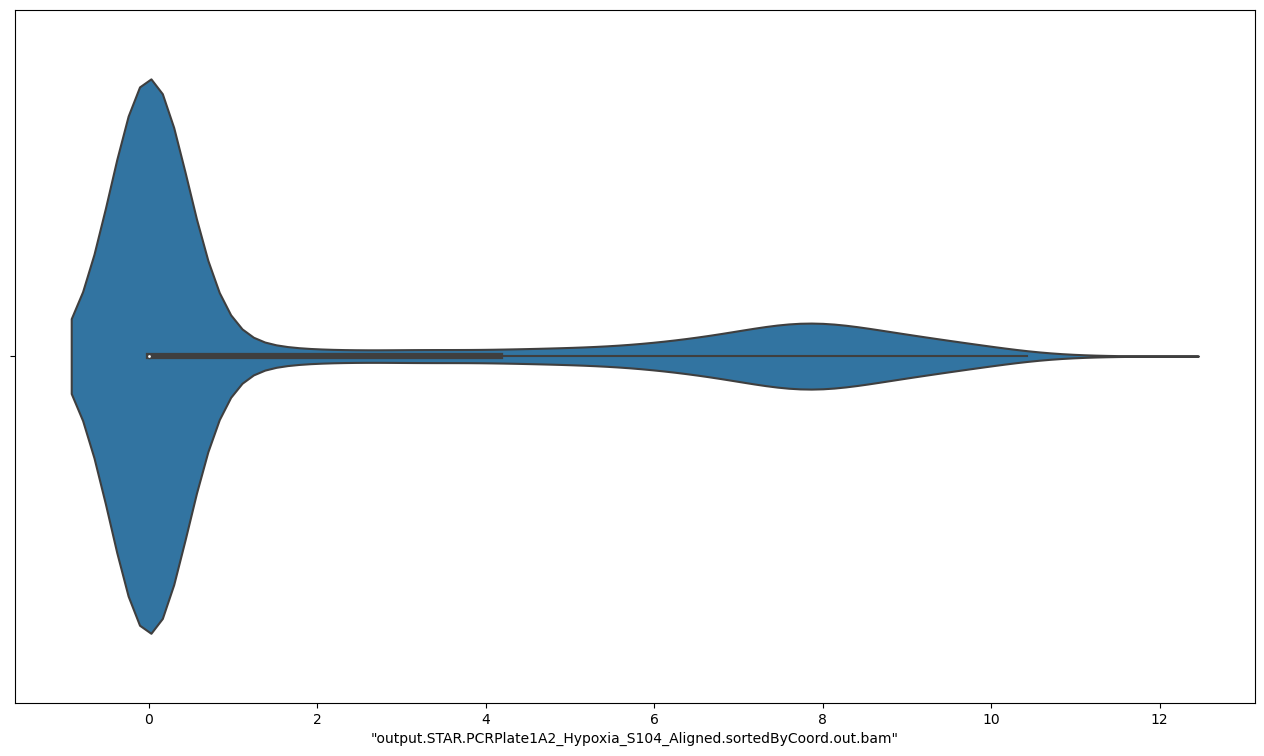

In [ ]:
cnames = list(dfu.columns)
cnames[2]
dfu2_log2 = np.log2(dfu[cnames[2]]+1)
plt.figure(figsize=(16,9))
sns.violinplot(x=dfu2_log2)

The description of the log dataframe for S104 is:

In [ ]:
display(dfu2_log2.describe().round(2))

count    20479.00
mean         2.04
std          3.36
min          0.00
25%          0.00
50%          0.00
75%          4.17
max         11.54
Name: "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam", dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

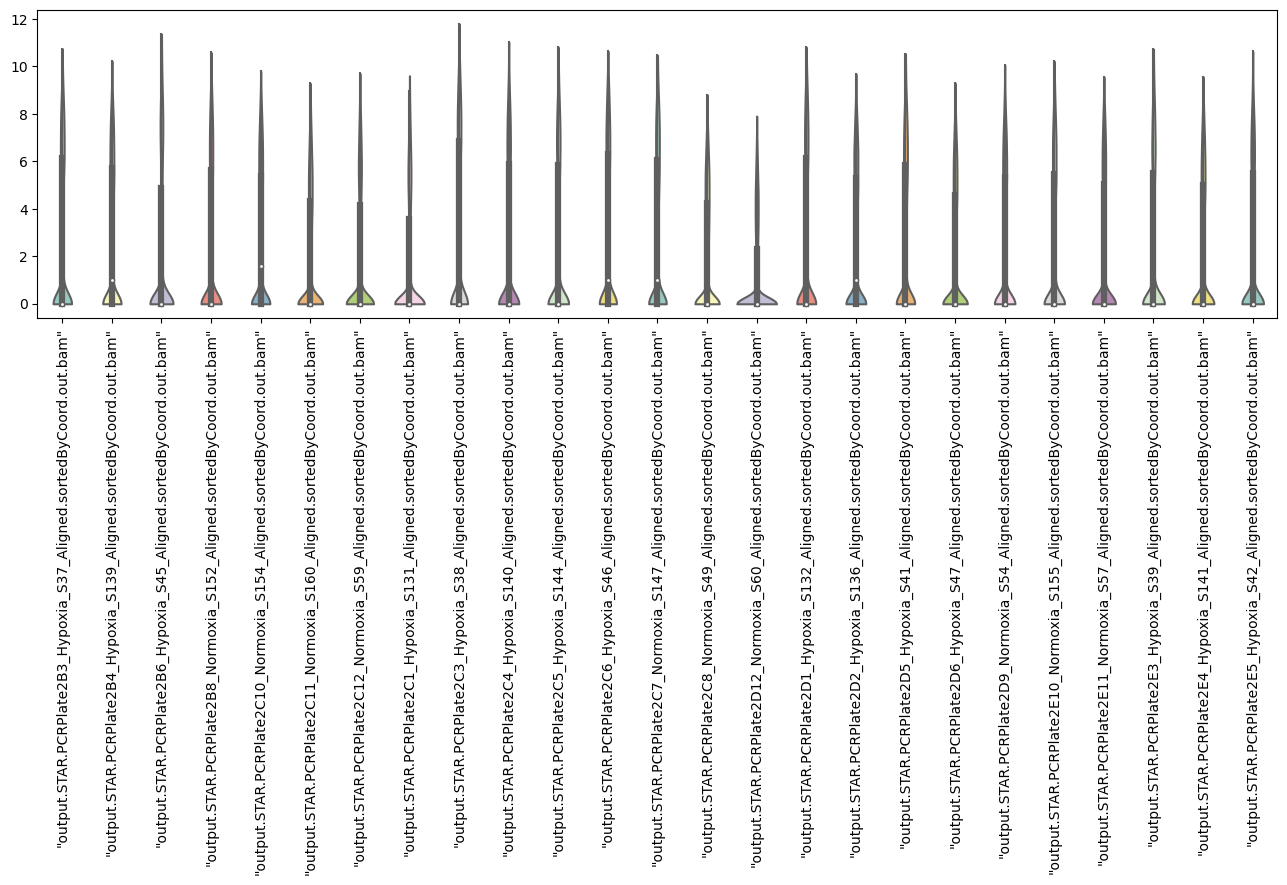

In [ ]:
df1 = dfu + 1
df1_log2 = df1.apply(np.log2)
df1_log2_small = df1_log2.iloc[:, 70:95]
np.shape(df1_log2_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df1_log2_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df')

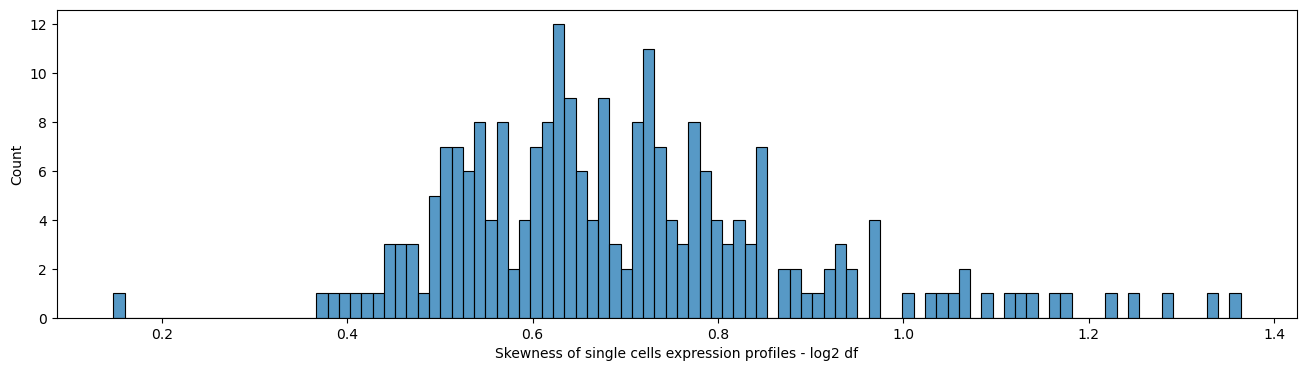

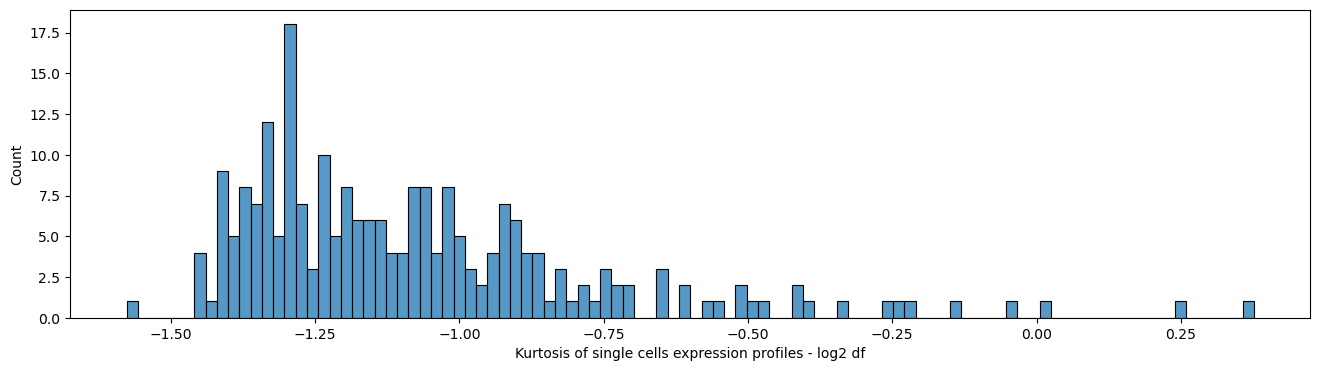

In [ ]:
df1_log2_skew_cells = []
for i in range(len(dfu.columns)) :     
     v_df = df1_log2[cnames[i]]
     df1_log2_skew_cells += [skew(v_df)]   
df1_log2_skew_cells
plt.figure(figsize=(16,4))
sns.histplot(df1_log2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - log2 df')

df1_log2_kurt_cells = []
for i in range(len(dfu.columns)) :     
     v_df = df1_log2[cnames[i]]
     df1_log2_kurt_cells += [kurtosis(v_df)] 
df1_log2_kurt_cells
plt.figure(figsize=(16,4))
sns.histplot(df1_log2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df')

We can see the that both values of kurtosis and skewness dropped and are now near zero, resembling a normal distribution (even though the values are not perfectly aligned, but looking for a distribution close to the standard is often useless in experiments).

In [ ]:
print("The skewness values after applying the log transformation are:",df1_log2.skew())
print('min skewness:', min(df1_log2.skew()),'max skewness:',max(df1_log2.skew()))
print("The kurtosis values after applying the log transformation are:",df1_log2.kurtosis())
print('min kurtosis:', min(df1_log2.kurtosis()),'max kurtosis:',max(df1_log2.kurtosis()))


The skewness values after applying the log transformation are: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    0.716310
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     0.574140
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      1.223991
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"        0.824643
"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"        1.160621
                                                                            ...   
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    0.421766
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    0.686560
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      0.639706
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     0.777002
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     0.557002
Length: 230, dtype: floa

The distribution is close to the normal one.


/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

<Figure size 1600x900 with 0 Axes>

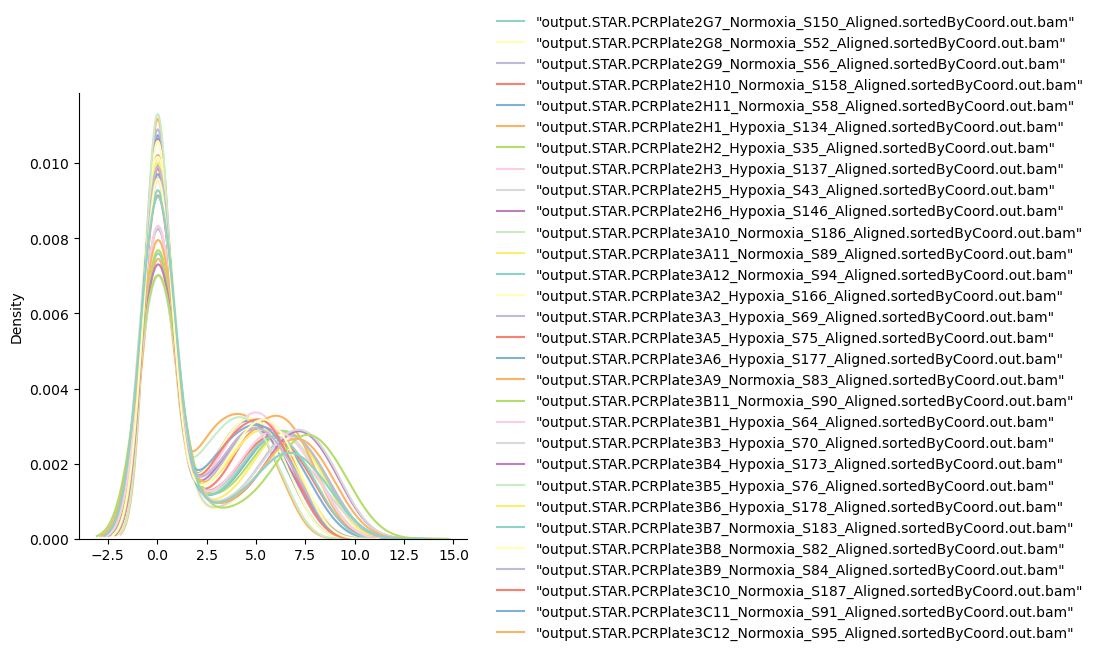

<Figure size 1600x900 with 0 Axes>

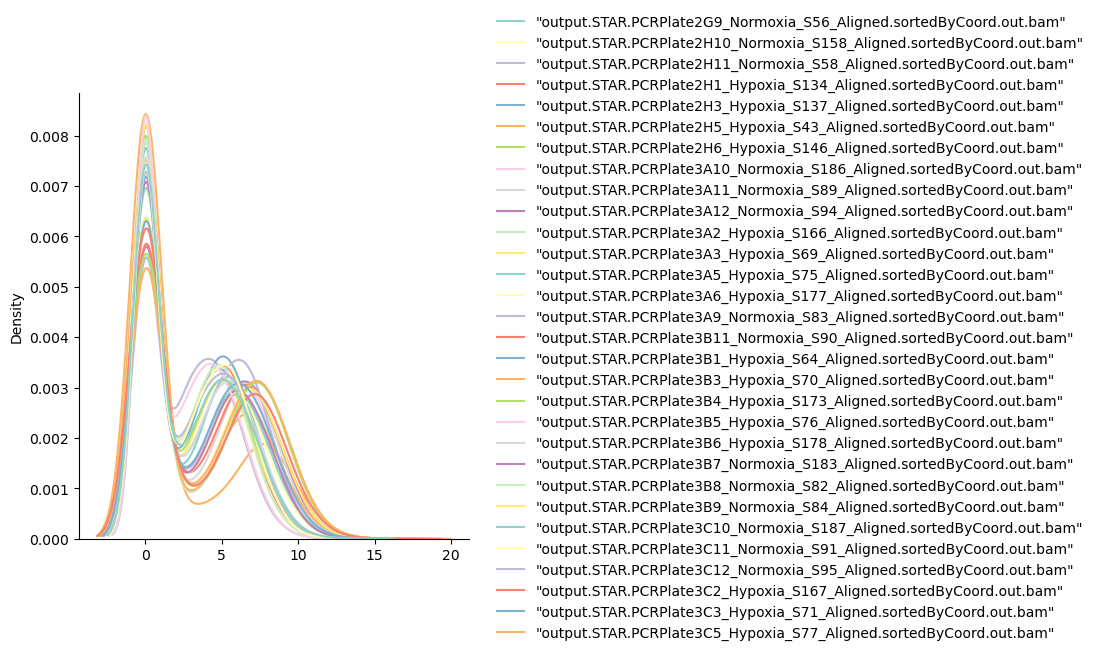

<Figure size 1600x900 with 0 Axes>

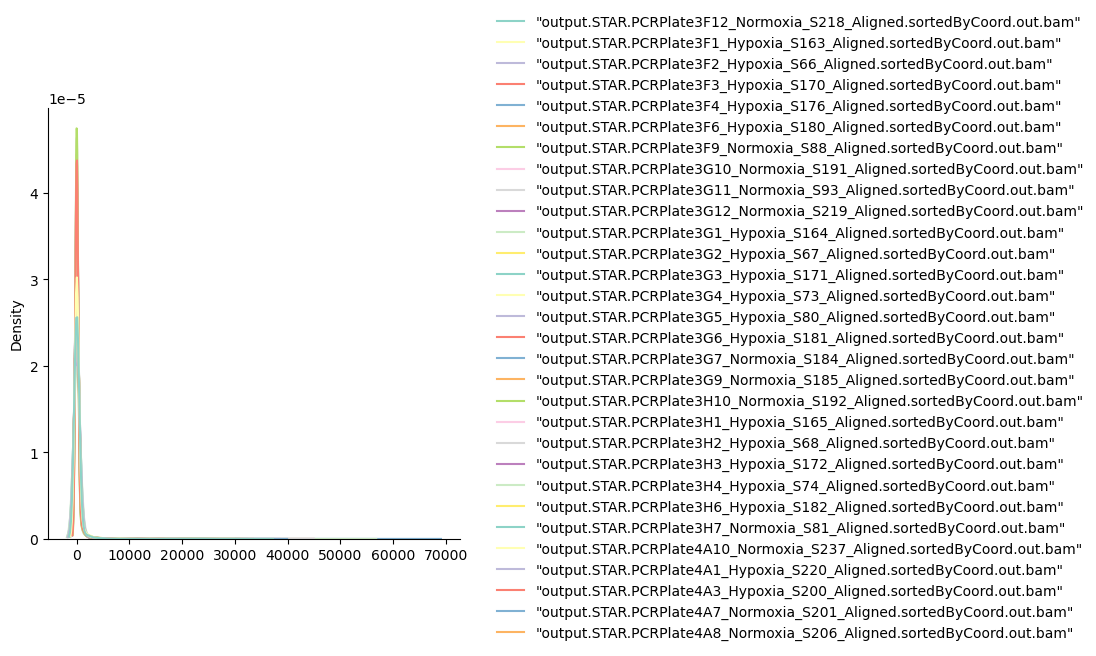

In [ ]:
#Graph with unfiltered
df_small = df1_log2.iloc[:, 110:140]  #just selecting part of the samples so run time not too long
plt.figure(figsize=(16,9))
sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2)
#Graph with filtered but not normalized
df2 = dff + 1
df2_log2 = df2.apply(np.log2)
df_small2 = df2_log2.iloc[:, 110:140]  #just selecting part of the samples so run time not too long
plt.figure(figsize=(16,9))
sns.displot(data=df_small2,palette="Set3",kind="kde", bw_adjust=2)
#Graph with filtered and normalized
#df3 = dfn + 1
#df3_log2 = df3.apply(np.log2)
df_small3 = df1.iloc[:, 110:140]  #just selecting part of the samples so run time not too long
plt.figure(figsize=(16,9))
sns.displot(data=df_small3,palette="Set3",kind="kde", bw_adjust=2)



But, by looking at the graphs, we can visualize huge differences in the distributions of our filtered data and the filtered and normalized ones.

### Normalizer

Preprocessing.normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples.

In [ ]:
df_norm1 = pd.DataFrame(preprocessing.normalize(dfu))


In [ ]:
df_norm1.head()

0    1    2    3         4         5    6         7    8         9    \
0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
1  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
2  0.000000  0.0  0.0  0.0  0.042033  0.000000  0.0  0.000000  0.0  0.042033   
3  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.074953  0.0  0.000000   
4  0.285714  0.0  0.0  0.0  0.000000  0.142857  0.0  0.000000  0.0  0.000000   

   ...  220  221  222  223  224       225  226       227  228  229  
0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  
1  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  
2  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  
3  ...  0.0  0.0  0.0  0.0  0.0  0.074953  0.0  0.074953  0.0  0.0  
4  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  

[5 rows x 230 columns]

/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/

<Figure size 1600x900 with 0 Axes>

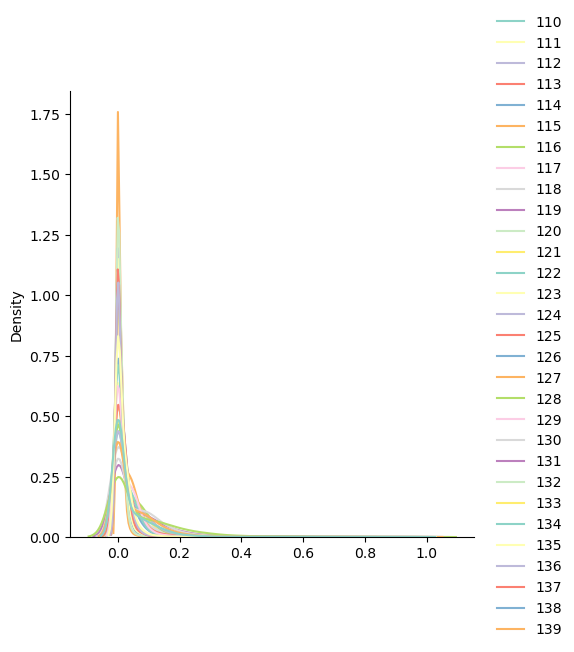

<Figure size 1600x900 with 0 Axes>

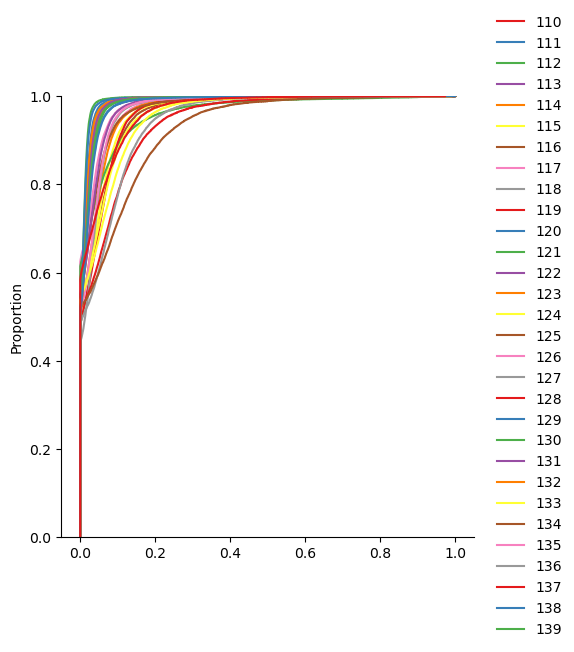

<Figure size 1600x900 with 0 Axes>

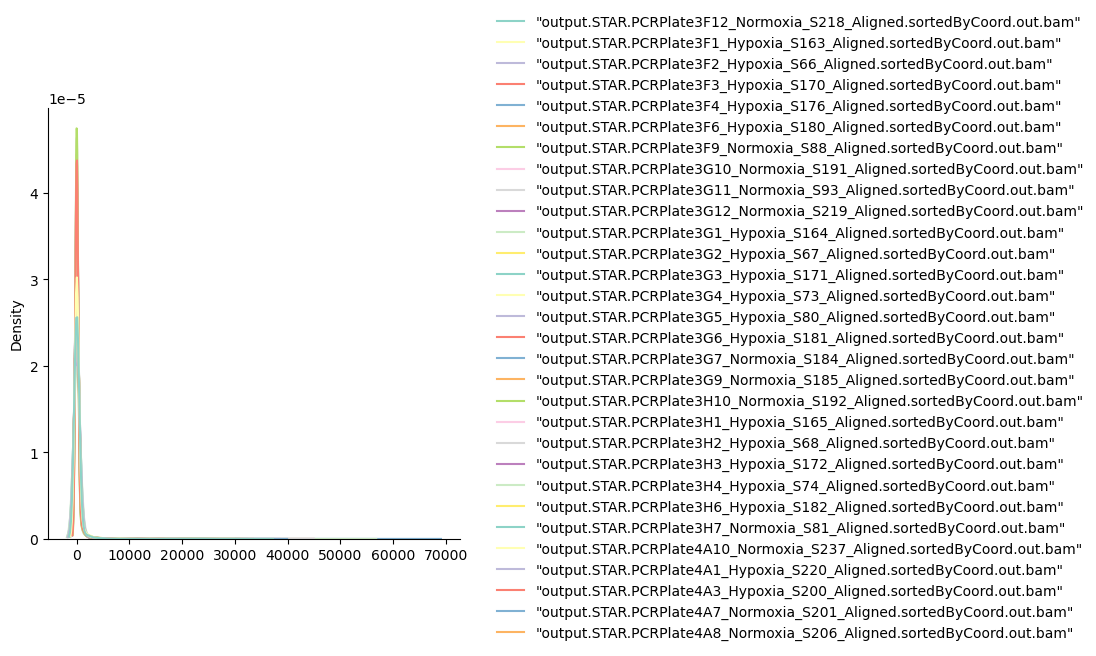

<Figure size 1600x900 with 0 Axes>

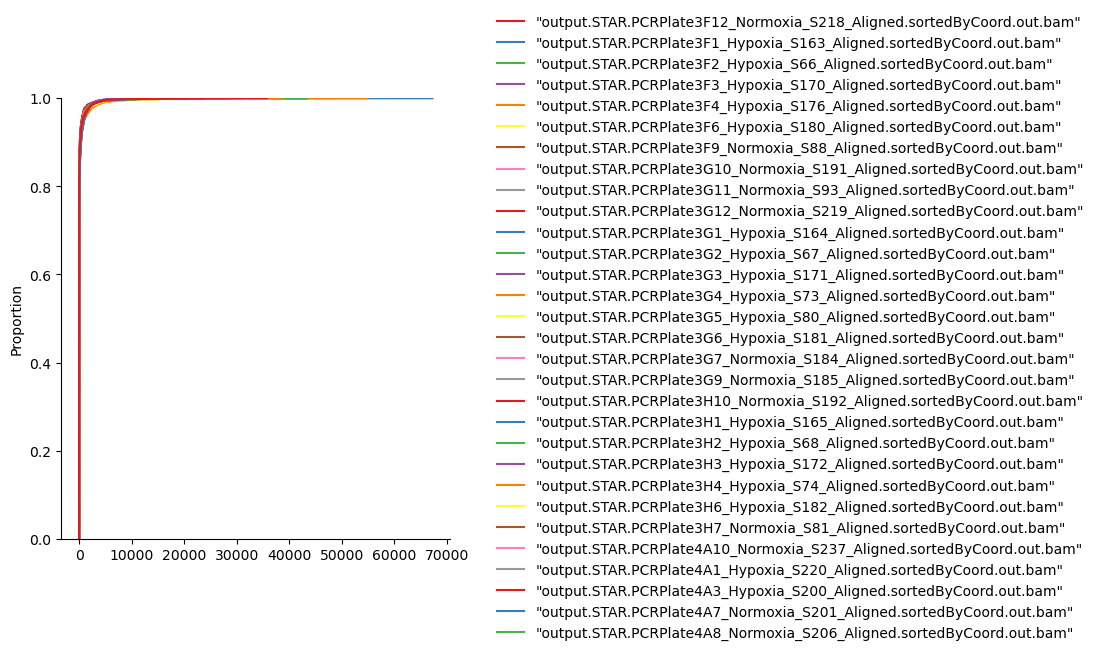

In [ ]:
plt.figure(figsize=(16,9))
sns.displot(data = df_norm1.iloc[:,110:140], palette = "Set3", kind = 'kde',  bw_adjust=2)
plt.figure(figsize=(16,9))
sns.displot(data = df_norm1.iloc[:,110:140], palette = "Set1", kind = 'ecdf')
plt.figure(figsize=(16,9))
sns.displot(data=df_small3,palette="Set3",kind="kde", bw_adjust=2)
plt.figure(figsize=(16,9))
sns.displot(data = df_small3, palette = "Set1", kind = 'ecdf')

/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Kurtosis of single cells expression profiles - norm2 df')

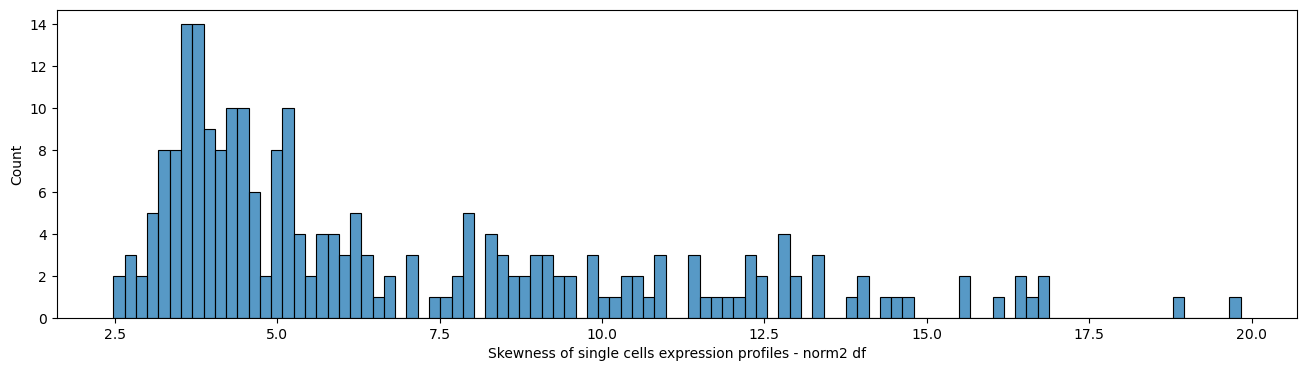

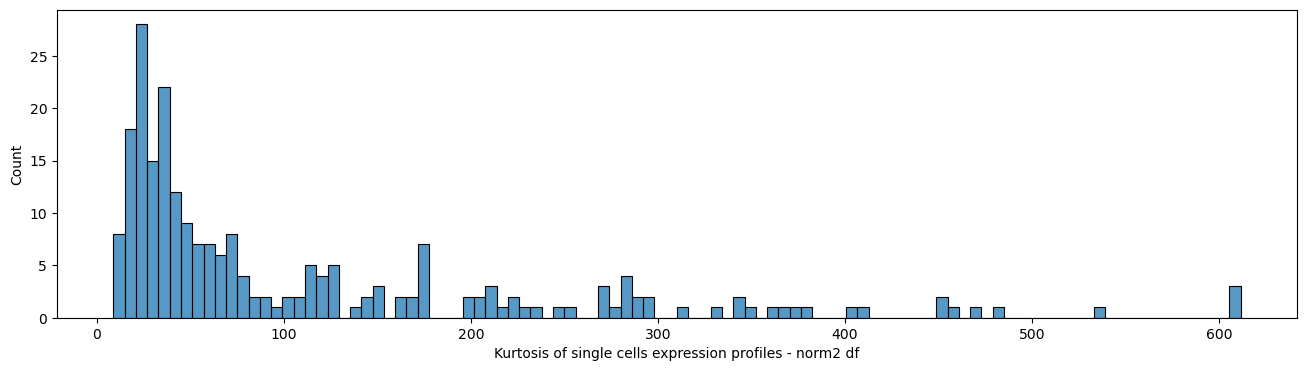

In [ ]:
cnames = list(df_norm1.columns)
df_norm1_skew_cells = []
for i in range(len(dfu.columns)) :     
     v_df = df_norm1[cnames[i]]
     df_norm1_skew_cells += [skew(v_df)]   
df_norm1_skew_cells
plt.figure(figsize=(16,4))
sns.histplot(df_norm1_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - norm2 df')

df_norm1_kurt_cells = []
for i in range(len(dfu.columns)) :     
     v_df = df_norm1[cnames[i]]
     df_norm1_kurt_cells += [kurtosis(v_df)] 
df_norm1_kurt_cells
plt.figure(figsize=(16,4))
sns.histplot(df_norm1_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - norm2 df')

The data follows a bell distribution but has a heavy right tail, we can see the differences in the empirical distribution function plot of both datasets.

### Standard Scaler

Preprocessing.StandardScaler rescales the data to unit variance with zero mean. It is usually sensible to outliers but since we already filtered the data we shouldn’t encounter any problems.

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
df_norm2 = pd.DataFrame(scaler.fit_transform(dfu))

In [ ]:
df_norm2.head()

0         1         2         3         4         5        6    \
0 -0.422350 -0.464127 -0.378997 -0.442945 -0.349666 -0.428107 -0.43879   
1 -0.422350 -0.464127 -0.378997 -0.442945 -0.349666 -0.428107 -0.43879   
2 -0.422350 -0.464127 -0.378997 -0.442945 -0.333050 -0.428107 -0.43879   
3 -0.422350 -0.464127 -0.378997 -0.442945 -0.349666 -0.428107 -0.43879   
4 -0.405142 -0.464127 -0.378997 -0.442945 -0.349666 -0.422286 -0.43879   

        7         8         9    ...      220       221       222       223  \
0 -0.423158 -0.372657 -0.499336  ... -0.49782 -0.470992 -0.441218 -0.470844   
1 -0.423158 -0.372657 -0.499336  ... -0.49782 -0.470992 -0.441218 -0.470844   
2 -0.423158 -0.372657 -0.487973  ... -0.49782 -0.470992 -0.441218 -0.470844   
3 -0.401999 -0.372657 -0.499336  ... -0.49782 -0.470992 -0.441218 -0.470844   
4 -0.423158 -0.372657 -0.499336  ... -0.49782 -0.470992 -0.441218 -0.470844   

        224       225       226      227       228       229  
0 -0.464868 -0.504919 -0.479579 -0.46318 -0.463557 -0.461312  
1 -0.464868 -0.504919 -0.479579 -0.46318 -0.463557 -0.461312  
2 -0.464868 -0.504919 -0.479579 -0.46318 -0.463557 -0.461312  
3 -0.464868 -0.496314 -0.479579 -0.45487 -0.463557 -0.461312  
4 -0.464868 -0.504919 -0.479579 -0.46318 -0.463557 -0.461312  

[5 rows x 230 columns]

/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/

<Figure size 1600x900 with 0 Axes>

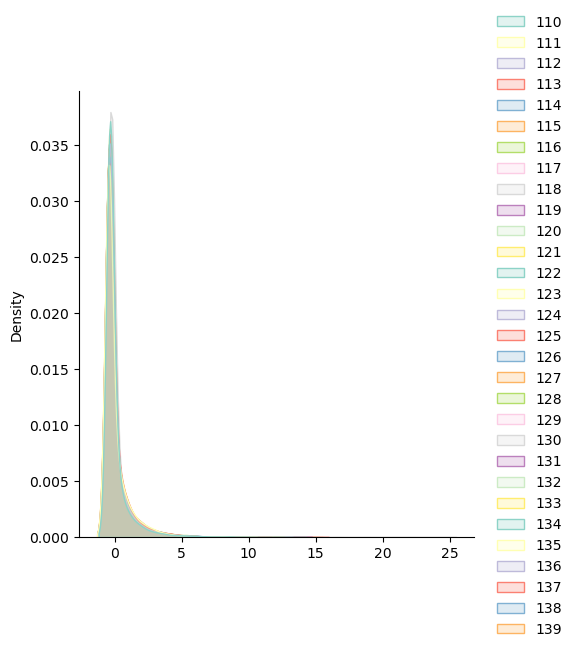

<Figure size 1600x900 with 0 Axes>

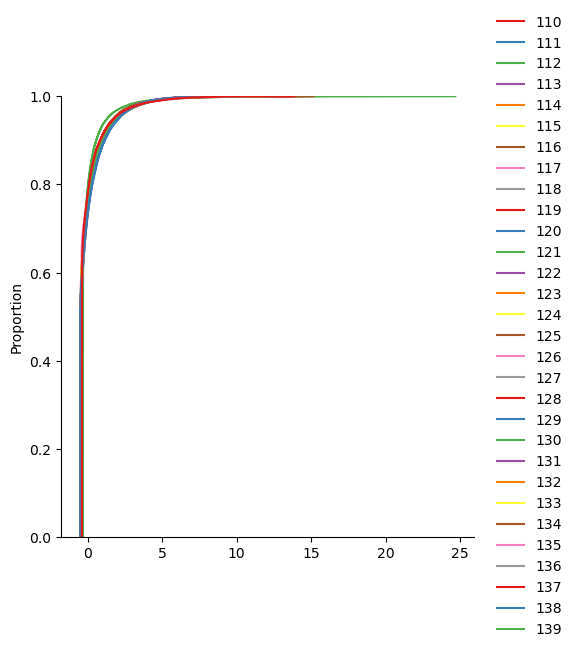

<Figure size 1600x900 with 0 Axes>

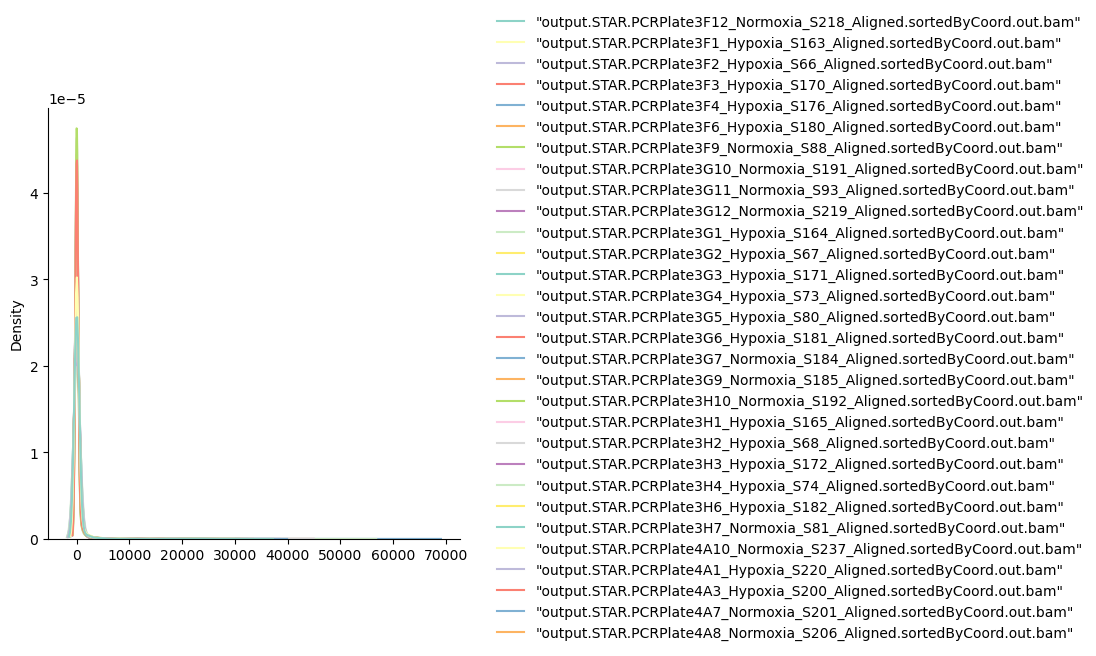

<Figure size 1600x900 with 0 Axes>

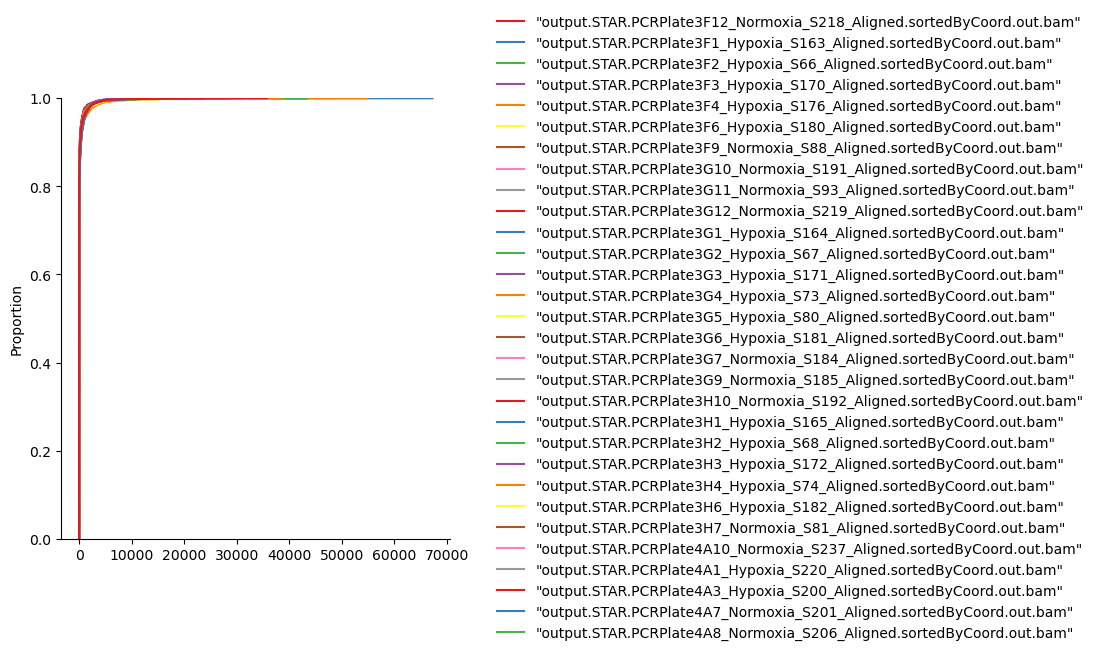

In [ ]:
plt.figure(figsize=(16,9))
sns.displot(data = df_norm2.iloc[:,110:140], palette = "Set3", kind = 'kde',  bw_adjust=2, fill = True)
plt.figure(figsize=(16,9))
sns.displot(data = df_norm2.iloc[:,110:140], palette = "Set1", kind = 'ecdf')
plt.figure(figsize=(16,9))
sns.displot(data=df_small3,palette="Set3",kind="kde", bw_adjust=2)
plt.figure(figsize=(16,9))
sns.displot(data = df_small3, palette = "Set1", kind = 'ecdf')

/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alessandrobottardi/Desktop/bocconi/AILab24/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Kurtosis of single cells expression profiles - norm2 df')

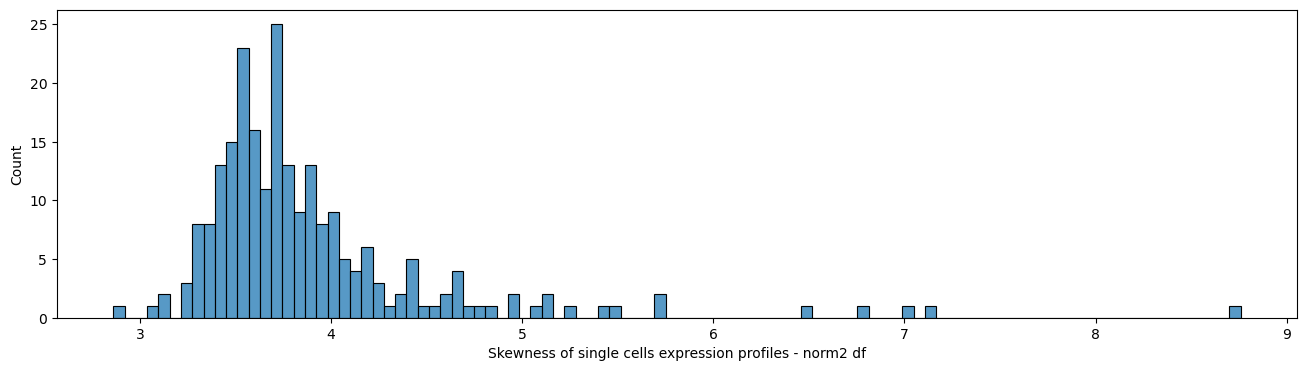

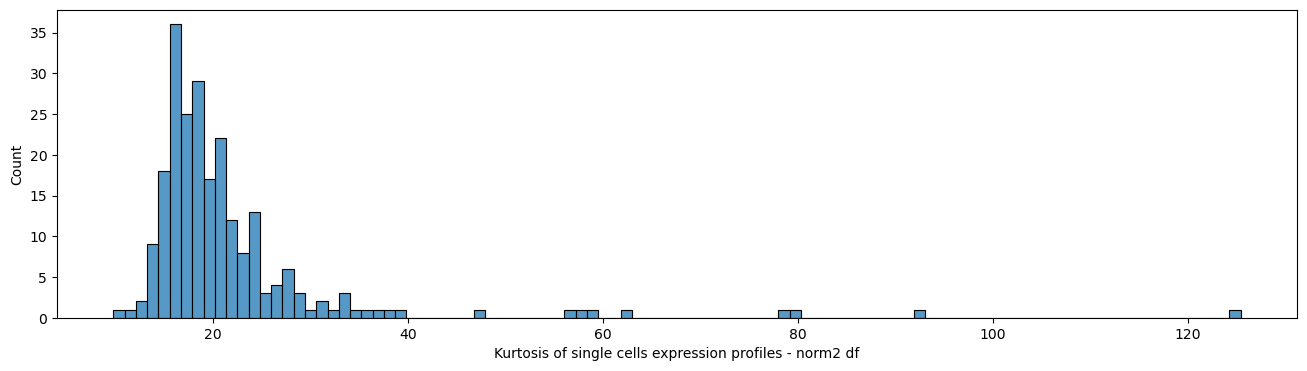

In [ ]:
cnames = list(df_norm2.columns)
df_norm2_skew_cells = []
for i in range(len(dfu.columns)) :     
     v_df = df_norm2[cnames[i]]
     df_norm2_skew_cells += [skew(v_df)]   
df_norm2_skew_cells
plt.figure(figsize=(16,4))
sns.histplot(df_norm2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - norm2 df')

df_norm2_kurt_cells = []
for i in range(len(dfu.columns)) :     
     v_df = df_norm2[cnames[i]]
     df_norm2_kurt_cells += [kurtosis(v_df)] 
df_norm2_kurt_cells
plt.figure(figsize=(16,4))
sns.histplot(df_norm2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - norm2 df')

The data presents a higher level of normalization compared to Normalizer, but we can see that skewness and kurtosis values are much higher than the log-normalization ones. Since we shouldn’t push for a perfect resemblance to the gaussian distribution, we will keep the data scaled with StandardScaler. This will enhance our model analysis and ensure that our results are based on a well-preprocessed and improved dataset.
Overall, Standard Scaler is better than Normalize, probably because the cells and the genes are highly correlated between each other and Standard Scaler fits better.

# DropS_MCF7

### Unsupervised Learning

We now perform unsupervised learning on the file DropS_MCF7:
- PCA in two dimensions
- PCA in three dimensions

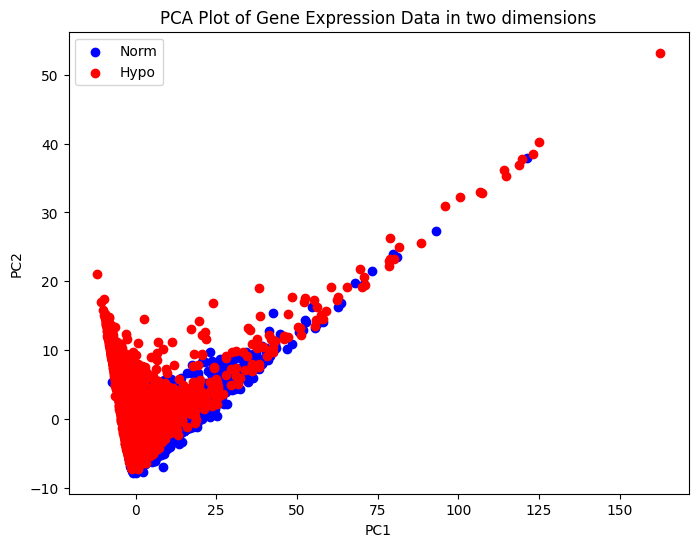

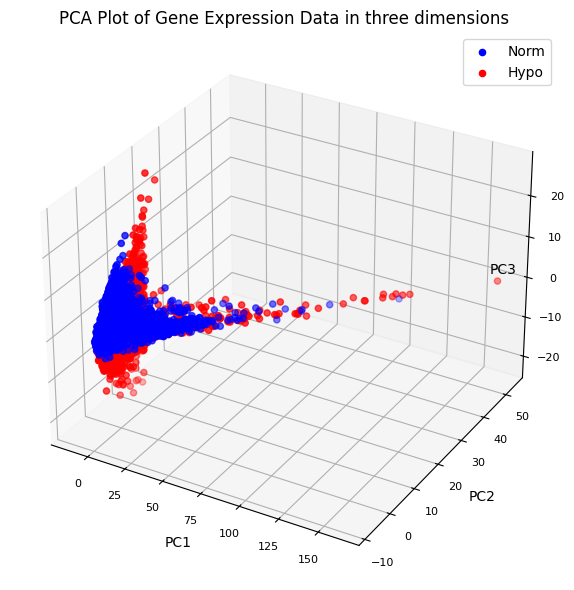

Top 10 contributing genes for PC1: ['MALAT1', 'MT-RNR2', 'NEAT1', 'VMP1', 'ATP1A1', 'H1-5', 'HNRNPU', 'MT-RNR1', 'H1-3', 'NCOA3']
Top 10 contributing genes for PC2: ['RPS19', 'BCYRN1', 'MALAT1', 'TFF1', 'RPL13', 'RPL35', 'RPS14', 'RPL12', 'RPS12', 'RPS27']
Top 10 contributing genes for PC3: ['BCYRN1', 'MT-RNR2', 'ACTB', 'MT-RNR1', 'SET', 'TOB1', 'MT-ND4', 'DSCAM-AS1', 'BCAS3', 'FGF23']


In [42]:
# Perform PCA on the dataset with 2 PC
file=df4
pca = PCA(n_components=2)
pca_result = pca.fit_transform(file.T)
# Get condition labels for the samples
df_transposed = file.transpose()
conditions = np.array([1 if 'Norm' in row_name else 0 for row_name in df_transposed.index])
# Create a PCA plot
plt.figure(figsize=(8, 6))
for condition, color in zip([1, 0], ['blue', 'red']):
    idx = conditions == condition
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label='Norm' if condition == 1 else 'Hypo')
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Gene Expression Data in two dimensions')
plt.show()

# PCA model with three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(file.T)

#Plot the corresponding results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
labels = ['Norm', 'Hypo']
for condition, color, label in zip([1, 0], ['blue', 'red'], labels):
    idx = conditions == condition
    ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], c=color, label='Norm' if condition == 1 else 'Hypo')
ax.set_xlabel('PC1', size=10)
ax.set_ylabel('PC2',size=10)
ax.set_zlabel('PC3', size=10,labelpad=-32)
ax.set_title('PCA Plot of Gene Expression Data in three dimensions', size=12)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend()

plt.tight_layout()

plt.show()

# Create a DataFrame with the loading scores for each gene
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=file.index)

# We find the top 10 contributing genes for each principal component
n = 10 
top_contributing_genes_PC1 = loading_scores.nlargest(n, 'PC1').index
top_contributing_genes_PC2 = loading_scores.nlargest(n, 'PC2').index
top_contributing_genes_PC3 = loading_scores.nlargest(n, 'PC3').index
print(f"Top {n} contributing genes for PC1: {list(top_contributing_genes_PC1)}")
print(f"Top {n} contributing genes for PC2: {list(top_contributing_genes_PC2)}")
print(f"Top {n} contributing genes for PC3: {list(top_contributing_genes_PC3)}")


We start off with PCA in 2 dimensions. Graphing our data on the two principal components selected we observe that the two conditions of our data: hypoxia & normoxia are not clearly separated but rather randomly scattered. The same is done in 3 dimensions and the same conclusion can be drawn, no hyperplane manages to separate the data points in a significative way. 


## DropS_HCC

### Unsupervised Learning

We perform the following algortihms for unsupervised learning on DropS_HCC:
- PCA in two dimensions
- PCA in three dimensions

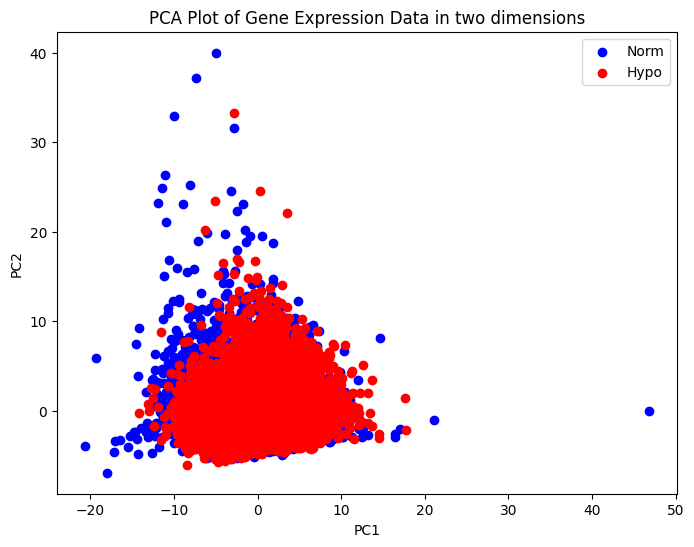

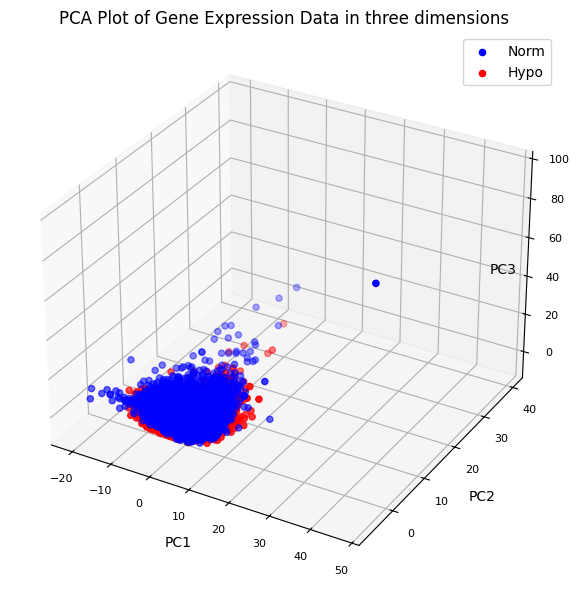

Top 10 contributing genes for PC1: ['MALAT1', 'HSP90B1', 'H1-5', 'ENO1', 'HSPA5', 'CALR', 'H1-3', 'HNRNPU', 'PDIA3', 'HNRNPA2B1']
Top 10 contributing genes for PC2: ['H4C3', 'RPS5', 'H1-5', 'HSP90AB1', 'HSP90B1', 'H1-3', 'ENO1', 'BCYRN1', 'H1-1', 'EZR']
Top 10 contributing genes for PC3: ['MALAT1', 'FTL', 'RPS5', 'BCYRN1', 'RPS28', 'RPL35', 'RPS12', 'NEAT1', 'RPS19', 'RPLP2']


In [43]:
# Perform PCA on the dataset with 2 PC
file=df3
pca = PCA(n_components=2)
pca_result = pca.fit_transform(file.T)
# Get condition labels for the samples
df_transposed = file.transpose()
conditions = np.array([1 if 'Norm' in row_name else 0 for row_name in df_transposed.index])
# Create a PCA plot
plt.figure(figsize=(8, 6))
for condition, color in zip([1, 0], ['blue', 'red']):
    idx = conditions == condition
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label='Norm' if condition == 1 else 'Hypo')
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Gene Expression Data in two dimensions')
plt.show()

# PCA model with three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(file.T)

#Plot the corresponding results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
labels = ['Norm', 'Hypo']
for condition, color, label in zip([1, 0], ['blue', 'red'], labels):
    idx = conditions == condition
    ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], c=color, label='Norm' if condition == 1 else 'Hypo')
ax.set_xlabel('PC1', size=10)
ax.set_ylabel('PC2',size=10)
ax.set_zlabel('PC3', size=10,labelpad=-32)
ax.set_title('PCA Plot of Gene Expression Data in three dimensions', size=12)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend()

plt.tight_layout()

plt.show()

# Create a DataFrame with the loading scores for each gene
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=file.index)

# We find the top 10 contributing genes for each principal component
n = 10 
top_contributing_genes_PC1 = loading_scores.nlargest(n, 'PC1').index
top_contributing_genes_PC2 = loading_scores.nlargest(n, 'PC2').index
top_contributing_genes_PC3 = loading_scores.nlargest(n, 'PC3').index
print(f"Top {n} contributing genes for PC1: {list(top_contributing_genes_PC1)}")
print(f"Top {n} contributing genes for PC2: {list(top_contributing_genes_PC2)}")
print(f"Top {n} contributing genes for PC3: {list(top_contributing_genes_PC3)}")



We start off with PCA in 2 dimensions. Graphing our data on the two principal components selected we observe that the two conditions of our data: hypoxia & normoxia are not clearly separated but rather randomly scattered. The same is done in 3 dimensions and the same conclusion can be drawn, no hyperplane manages to separate the data points in a significative way. 


## SmartS_MC

### Unsupervised learning

We perform unsupervised learning on SmartS_MC with the following techniques:
- PCA in two dimensions
- PCA in three dimensions
- Identification of ideal dimension for PCA
- K-means clustering with elbow method
- Hierarchical clustering

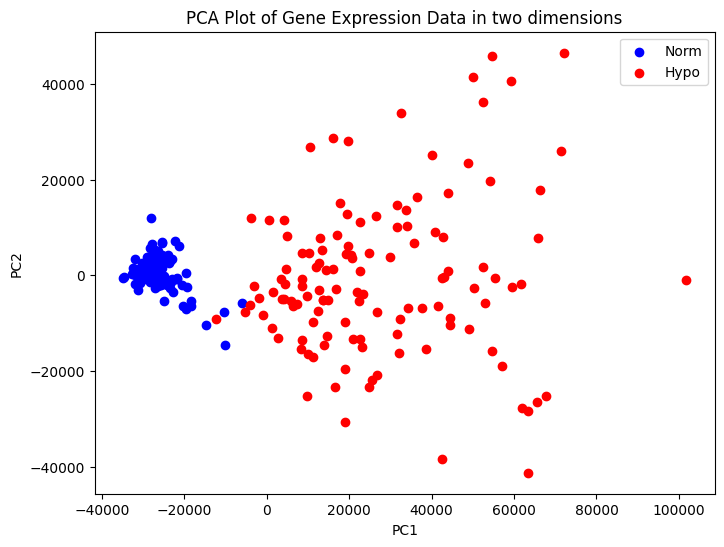

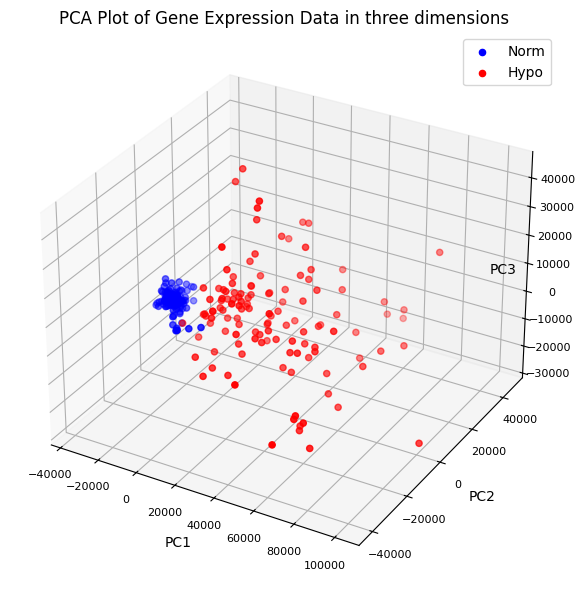

Top 10 contributing genes for PC1: ['"GAPDH"', '"ACTG1"', '"ALDOA"', '"CYP1B1"', '"UBC"', '"GPI"', '"PGK1"', '"FTH1"', '"BEST1"', '"LDHA"']
Top 10 contributing genes for PC2: ['"ACTG1"', '"CYP1B1"', '"CYP1A1"', '"ALDOA"', '"CYP1B1-AS1"', '"UBC"', '"DDIT4"', '"SLC3A2"', '"BHLHE40"', '"LDHA"']
Top 10 contributing genes for PC3: ['"FTH1"', '"BEST1"', '"CYP1B1"', '"CYP1A1"', '"CYP1B1-AS1"', '"FTL"', '"SQSTM1"', '"PSAP"', '"HSPA5"', '"IGFBP3"']


In [44]:
# Perform PCA on the dataset with 2 PC
file=df2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(file.T)
# Get condition labels for the samples
df_transposed = file.transpose()
conditions = np.array([1 if 'Norm' in row_name else 0 for row_name in df_transposed.index])
# Create a PCA plot
plt.figure(figsize=(8, 6))
for condition, color in zip([1, 0], ['blue', 'red']):
    idx = conditions == condition
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label='Norm' if condition == 1 else 'Hypo')
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Gene Expression Data in two dimensions')
plt.show()

# PCA model with three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(file.T)

#Plot the corresponding results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

labels = ['Norm', 'Hypo']
for condition, color, label in zip([1, 0], ['blue', 'red'], labels):
    idx = conditions == condition
    ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], c=color, label='Norm' if condition == 1 else 'Hypo')
ax.set_xlabel('PC1', size=10)
ax.set_ylabel('PC2',size=10)
ax.set_zlabel('PC3', size=10,labelpad=-32)
ax.set_title('PCA Plot of Gene Expression Data in three dimensions', size=12)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend()

plt.tight_layout()

plt.show()

# Create a DataFrame with the loading scores for each gene
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=file.index)

# We find the top 10 contributing genes for each principal component
n = 10 
top_contributing_genes_PC1 = loading_scores.nlargest(n, 'PC1').index
top_contributing_genes_PC2 = loading_scores.nlargest(n, 'PC2').index
top_contributing_genes_PC3 = loading_scores.nlargest(n, 'PC3').index
print(f"Top {n} contributing genes for PC1: {list(top_contributing_genes_PC1)}")
print(f"Top {n} contributing genes for PC2: {list(top_contributing_genes_PC2)}")
print(f"Top {n} contributing genes for PC3: {list(top_contributing_genes_PC3)}")



We start off with PCA in 2 dimensions. Graphing our data on the two principal components selected we observe that the two conditions of our data: hypoxia & normoxia are quite clearly separated with barely any outliers. The same is done in 3 dimensions and the same conclusion can be drawn, a hyperplane manages to separate the data points in quite a significative way. This shows that the data can easily be separated into the two categories we are observing even reducing the dimension of our data set. From the genes contirbuting to the first 3 directions we can observe that "ACTG1", "CYP1B1" seem to be twp very influencial genes.

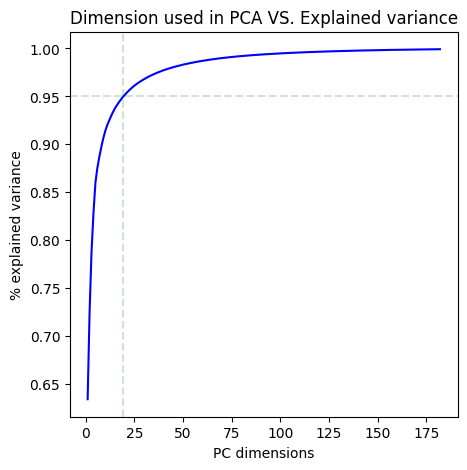

ideal number of PC components to have at least 95% of explained variance: 19


In [45]:

#Create lists with number of PC components and respective explained variance
x_pca = []
y_pca = []
a = True
for i in range(1,183):
    pca = PCA(n_components=i, svd_solver = 'full')
    pca_result = pca.fit_transform(file.T)
    x_pca.append(i)
    y_pca.append(pca.explained_variance_ratio_.sum())

#Plot the number of PC components VS the explained variance
fig, ax = plt.subplots(1, figsize=(5,5))

data = pd.DataFrame({
    
    'PC dimensions': x_pca,
    '% explained variance': y_pca
})
#Identify the lowest number of PC at which 95% of the variabce is explained
for i in range(len(y_pca)):
    if y_pca[i]>= 0.95:
        x_95 = i
        break

sns.lineplot(data=data, x='PC dimensions', y='% explained variance', ax=ax, color = 'blue')
plt.axvline(x=x_95, color='green', linestyle='--', alpha = 0.2)
plt.axhline(y=0.95, color='green', linestyle='--', alpha = 0.2)

ax.set_title('Dimension used in PCA VS. Explained variance')

plt.show()
print("ideal number of PC components to have at least 95% of explained variance:", x_95)


We then graph the amount of explained variance according to the number of principal components selected and observe that in order to explain 95% of the variance, the statistical threshold usually selected, is 19. Overall we understand that rather than the large amount of genes selected during the experiment, selecting only a combination of 19 directions would allow us to reduce the dimension of the data set but keep most of the crucial information for our binary classification. 

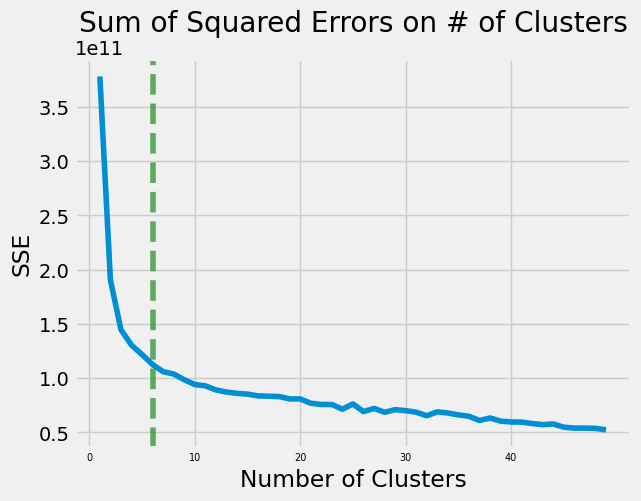

The knee of the K-means clustering is at K = 6


In [46]:

X_transposed=file.transpose()
# Create numpy array with date 
X_array = X_transposed.values
#KMeans Model
x = X_transposed.iloc[:,:-1].astype(float)
x = x.astype(float)
std_features = pd.DataFrame(X_transposed)


kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
    

nmax = 50
# We create a list that holds the SSE values for each number of cluster k
sse = []
for k in range(1, nmax):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(std_features)
    sse.append(kmeans.inertia_)
#We identify knee point
kl = KneeLocator(range(1, nmax), sse, curve="convex", direction="decreasing")
knee = kl.knee

plt.style.use("fivethirtyeight")
plt.plot(range(1, nmax), sse)
plt.xticks(range(0, nmax, 10), size='7')
plt.xlabel("Number of Clusters" )
plt.ylabel("SSE")
plt.title("Sum of Squared Errors on # of Clusters")
plt.axvline(x = knee, color='forestgreen', linestyle='--', alpha = 0.7)
plt.show()
print("The knee of the K-means clustering is at K =", knee)


We then proceed with K-means clustering. We use the elbow method that indicates the ideal number of clusters. We use the plot number of clusters against sum of squared error in order to understand the crucial point in which the convex look a like function starts flattening significantly. We observe that this is at k=6 which is not ideal since we would want to classify our data in 2 clusters, the two conditions we are observing on the cell.  

accuracy score of clustering with k=2 0.972


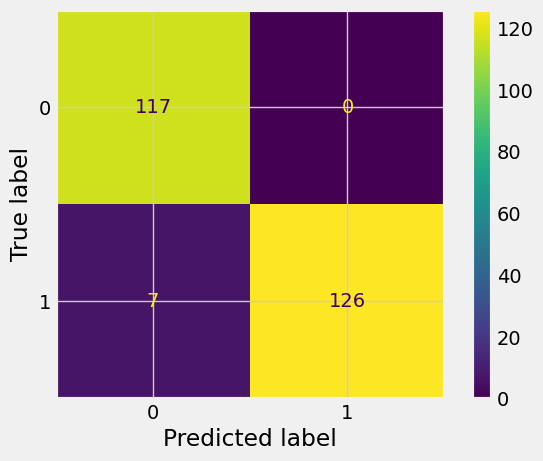

In [47]:

#We create the confusion matrix regarding how precise the predicitons are for 2 clusters
kmeans = KMeans(2, init='k-means++',  n_init=2000, random_state=42).fit(x)
cm = confusion_matrix(kmeans.labels_, conditions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Calculate the accuracy of the clustering
ac_score=accuracy_score(kmeans.labels_,conditions)
print("accuracy score of clustering with k=2", ac_score )
 


Finally, when forcing the clustering with k=2 We see that the accuracy of such clusters is of about 97% which is quite significant. K-means clustering is therefore quite useful when wanting to predict the condition of a cell contained in this data set.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [122.5, 122.5, 153.75, 153.75],
  [105.0, 105.0, 138.125, 138.125],
  [71.25, 71.25, 121.5625, 121.5625],
  [40.0, 40.0, 96.40625, 96.40625],
  [12.5, 12.5, 68.203125, 68.203125],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [242.5, 242.5, 270.0, 270.0],
  [220.0, 220.0, 256.25, 256.25],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [365.0, 365.0, 375.0, 375.0],
  [395.0, 395.0, 405.0, 405.0],
  [3

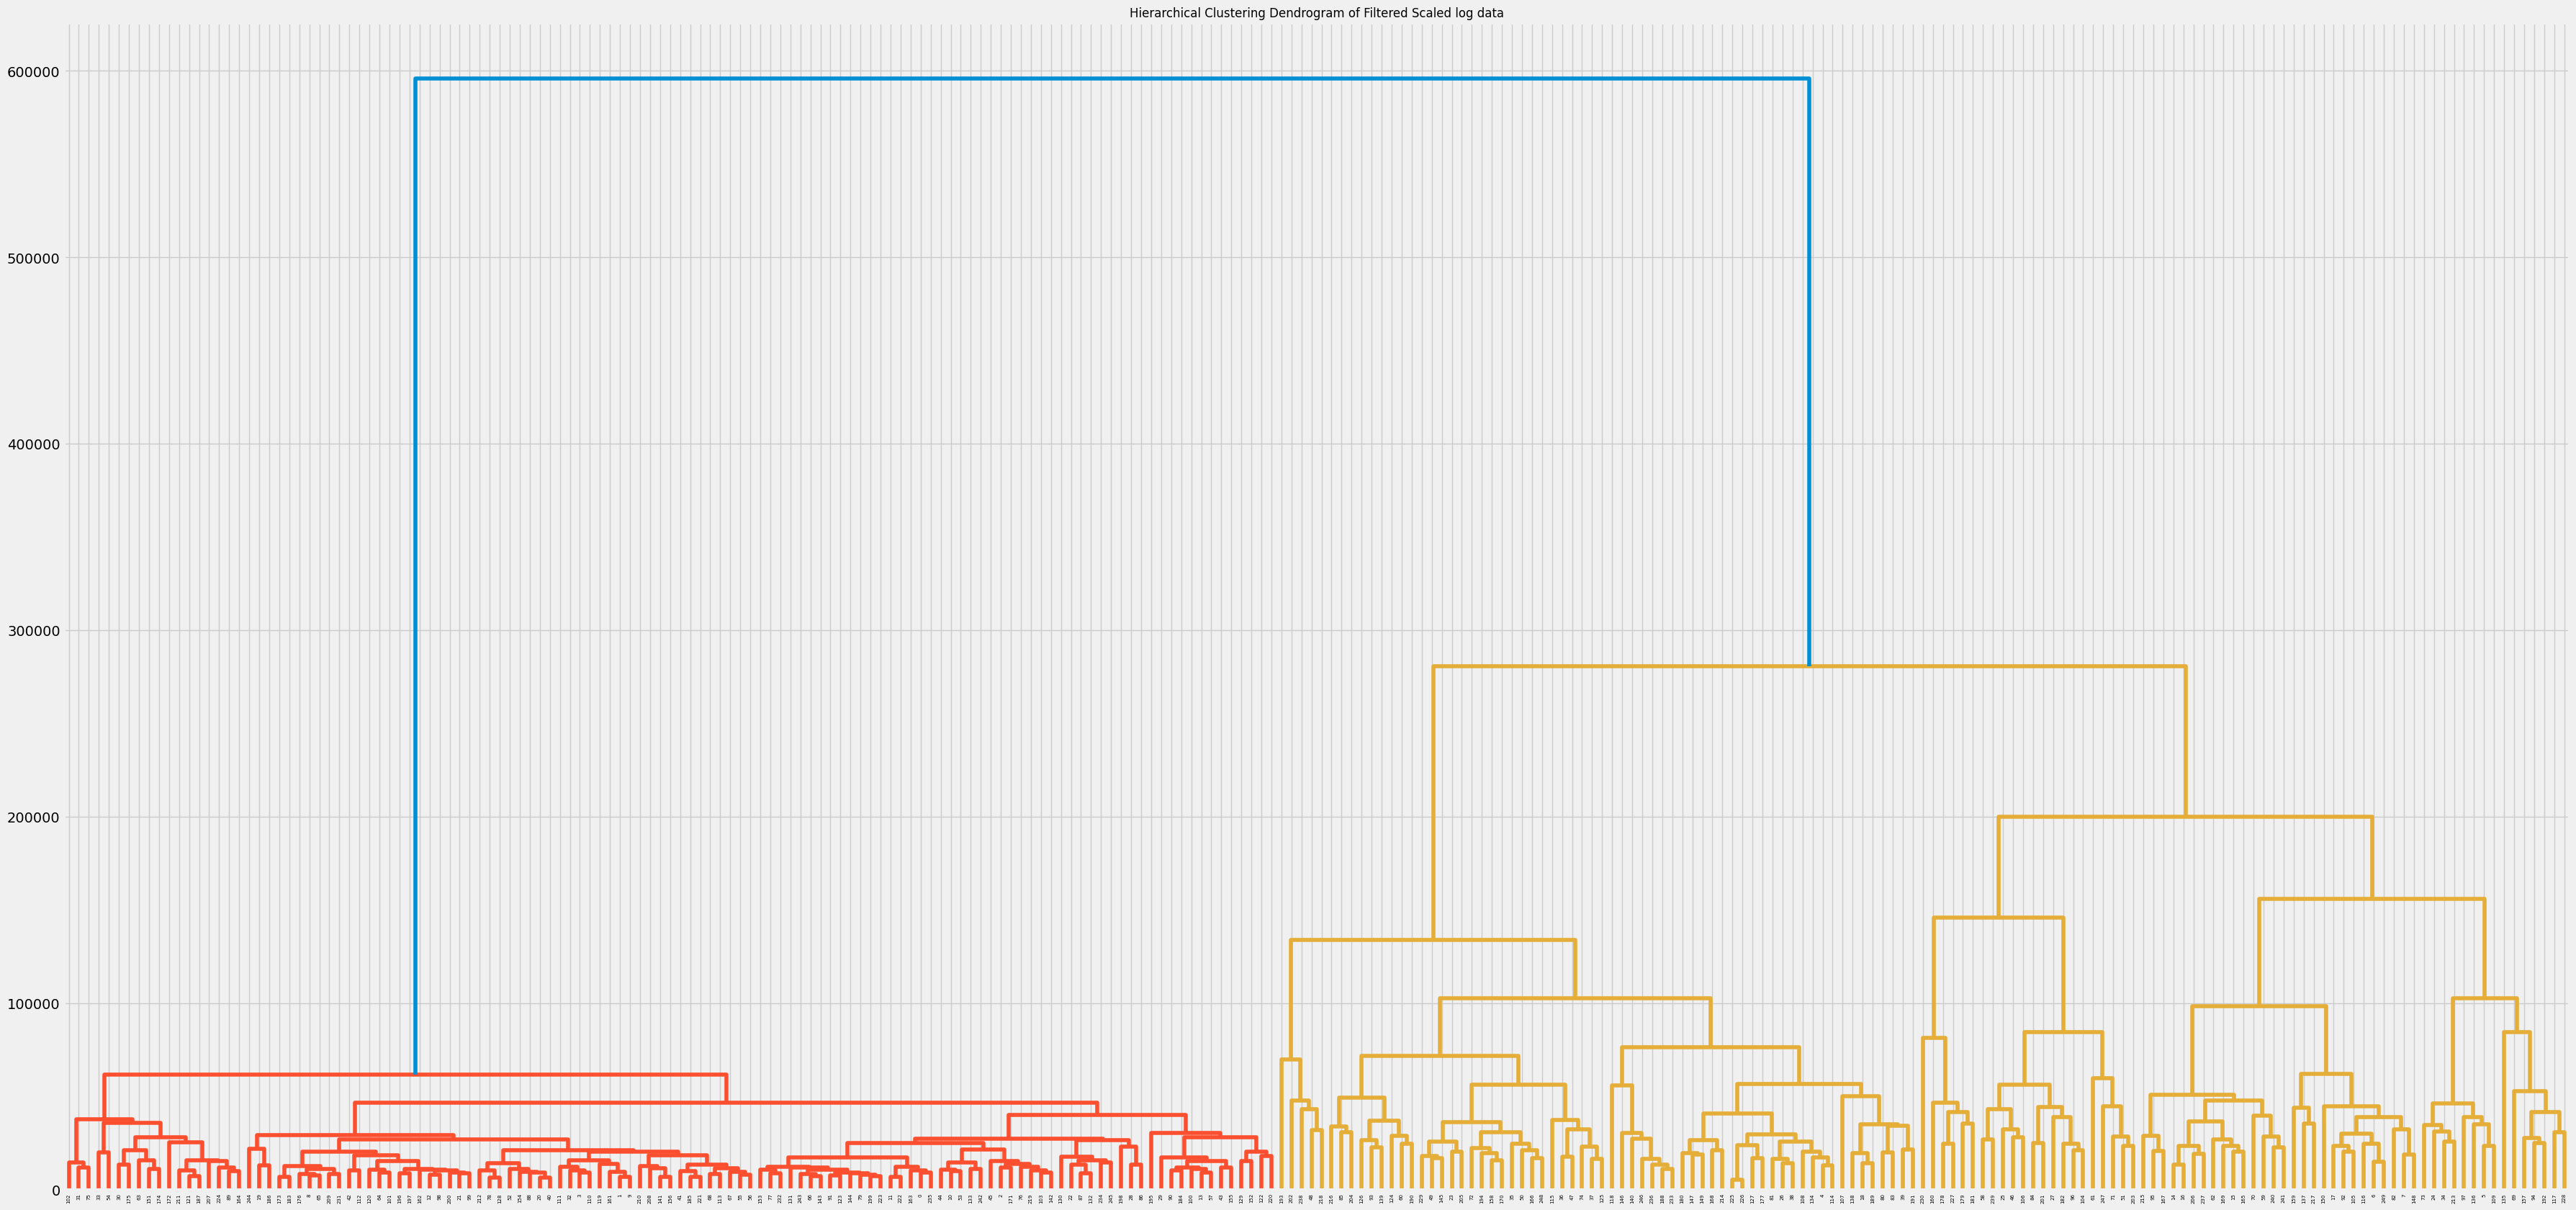

In [48]:
clustering_data = linkage(file.T, method='ward')
plt.figure(figsize=(40, 20))
plt.title("Hierarchical Clustering Dendrogram of Filtered Scaled log data", size=12)
dendrogram(clustering_data)

The last unsupervised algorithm carried out is hierarchical clustering which as observed from the graph above yields two major branches. Our data sets aims to define two branches representing	the two conditions of the cells, which can be done through hierarchical clustering.

## SmartS_HCC

### Unsupervised Learning

We perform unsupervised learning on SmartS_MC with the following techniques:
- PCA in two dimensions
- PCA in three dimensions
- Identification of ideal dimension for PCA
- K-means clustering with elbow method
- Hierarchical clustering

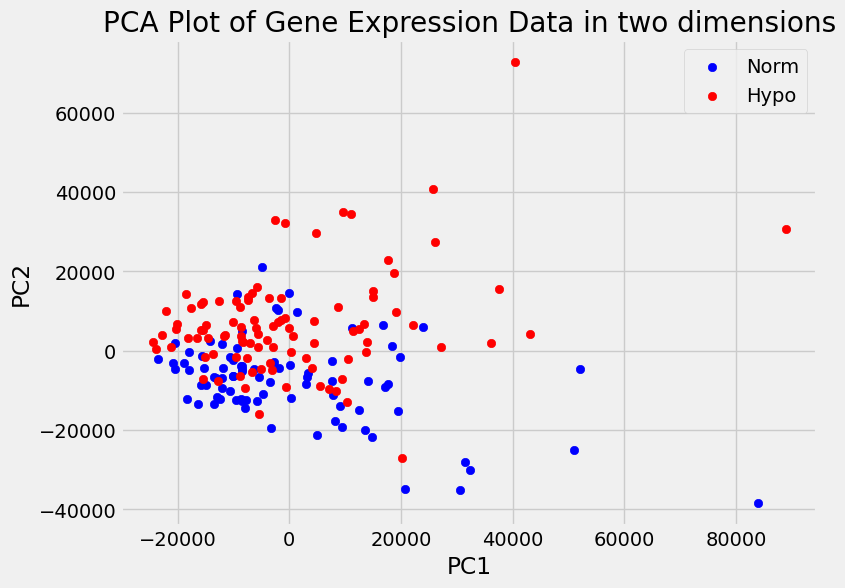

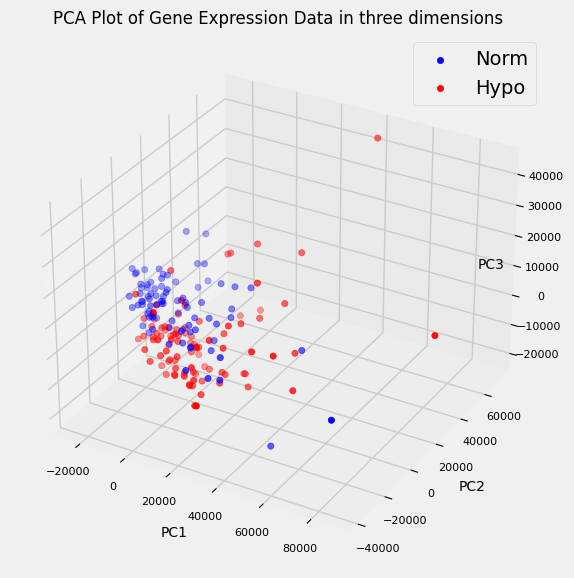

Top 10 contributing genes for PC1: ['"FTL"', '"FTH1"', '"BEST1"', '"KRT19"', '"KRT17"', '"AKR1C2"', '"MT-RNR2"', '"KRT13"', '"KRT6A"', '"PRDX1"']
Top 10 contributing genes for PC2: ['"KRT19"', '"FTH1"', '"BEST1"', '"LDHA"', '"KRT13"', '"KRT17"', '"KRT6A"', '"ALDOA"', '"IGFBP3"', '"PGK1"']
Top 10 contributing genes for PC3: ['"KRT17"', '"KRT13"', '"KRT6A"', '"KRT18"', '"KRT14"', '"KRT16"', '"MT-CO2"', '"HSPA8"', '"KRT4"', '"KRT8"']


In [49]:
# Perform PCA on the dataset with 2 PC
file=df1
pca = PCA(n_components=2)
pca_result = pca.fit_transform(file.T)
# Get condition labels for the samples
df_transposed = file.transpose()
conditions = np.array([1 if 'Norm' in row_name else 0 for row_name in df_transposed.index])
# Create a PCA plot
plt.figure(figsize=(8, 6))
for condition, color in zip([1, 0], ['blue', 'red']):
    idx = conditions == condition
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label='Norm' if condition == 1 else 'Hypo')
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Gene Expression Data in two dimensions')
plt.show()

# PCA model with three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(file.T)

#Plot the corresponding results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

labels = ['Norm', 'Hypo']
for condition, color, label in zip([1, 0], ['blue', 'red'], labels):
    idx = conditions == condition
    ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], c=color, label='Norm' if condition == 1 else 'Hypo')
ax.set_xlabel('PC1', size=10)
ax.set_ylabel('PC2',size=10)
ax.set_zlabel('PC3', size=10,labelpad=-32)
ax.set_title('PCA Plot of Gene Expression Data in three dimensions', size=12)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend()

plt.tight_layout()

plt.show()

# Create a DataFrame with the loading scores for each gene
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=file.index)

# We find the top 10 contributing genes for each principal component
n = 10 
top_contributing_genes_PC1 = loading_scores.nlargest(n, 'PC1').index
top_contributing_genes_PC2 = loading_scores.nlargest(n, 'PC2').index
top_contributing_genes_PC3 = loading_scores.nlargest(n, 'PC3').index
print(f"Top {n} contributing genes for PC1: {list(top_contributing_genes_PC1)}")
print(f"Top {n} contributing genes for PC2: {list(top_contributing_genes_PC2)}")
print(f"Top {n} contributing genes for PC3: {list(top_contributing_genes_PC3)}")



We start off with PCA in 2 dimensions. Graphing our data on the two principal components selected we observe that the two conditions of our data: hypoxia & normoxia are not clearly separated but rather randomly scattered. The same is done in 3 dimensions and the same conclusion can be drawn, no hyperplane manages to separate the data points in a significative way. 


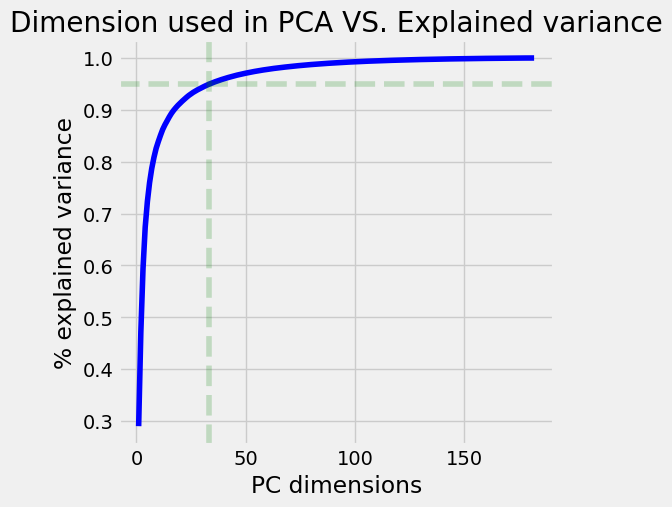

ideal number of PC components to have at least 95% of explained variance: 33


In [50]:

#Create lists with number of PC components and respective explained variance
x_pca = []
y_pca = []
a = True
for i in range(1,183):
    pca = PCA(n_components=i, svd_solver = 'full')
    pca_result = pca.fit_transform(file.T)
    x_pca.append(i)
    y_pca.append(pca.explained_variance_ratio_.sum())

#Plot the number of PC components VS the explained variance
fig, ax = plt.subplots(1, figsize=(5,5))

data = pd.DataFrame({
    
    'PC dimensions': x_pca,
    '% explained variance': y_pca
})
#Identify the lowest number of PC at which 95% of the variabce is explained
for i in range(len(y_pca)):
    if y_pca[i]>= 0.95:
        x_95 = i
        break

sns.lineplot(data=data, x='PC dimensions', y='% explained variance', ax=ax, color = 'blue')
plt.axvline(x=x_95, color='green', linestyle='--', alpha = 0.2)
plt.axhline(y=0.95, color='green', linestyle='--', alpha = 0.2)

ax.set_title('Dimension used in PCA VS. Explained variance')

plt.show()
print("ideal number of PC components to have at least 95% of explained variance:", x_95)


We then graph the amount of explained variance according to the number of principal components selected and observe that in order to explain 95% of the variance, which is the statistical threshold usually selected, is 33. Overall we understand that rather than the large a mount of genes selected during the experiment	selecting only a combination of 33 directions would allow us to reduce the dimension of the data set but keep most of the crucial information for our binary classification.

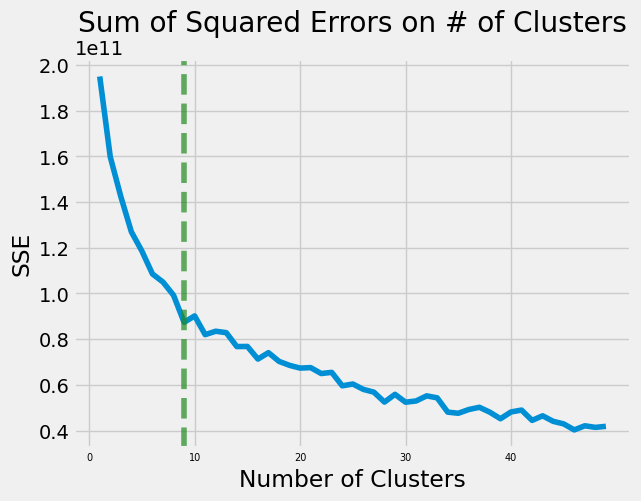

The knee of the K-means clustering is at K = 9


In [51]:

X_transposed=file.transpose()
# Create numpy array with date 
X_array = X_transposed.values
#KMeans Model
x = X_transposed.iloc[:,:-1].astype(float)
x = x.astype(float)
std_features = pd.DataFrame(X_transposed)


kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
    

nmax = 50
# We create a list that holds the SSE values for each number of cluster k
sse = []
for k in range(1, nmax):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(std_features)
    sse.append(kmeans.inertia_)
#We identify knee point
kl = KneeLocator(range(1, nmax), sse, curve="convex", direction="decreasing")
knee = kl.knee

plt.style.use("fivethirtyeight")
plt.plot(range(1, nmax), sse)
plt.xticks(range(0, nmax, 10), size='7')
plt.xlabel("Number of Clusters" )
plt.ylabel("SSE")
plt.title("Sum of Squared Errors on # of Clusters")
plt.axvline(x = knee, color='forestgreen', linestyle='--', alpha = 0.7)
plt.show()
print("The knee of the K-means clustering is at K =", knee)


We then proceed with K-means clustering. We use the elbow method that indicates the ideal number of clusters. We use the plot number of clusters against sum of squared error in order to understand the crucial point in which the convex look a like function starts flattening significantly. We observe that this is at k=9 which is not ideal since we would want to classify our data in 2 clusters, the two conditions we are observing on the cell.  

accuracy score of clustering with k=2 0.4835164835164835


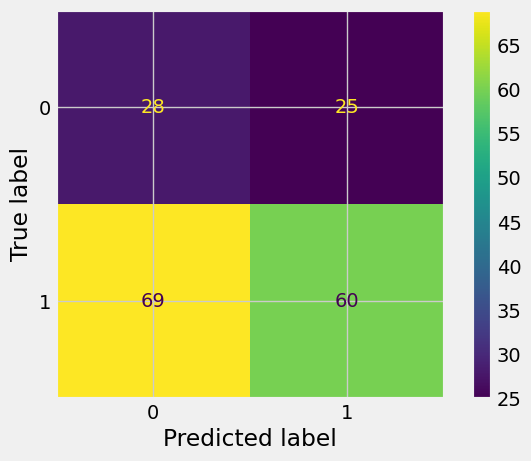

In [52]:

#We create the confusion matrix regarding how precise the predicitons are for 2 clusters
kmeans = KMeans(2, init='k-means++',  n_init=2000, random_state=42).fit(x)
cm = confusion_matrix(kmeans.labels_, conditions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Calculate the accuracy of the clustering
ac_score=accuracy_score(kmeans.labels_,conditions)
print("accuracy score of clustering with k=2", ac_score )
 


Finally, when forcing the clustering with k=2 We see that the accuracy of such clusters is of about 48% which is not useful at all, randomly clustering the data would give us about the same expected accuracy. 

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [25.0, 25.0, 61.875, 61.875],
  [15.0, 15.0, 43.4375, 43.4375],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [143.75, 143.75, 182.5, 182.5],
  [112.5, 112.5, 163.125, 163.125],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [315.0, 315.0, 325.0, 325.0],
  [283.75, 283.75, 320.0, 320.0],
  [265.0, 265.0, 301.875, 301.875],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [355.0, 355.0, 372.5, 372.5],
  [340.0, 340.0, 363.75, 363.75],


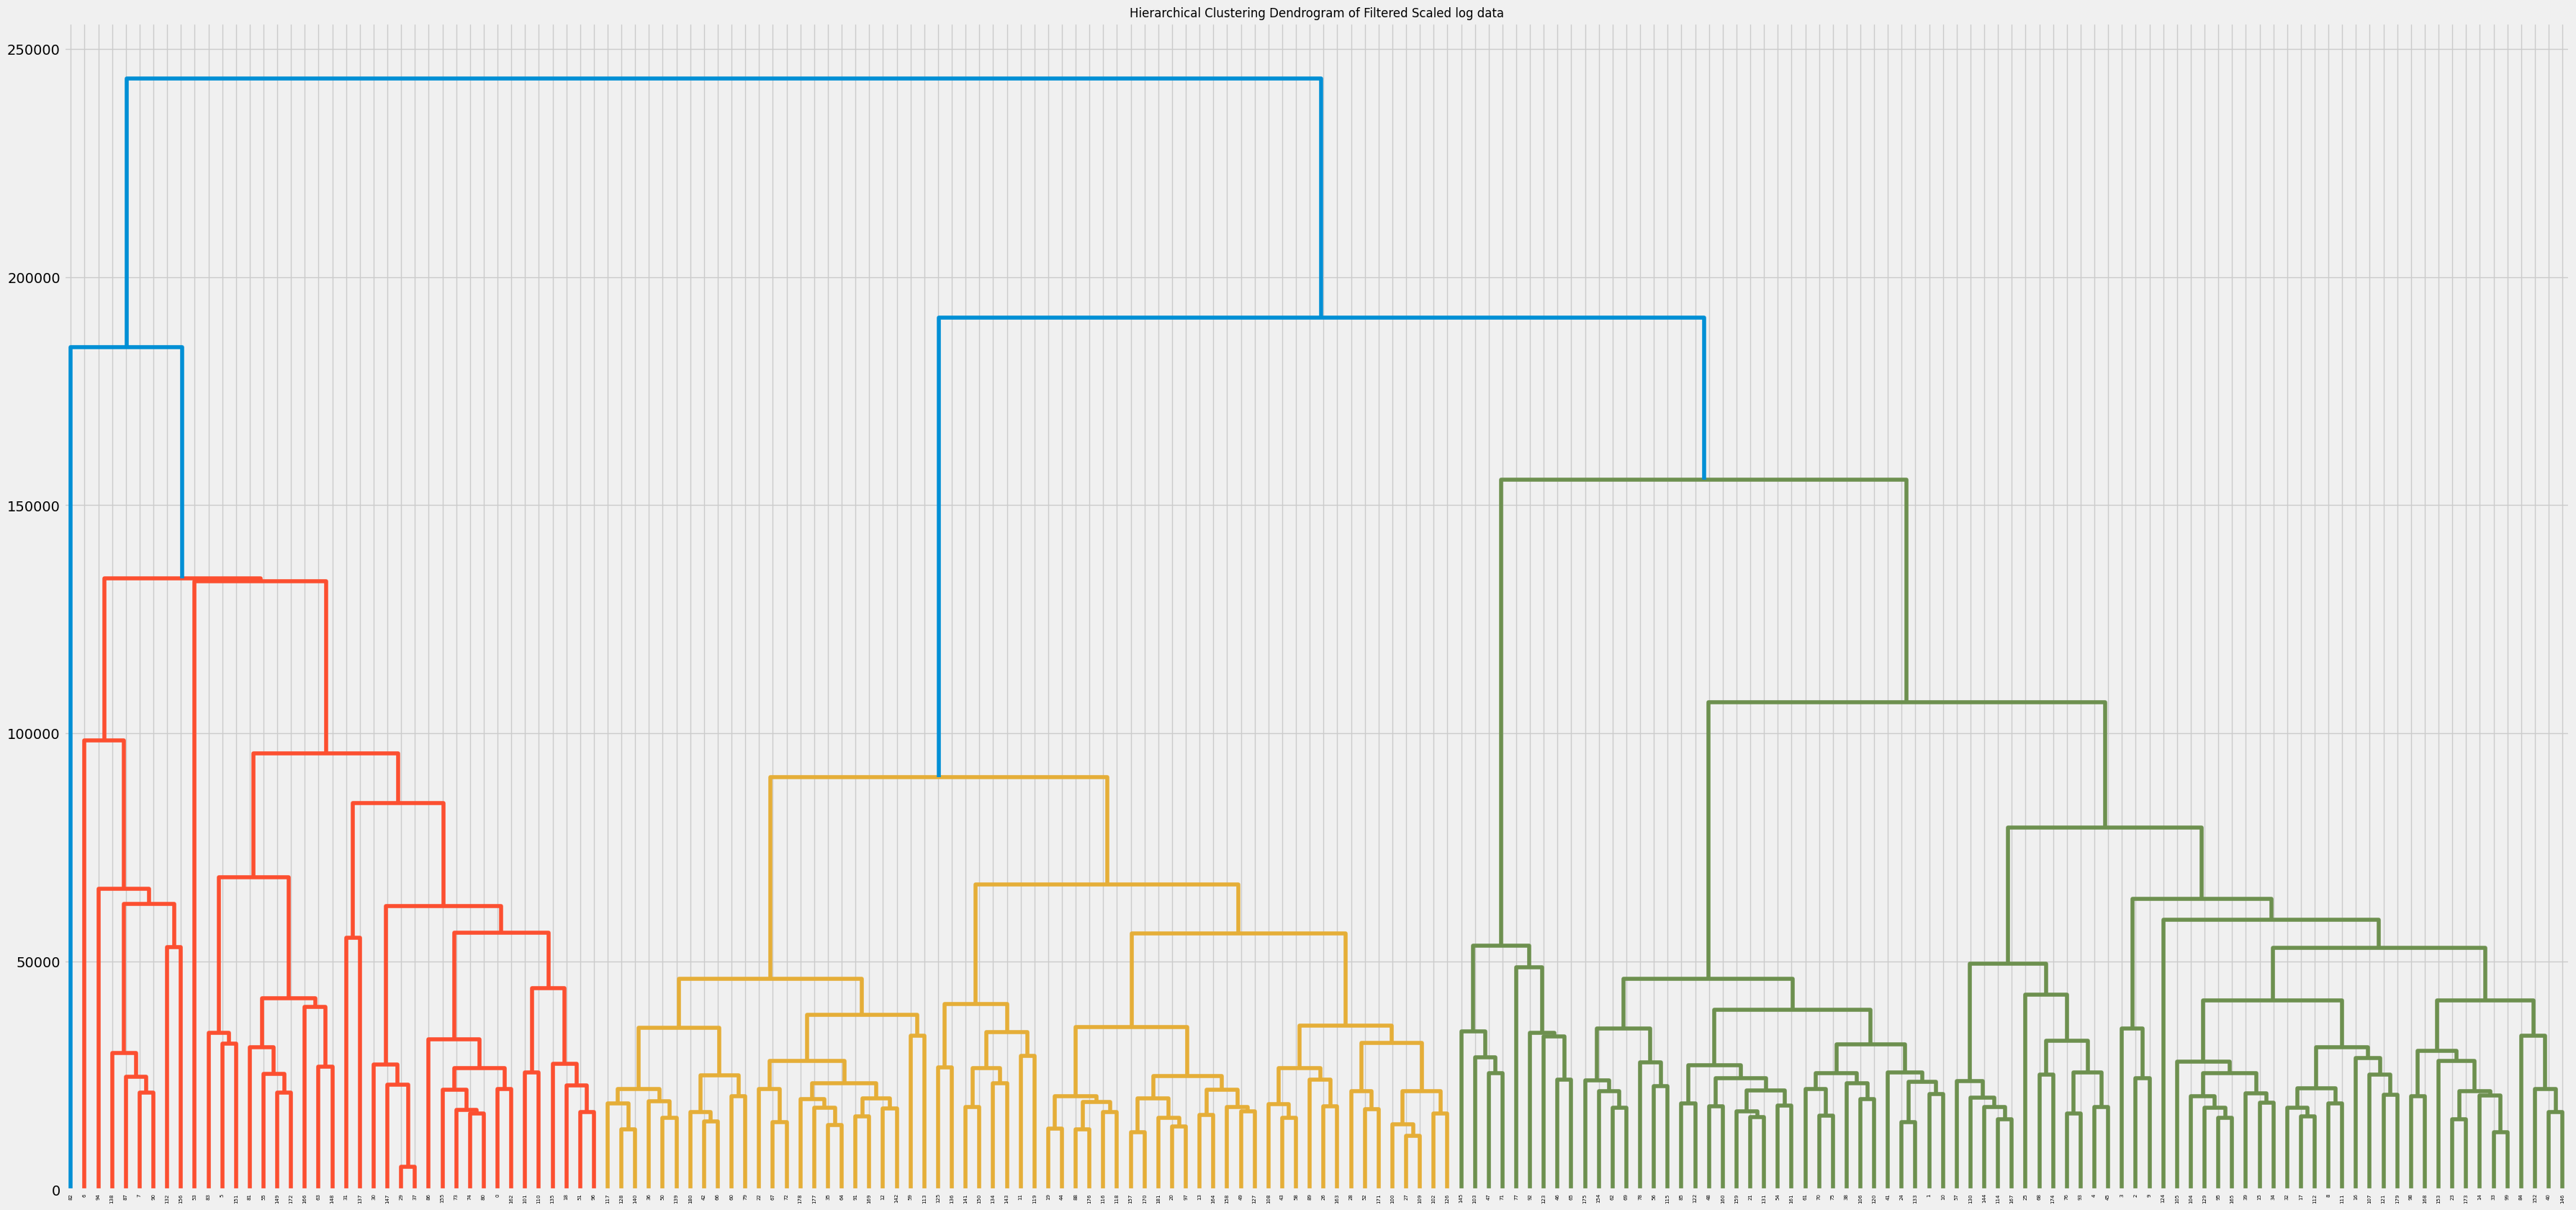

In [53]:
clustering_data = linkage(file.T, method='ward')
plt.figure(figsize=(40, 20))
plt.title("Hierarchical Clustering Dendrogram of Filtered Scaled log data", size=12)
dendrogram(clustering_data)

The last unsupervised algorithm carried out is hierarchical clustering which as observed from the graph above yields three major branches. Once again, our data sets aims to define two branches representing	the two conditions of the cells. 

## Supervised learning

In [4]:
test_df1, test_df2, test_df3, test_df4 = test_df1.T, test_df2.T, test_df3.T, test_df4.T #Genes are features and cells are samples
predictions = []
# %%
#Datasets
if True:
    cells_needed = list(df1.columns)
    for i, c in enumerate(cells_needed):
        cells_needed[i] = c[1:-1:]

    df1 = df1.T
    df1_meta_filtered = df1_meta[df1_meta.index.isin(cells_needed)]
    df1['Condition'] = df1_meta_filtered['Condition'].values
    df1['Condition'].replace(['Normo', 'Hypo'], [1,0], inplace=True)
    
if True:
    cells_needed = list(df2.columns)
    for i, c in enumerate(cells_needed):
        cells_needed[i] = c[1:-1:]

    df2 = df2.T
    df2_meta_filtered = df2_meta[df2_meta.index.isin(cells_needed)]
    df2['Condition'] = df2_meta_filtered['Condition'].values
    df2['Condition'].replace(['Norm', 'Hypo'], [1,0], inplace=True)
    

#DropSeq Construction
addCat = []
if True:
    
    cells_needed = list(df3.columns)
    for i, c in enumerate(cells_needed):
        print(i,c)
        if "Normo" in c:
            addCat.append(1)
        elif "Hypo" in c:
            addCat.append(0)
        else:
            raise TypeError
    df3 = df3.T
    df3["Condition"]=addCat

addCat = []
if True:
    
    cells_needed = list(df4.columns)
    for i, c in enumerate(cells_needed):
        print(i,c)
        if "Normo" in c:
            addCat.append(1)
        elif "Hypo" in c:
            addCat.append(0)
        else:
            raise TypeError
    df4 = df4.T
    df4["Condition"]=addCat

cnames1 = df1.columns
cnames2 = df2.columns
cnames3 = df3.columns
cnames4 = df4.columns
cnames = [cnames1, cnames2, cnames3, cnames4]
datasets = [df1, df2, df3, df4]

/var/folders/69/hhjjr06524j6ztntghhvpzk80000gn/T/ipykernel_3022/3676516961.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Condition'].replace(['Normo', 'Hypo'], [1,0], inplace=True)
/var/folders/69/hhjjr06524j6ztntghhvpzk80000gn/T/ipykernel_3022/3676516961.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

0 "AAAAAACCCGGC_Normoxia"
1 "AAAACCGGATGC_Normoxia"
2 "AAAACGAGCTAG_Normoxia"
3 "AAAACTTCCCCG_Normoxia"
4 "AAAAGCCTACCC_Normoxia"
5 "AAACACAAATCT_Normoxia"
6 "AAACCAAGCCCA_Normoxia"
7 "AAACCATGCACT_Normoxia"
8 "AAACCTCCGGCT_Normoxia"
9 "AAACGCCGGTCC_Normoxia"
10 "AAACGCCGTTCC_Normoxia"
11 "AAACGGACGCTC_Normoxia"
12 "AAACGTAGAGCG_Normoxia"
13 "AAACGTTCACTG_Normoxia"
14 "AAACTCATAAAT_Normoxia"
15 "AAAGACGGTACC_Normoxia"
16 "AAAGAGTGTACG_Normoxia"
17 "AAAGCTGACGAA_Normoxia"
18 "AAAGGCGGCAGG_Normoxia"
19 "AAAGGCGTTCGA_Normoxia"
20 "AAAGTCTGGGTC_Normoxia"
21 "AAAGTGGCACCC_Normoxia"
22 "AAAGTGGTTCGT_Normoxia"
23 "AAAGTGTTGTTC_Normoxia"
24 "AAATAGCCAGTT_Normoxia"
25 "AAATCCCATATA_Normoxia"
26 "AAATCGTGGTTG_Normoxia"
27 "AAATCTGGCGAC_Normoxia"
28 "AAATGACAGTCC_Normoxia"
29 "AAATGCAAAGGC_Normoxia"
30 "AAATGCCGGCTT_Normoxia"
31 "AAATGTTACGAG_Normoxia"
32 "AAATTTTACCCG_Normoxia"
33 "AAATTTTTAACT_Normoxia"
34 "AACAATTGAAGA_Normoxia"
35 "AACACACGCCCG_Normoxia"
36 "AACACCCCCCTC_Normoxia"
37 "AACACCC

### Non neural network machine learning

Methods included:
1. Ridge Regression
2. Logistic Regression
3. SVM (linear, polynomial, Radial Basis Function)
4. Random Forest
5. Decision Tree Classifier (for SmartSeq datasets)

For the Smartseq datasets, this is the relevant code, which includes training testing splits and print of all the metrics.

For the Smartseq Datasets, with limited sample size, logstic and support vector machines, along with Decision tree classifier (max entropy criterion) and Random forests performs perfectly. On the smartSeq datasets, we see that while support vector machine with Radial Basis funciton kernel still has remarkable performances, the other traditional supervised learning algorithms archieve sub-optimal accuracies. This stimulates the implementation of trained neural networks.

To finally predict the "Condition" features, we select Logistic regression for HCC1806 SmartSeq while we select SVM with Radial Basis kernel for MFC7 SMartseq. The code that provides Condition prediction follows after this cell.

######   ANALAZYING DF1 ##########
Ridge Regression with data split
Mean Squared Error for Ridge Regression=  0.06085524195352551
Root Mean Squared Error for Ridge Regression=  0.24668855253847008
R-Squared for Ridge Regression=  0.7412707259801974
[[ 0.899374  ]
 [ 0.73524792]
 [ 0.08931056]
 [ 0.21855097]
 [-0.45189439]
 [-0.16722088]
 [-0.4086123 ]
 [ 0.86585405]
 [ 0.98123884]
 [ 1.02928494]
 [ 0.9013463 ]
 [ 0.89054293]
 [-0.21219342]
 [ 0.08723444]
 [-0.05121542]
 [ 0.18805171]
 [ 0.85088328]
 [ 0.76065274]
 [ 0.99624889]
 [ 0.85707362]
 [ 1.10407564]
 [ 0.04638998]
 [ 0.06071065]
 [ 0.28289298]
 [ 0.88104819]
 [ 1.10626911]
 [ 0.8325414 ]
 [ 0.83291083]
 [ 0.76738521]
 [ 0.20642334]
 [ 0.44251428]
 [ 0.95333667]
 [ 1.00777517]
 [ 0.12682033]
 [ 0.21549569]
 [ 0.49756269]
 [ 0.97893517]
 [ 0.78040041]
 [ 0.93585884]
 [ 0.17702428]
 [-0.10039089]
 [ 0.93537426]
 [ 1.14148843]
 [ 0.77407797]
 [ 1.05649375]]
In Ridge regression the 10 most influential genes are:"BLCAP": -4.167906079

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.96551724 0.96551724 0.96551724 0.96551724 1.        ]
Mean Squared Error for Logistic Regression=  0.0
Root Mean Squared Error for Logistic Regression =  0.0
R-Squared for Logistic Regression=  1.0
Accuracyfor Logistic Regression  1.0
In logistic regression the 10 most influential genes are:"DDIT4": -0.0012973167781127955
In logistic regression the 10 most influential genes are:"LDHA": -0.0012285881456032665
In logistic regression the 10 most influential genes are:"ALDOA": -0.0010257350198914325
In logistic regression the 10 most influential genes are:"KRT18": 0.0007154826750881302
In logistic regression the 10 most influential genes are:"PGK1": -0.0006643877196345945
In logistic regression the 10 most influential genes are:"PSMD2": 0.0006499811867794557
In logistic regression the 10 most influential genes are:"CD44": 0.0006222823697060549
In logistic regression the 10 most influential genes are:"LDHB": 0.0005802640664830638
In logistic regression the 10 most influential genes are:"

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/v

[1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 1 0 1 1]
SUPPOR VECTOR MACHINE POLYNOMIAL KERNEL
[1.         1.         1.         0.96551724 0.89655172]
Accuracy For Polynomial SVM 0.918918918918919
DECISION TREE CLASSIFIER
Random Forest Classifier
[0.96551724 0.96551724 1.         1.         1.        ]
Accuracy =  0.972972972972973
Confusion Matrix =  [[22  1]
 [ 0 14]]
Classification Report =                precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.93      1.00      0.97        14

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.97      0.97      0.97        37

Accuracy for Gradient Boosting=  1.0
Confusion Matrix for Gradient Boosting=  [[23  0]
 [ 0 14]]
Classification Report for Gradient Boosting=                precision    recall  f1-score   support

           0       1.00      1.00     

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1. 1. 1. 1. 1.]
Mean Squared Error for Logistic Regression=  0.0
Root Mean Squared Error for Logistic Regression =  0.0
R-Squared for Logistic Regression=  1.0
Accuracyfor Logistic Regression  1.0
In logistic regression the 10 most influential genes are:"MT-CO1": 0.0008507471386978044
In logistic regression the 10 most influential genes are:"PGK1": -0.0007629463211336467
In logistic regression the 10 most influential genes are:"MT-CYB": 0.0007361314056958609
In logistic regression the 10 most influential genes are:"MT-CO2": 0.0007115169530726559
In logistic regression the 10 most influential genes are:"XBP1": 0.0005912333012264465
In logistic regression the 10 most influential genes are:"SULF2": 0.00046263509173612394
In logistic regression the 10 most influential genes are:"GATA3": 0.0004359048941843952
In logistic regression the 10 most influential genes are:"SLC9A3R1": 0.0004087779701269199
In logistic regression the 10 most influential genes are:"MT-CO3": 0.00040029914642011655
In

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/v

[1.   1.   1.   1.   0.95]
Accuracy for RBF kernel SVM 1.0
[0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1]
SUPPOR VECTOR MACHINE POLYNOMIAL KERNEL
[0.975 1.    0.975 0.975 0.975]
Accuracy For Polynomial SVM 1.0
DECISION TREE CLASSIFIER
Random Forest Classifier
[0.975 1.    1.    1.    1.   ]
Accuracy =  1.0
Confusion Matrix =  [[25  0]
 [ 0 25]]
Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy for Gradient Boosting=  0.98
Confusion Matrix for Gradient Boosting=  [[24  1]
 [ 0 25]]
Classification Report for Gradient Boosting=                precision    recall  f1-score   support

           0       1

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs fail

[0.95274585 0.94763729 0.94167731 0.94976586 0.9544487 ]
Mean Squared Error for Logistic Regression=  0.049029622063329927
Root Mean Squared Error for Logistic Regression =  0.22142633552341945
R-Squared for Logistic Regression=  0.795487977191335
Accuracyfor Logistic Regression  0.95097037793667
In logistic regression the 10 most influential genes are:"NDRG1": -2.8647862365866508
In logistic regression the 10 most influential genes are:"EGLN3": -2.4533254044132926
In logistic regression the 10 most influential genes are:"KLLN": -2.0281254404041396
In logistic regression the 10 most influential genes are:"BTBD9": -1.728398277216383
In logistic regression the 10 most influential genes are:"PGAM1": -1.699349779515058
In logistic regression the 10 most influential genes are:"SLC2A1": -1.6528391700200329
In logistic regression the 10 most influential genes are:"BNIP3": -1.5400902455607342
In logistic regression the 10 most influential genes are:"IGFBP3": -1.5307728396143931
In logistic reg

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/v

[0.9608344  0.95274585 0.95700298 0.95572584 0.95657727]
Accuracy for RBF kernel SVM 0.9584610146407899
[1 1 1 ... 0 0 1]
SUPPOR VECTOR MACHINE POLYNOMIAL KERNEL
[0.9348659  0.93231162 0.93358876 0.92337165 0.9284802 ]
Accuracy For Polynomial SVM 0.937010554988083
DECISION TREE CLASSIFIER
Random Forest Classifier
[0.60706684 0.60706684 0.60749255 0.60749255 0.60749255]
Accuracy =  0.6012938372488934
Confusion Matrix =  [[1766    0]
 [1171    0]]
Classification Report =                precision    recall  f1-score   support

           0       0.60      1.00      0.75      1766
           1       0.00      0.00      0.00      1171

    accuracy                           0.60      2937
   macro avg       0.30      0.50      0.38      2937
weighted avg       0.36      0.60      0.45      2937



/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy for Gradient Boosting=  0.9329247531494722
Confusion Matrix for Gradient Boosting=  [[1663  103]
 [  94 1077]]
Classification Report for Gradient Boosting=                precision    recall  f1-score   support

           0       0.95      0.94      0.94      1766
           1       0.91      0.92      0.92      1171

    accuracy                           0.93      2937
   macro avg       0.93      0.93      0.93      2937
weighted avg       0.93      0.93      0.93      2937

Accuracy for DTC: 0.8113721484508002
Confusion Matrix for DTC=  [[1491  275]
 [ 279  892]]
Classification Report for DTC=                precision    recall  f1-score   support

           0       0.84      0.84      0.84      1766
           1       0.76      0.76      0.76      1171

    accuracy                           0.81      2937
   macro avg       0.80      0.80      0.80      2937
weighted avg       0.81      0.81      0.81      2937

[1 1 1 ... 0 0 1]
10-fold cross validation average accura

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs fail

[0.97196532 0.97398844 0.97716763 0.97225434 0.9783237 ]
Mean Squared Error for Logistic Regression=  0.023578363384188627
Root Mean Squared Error for Logistic Regression =  0.15355247762308696
R-Squared for Logistic Regression=  0.9023122826942427
Accuracyfor Logistic Regression  0.9764216366158114
In logistic regression the 10 most influential genes are:"MIR663AHG": -2.0272459861101146
In logistic regression the 10 most influential genes are:"MT-ND3": 1.8398730489903627
In logistic regression the 10 most influential genes are:"MT-RNR1": 1.8333394255041986
In logistic regression the 10 most influential genes are:"GAPDH": -1.7831755732606436
In logistic regression the 10 most influential genes are:"PGK1": -1.7701029288921806
In logistic regression the 10 most influential genes are:"MT-CO3": 1.7096815470124211
In logistic regression the 10 most influential genes are:"ADGRV1": -1.3878215265877585
In logistic regression the 10 most influential genes are:"WSB2": 1.3274125386074245
In logis

/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/Romaso/lib/python3.11/site-packages/sklearn/utils/v

[0.98265896 0.98121387 0.9800578  0.97687861 0.9800578 ]
Accuracy for RBF kernel SVM 0.9787332408691632
[0 1 1 ... 0 1 0]
SUPPOR VECTOR MACHINE POLYNOMIAL KERNEL
[0.96705202 0.96676301 0.96763006 0.96387283 0.96242775]
Accuracy For Polynomial SVM 0.9641701340730467
DECISION TREE CLASSIFIER
Random Forest Classifier
[0.80780347 0.81705202 0.81705202 0.80809249 0.81734104]
Accuracy =  0.8150716597318539
Confusion Matrix =  [[ 967  794]
 [   6 2559]]
Classification Report =                precision    recall  f1-score   support

           0       0.99      0.55      0.71      1761
           1       0.76      1.00      0.86      2565

    accuracy                           0.82      4326
   macro avg       0.88      0.77      0.79      4326
weighted avg       0.86      0.82      0.80      4326

Accuracy for Gradient Boosting=  0.9704114655570967
Confusion Matrix for Gradient Boosting=  [[1699   62]
 [  66 2499]]
Classification Report for Gradient Boosting=                precision    reca

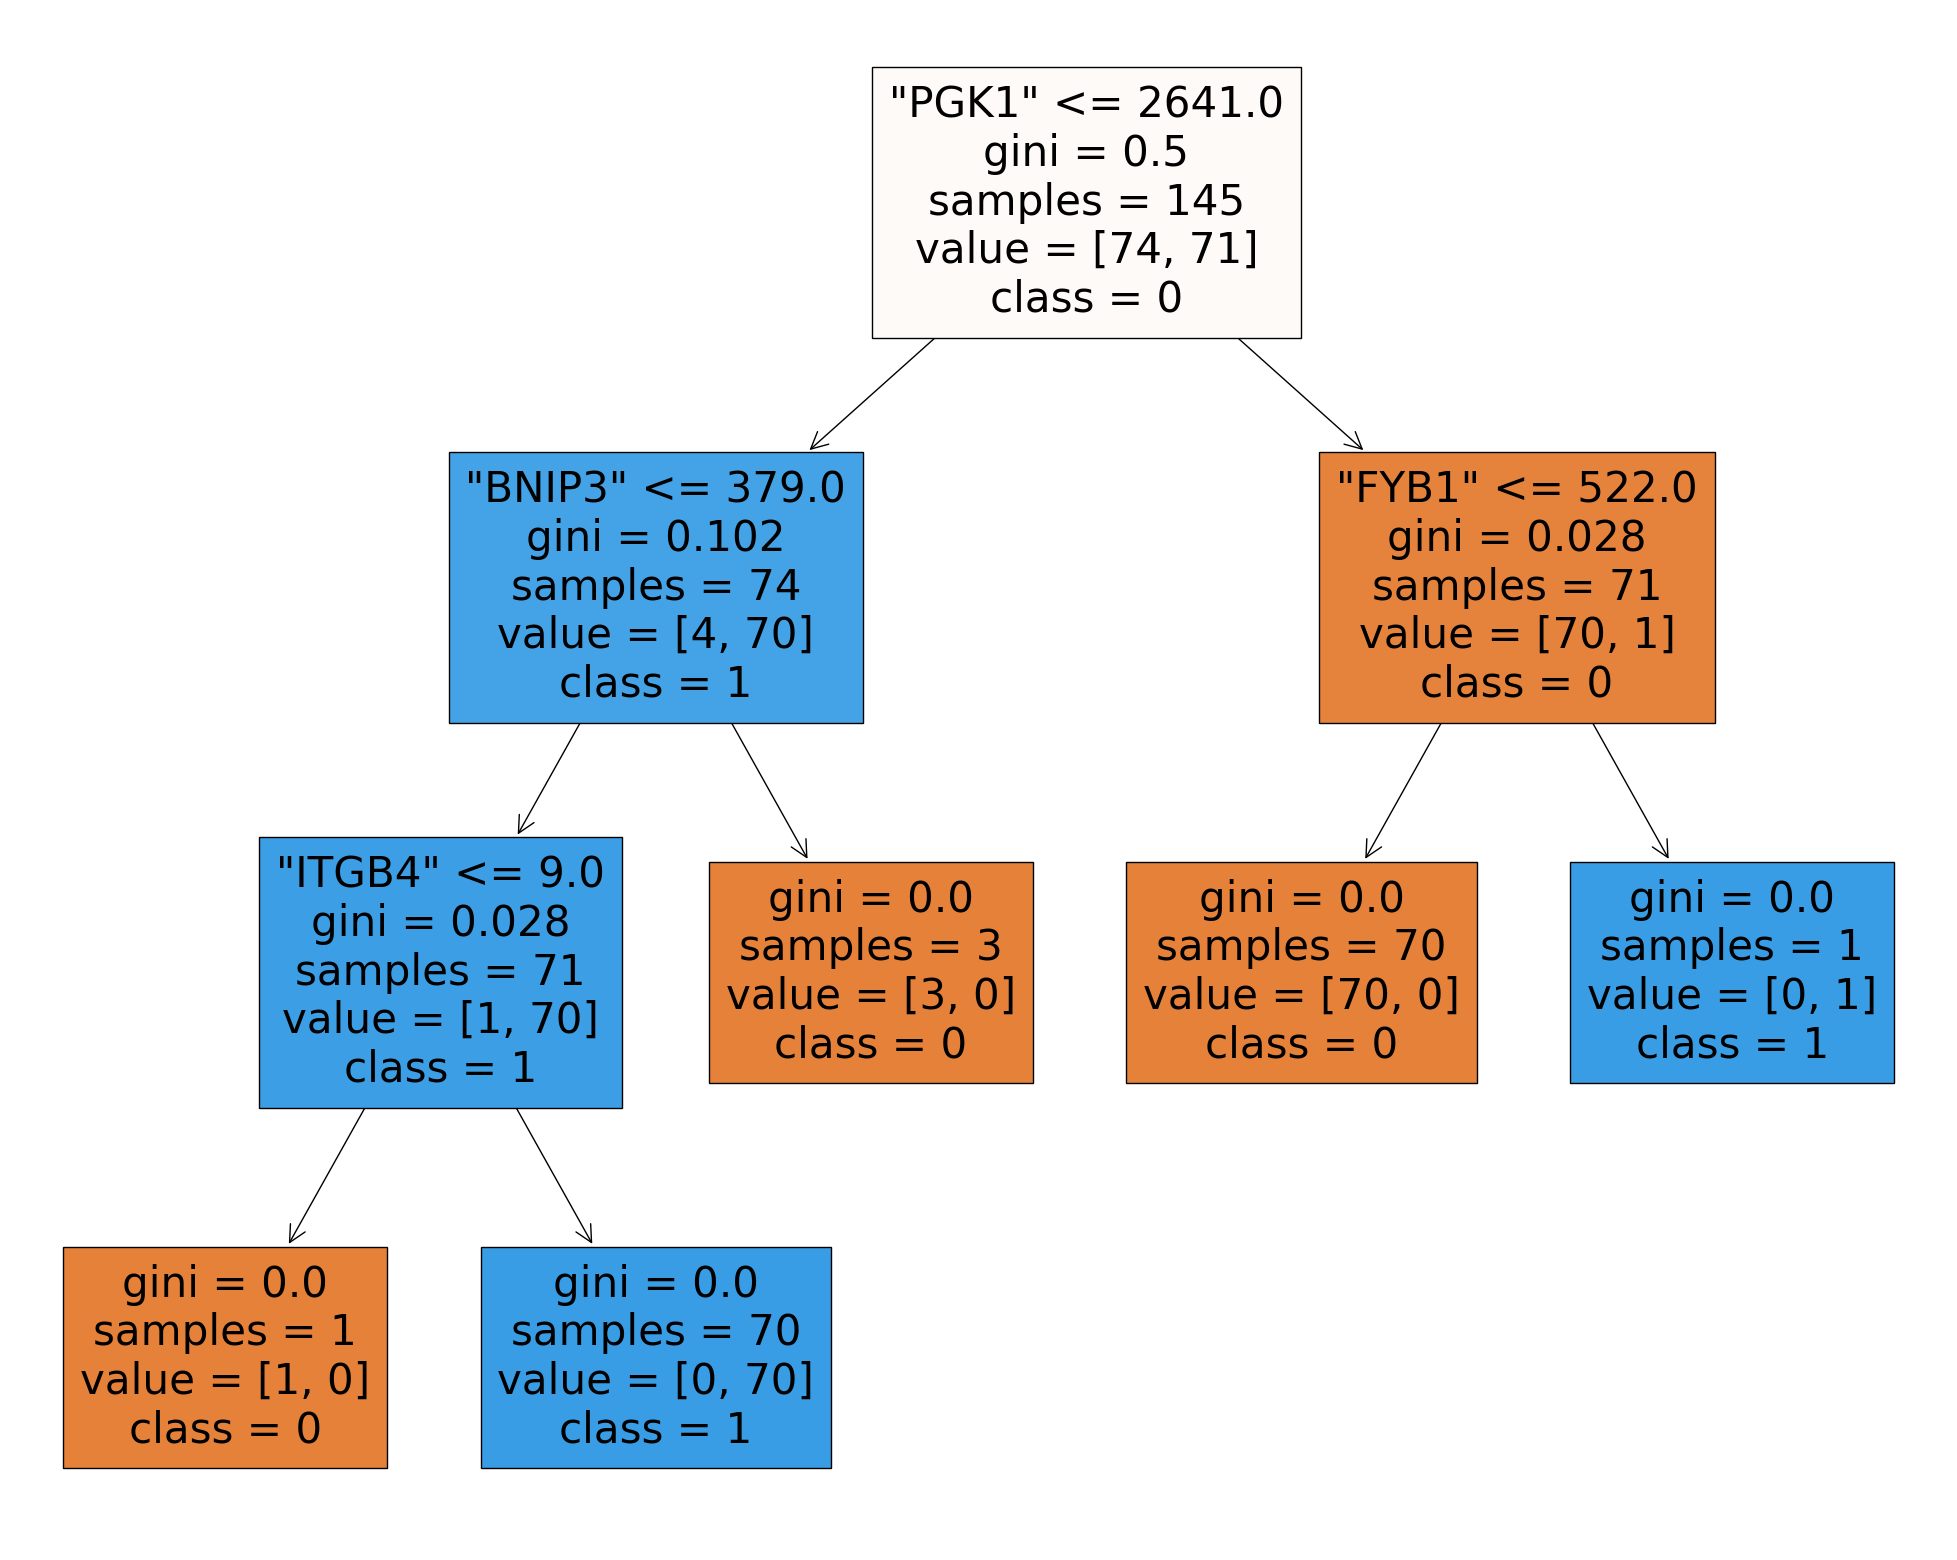

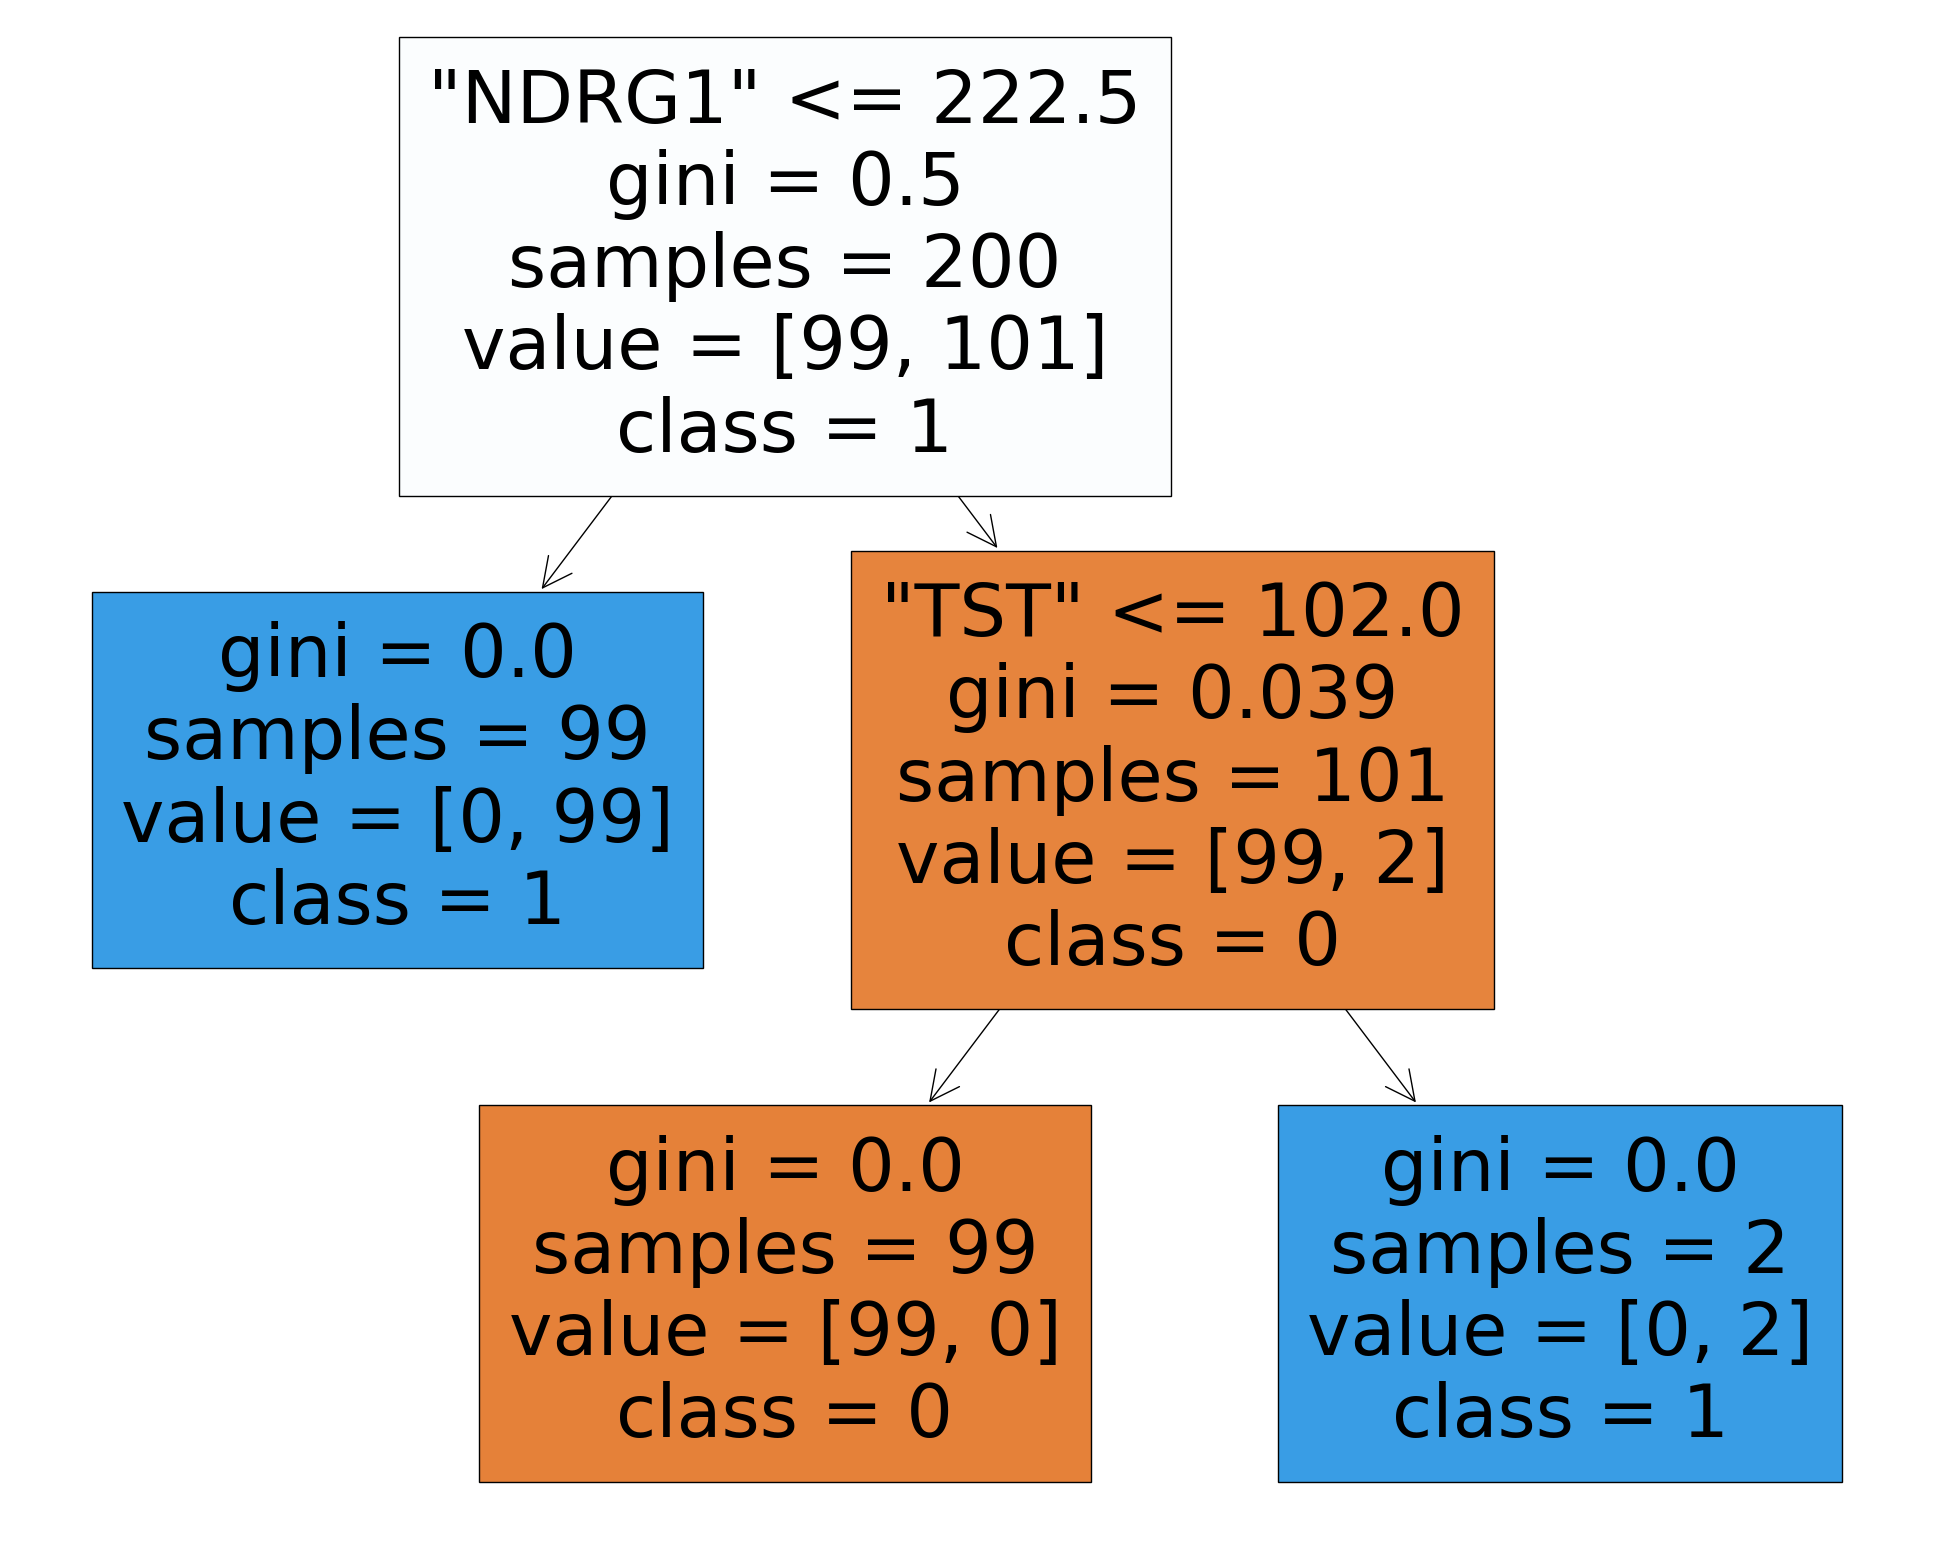

In [ ]:
datasets = [df1, df2, df3, df4]
test_datasets = [test_df1, test_df2, test_df3, test_df4]
for i, df in enumerate(datasets[::]):
    print(f"######   ANALAZYING DF{i+1} ##########")
    #NON NEURAL NETWORKS SUPERVISED LEARNING
    X = df.iloc[:,:-1].astype(float) # Features
    Y = df.iloc[:,-1:].astype(int) # Target variable
    #Ridge Regression
    print("Ridge Regression with data split")
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Randoms state is just a seed for RNG
    #Ridge Model
    model3 = Ridge(alpha=1.0).fit(x_train,y_train)
    y_pred = model3.predict(x_test)
    print("Mean Squared Error for Ridge Regression= ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error for Ridge Regression= ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared for Ridge Regression= ", r2_score(y_test, y_pred))
    
    coefficients = model3.coef_[0]
    feature_coefficients = list(zip(x_train.columns, coefficients))

    y_final = model3.predict(test_datasets[i])
    print(y_final)



    # Sort the feature coefficients by their absolute values
    sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

    # Print the most influential features
    
    for feature, coefficient in sorted_feature_coefficients[:10:]:
        print(f"In Ridge regression the 10 most influential genes are:{feature}: {coefficient}")

    #print("Accuracy",metrics.accuracy_score(y_test, y_pred))
    #logistic regression

    print("Logistic Regression with data split")
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Randoms state is just a seed for RNG

    model4 = LogisticRegression().fit(x_train,y_train)
    cv_scores = cross_val_score(model4, x_train, y_train.values.ravel(), cv=5)
    print(cv_scores)
    y_pred = model4.predict(x_test)
    print("Mean Squared Error for Logistic Regression= ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error for Logistic Regression = ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared for Logistic Regression= ", r2_score(y_test, y_pred))
    print("Accuracyfor Logistic Regression ",metrics.accuracy_score(y_test, y_pred))

    coefficients = model4.coef_[0]
    feature_coefficients = list(zip(x_train.columns, coefficients))

    # Sort the feature coefficients by their absolute values
    sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

    # Print the most influential features

    for feature, coefficient in sorted_feature_coefficients[:10:]:
        print(f"In logistic regression the 10 most influential genes are:{feature}: {coefficient}")
    y_final2 = model4.predict(test_datasets[i])
    print(y_final2)
    #Support Vector Machines 

    #split dataset in features and target variable
    X = df.iloc[:,:-1].astype(float) # Features
    Y = df.iloc[:,-1:].astype(int) # Target variable

    print(X.shape,Y.shape)
    print("SUPPORT VECTOR MACHINE LINEAR KERNEL")

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 70% training and 30% test
    clf = svm.SVC(kernel='linear', C=1).fit(x_train,y_train.values.ravel())
    clf.fit(x_train, y_train.values.ravel())
    cv_scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=5)
    print(cv_scores)    
    y_pred = clf.predict(x_test)
    print("Accuracy for Linear SVM", metrics.accuracy_score(y_test, y_pred))

    

    

    print("SUPPOR VECTOR MACHINE RBF KERNEL")
    clf = svm.SVC(kernel='rbf', C=1).fit(x_train,y_train.values.ravel())
    y_pred = clf.predict(x_test)
    cv_scores = cross_val_score(clf, x_train, y_train, cv=5)
    print(cv_scores)    
    print("Accuracy for RBF kernel SVM", metrics.accuracy_score(y_test, y_pred))
    print(clf.predict(test_datasets[i]))

    print("SUPPOR VECTOR MACHINE POLYNOMIAL KERNEL")
    clf = svm.SVC(kernel='poly', C=1).fit(x_train,y_train.values.ravel())
    cv_scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=5)
    print(cv_scores)    
    y_pred = clf.predict(x_test)    
    print("Accuracy For Polynomial SVM", metrics.accuracy_score(y_test, y_pred))
    #Decision Tree Classifier
    print("DECISION TREE CLASSIFIER")
    # # Load libraries

    X, Y = df.iloc[:,:-1].astype(float), df.iloc[:,-1].astype(int)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Randoms state is just a seed for RNG
    
    print("Random Forest Classifier")
    model6 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    model6.fit(x_train, y_train)
    cv_scores = cross_val_score(model6, x_train, y_train.values.ravel(), cv=5)
    print(cv_scores)
    y_pred = model6.predict(x_test)
    print("Accuracy = ", accuracy_score(y_test, y_pred))
    print("Confusion Matrix = ", confusion_matrix(y_test, y_pred))
    print("Classification Report = ", classification_report(y_test, y_pred))

    #Gradient Boosting Model
    model7 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    model7.fit(x_train, y_train)
    y_pred = model7.predict(x_test)
    print("Accuracy for Gradient Boosting= ", accuracy_score(y_test, y_pred))
    print("Confusion Matrix for Gradient Boosting= ", confusion_matrix(y_test, y_pred))
    print("Classification Report for Gradient Boosting= ", classification_report(y_test, y_pred))



    # %%
    #Decision Tree Classifier
    
    X, Y = df.iloc[:,:-1].astype(float), df.iloc[:,-1].astype(int)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Randoms state is just a seed for RNG
    dtc = DecisionTreeClassifier(random_state=42)
    dtc = dtc.fit(x_train,y_train)

    y_pred = dtc.predict(x_test)

    print("Accuracy for DTC:",metrics.accuracy_score(y_test, y_pred))
    print("Confusion Matrix for DTC= ", confusion_matrix(y_test, y_pred))
    print("Classification Report for DTC= ", classification_report(y_test, y_pred))
    print(dtc.predict(test_datasets[i]))

    if i<=1:     #Only print Smartseq since the Dropseq are unreadable
        text_representation = tree.export_text(dtc)
        print(text_representation)
        
        fig = plt.figure(figsize=(25,20))
        _ = tree.plot_tree(dtc, 
                        feature_names= X.columns,  
                        class_names=['0', '1'],
                        filled=True)


    #Cross Validation
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    results = cross_val_score(dtc, X, Y, cv=kfold)
    print("10-fold cross validation average accuracy: %.2f" % results.mean())


In [ ]:


#LOGISTIC REGRESSION
print("Logistic Regression in HCC1806 SmartSeq")
X = df1.iloc[:,:-1].astype(float) # Features
Y = df1.iloc[:,-1:].astype(int) # Target variable

model4 = LogisticRegression().fit(X,Y.values.ravel())
k = 5 
cv_scores = cross_val_score(model4, X, Y.values.ravel(), cv=k, scoring='accuracy')
hcc1806_SS = model4.predict(test_df1)
#print("Cross Validation Scores: ", cv_scores)
predictions.append(hcc1806_SS)

print("RBF SVM in MFC7 SmartSeq")
X = df2.iloc[:,:-1].astype(float) # Features
Y = df2.iloc[:,-1:].astype(int) # Target variable

clf = svm.SVC(kernel='rbf', C=1).fit(X,Y.values.ravel())
k = 5
cv_scores = cross_val_score(clf, X, Y.values.ravel(), cv=k, scoring='accuracy')
#print("Cross Validation Scores: ", cv_scores)
MCf7_SmartSeq = clf.predict(test_df2)
predictions.append(MCf7_SmartSeq)
#Implement K Fold Cross Validation

Logistic Regression in HCC1806 SmartSeq
RBF SVM in MFC7 SmartSeq


### Neural Networks

Following up are neuronal networks trained on the two dropseq datasets. Notice the number of epochs is indicative, since the early stop callback stops almost any k fold training around the 30th epoch. Both algorithm use ADAM which implements stochastic gradient descent. To avoid overfitting and cross validate, 5/7 K folds are used. Before training, 2000 samples were left to test the model before the effective test set was provided.

For the final validation test set, the last 2000 samples are reimplemented back in training and used to validate the model


#### Neural network optimized for HCC1806 DropSeq

Analysis of HCC1806 DropSeq
(14682, 3000) (14682, 1)
Restoring model weights from the end of the best epoch: 18.
Epoch 31: early stopping
92/92 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9588
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_324 (Dense)           (None, 256)               768256    
                                                                 
 dropout_258 (Dropout)       (None, 256)               0         
                                                                 
 dense_325 (Dense)           (None, 256)               65792     
                                                                 
 dropout_259 (Dropout)       (None, 256)               0         
                                                                 
 dense_326 (Dense)           (None, 256)               65792     
                          

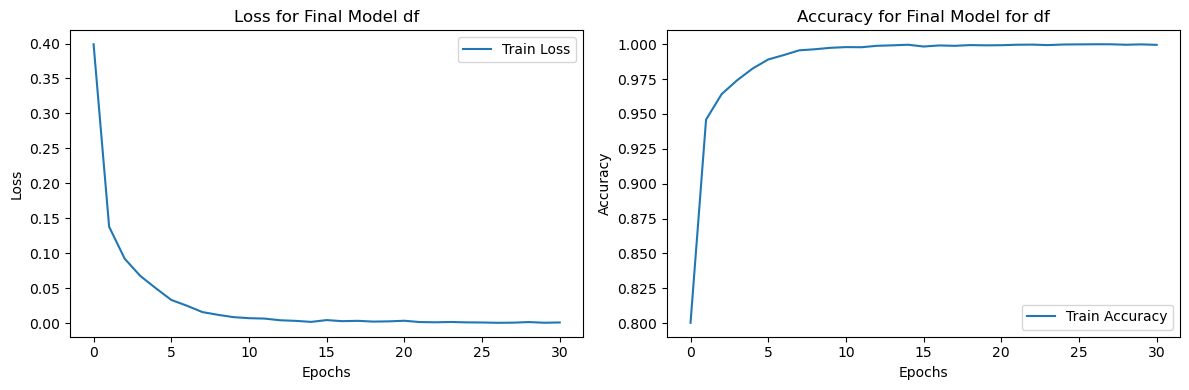

Restoring model weights from the end of the best epoch: 18.
Epoch 31: early stopping
92/92 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9517
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_329 (Dense)           (None, 256)               768256    
                                                                 
 dropout_262 (Dropout)       (None, 256)               0         
                                                                 
 dense_330 (Dense)           (None, 256)               65792     
                                                                 
 dropout_263 (Dropout)       (None, 256)               0         
                                                                 
 dense_331 (Dense)           (None, 256)               65792     
                                                                 
 dropout_264 

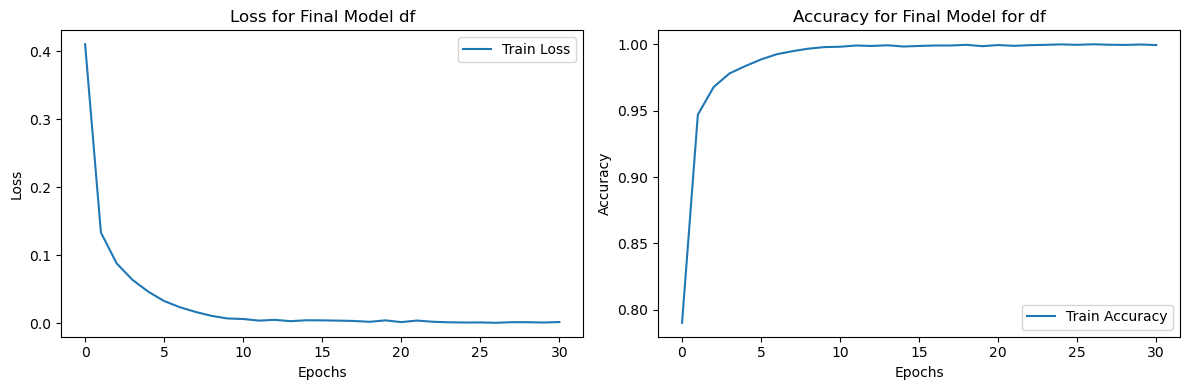

Restoring model weights from the end of the best epoch: 19.
Epoch 32: early stopping
92/92 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9636
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_334 (Dense)           (None, 256)               768256    
                                                                 
 dropout_266 (Dropout)       (None, 256)               0         
                                                                 
 dense_335 (Dense)           (None, 256)               65792     
                                                                 
 dropout_267 (Dropout)       (None, 256)               0         
                                                                 
 dense_336 (Dense)           (None, 256)               65792     
                                                                 
 dropout_268 

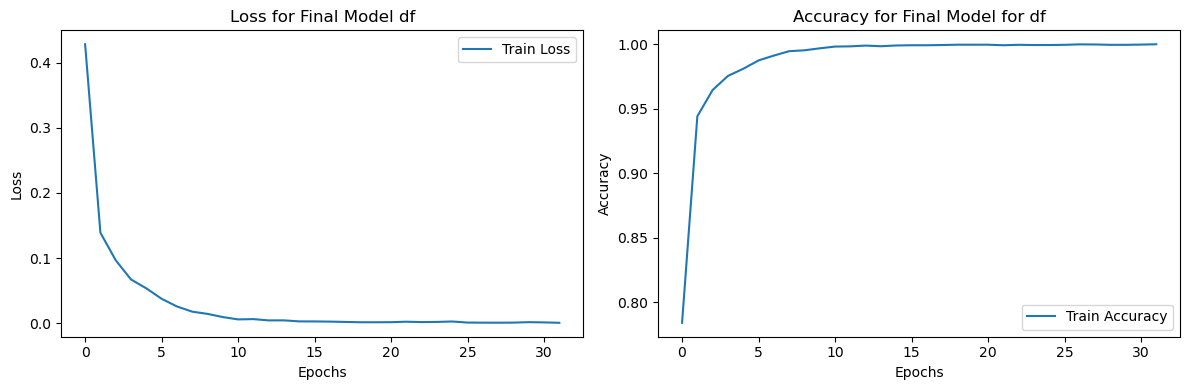

Restoring model weights from the end of the best epoch: 18.
Epoch 31: early stopping
92/92 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9629
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_339 (Dense)           (None, 256)               768256    
                                                                 
 dropout_270 (Dropout)       (None, 256)               0         
                                                                 
 dense_340 (Dense)           (None, 256)               65792     
                                                                 
 dropout_271 (Dropout)       (None, 256)               0         
                                                                 
 dense_341 (Dense)           (None, 256)               65792     
                                                                 
 dropout_272 

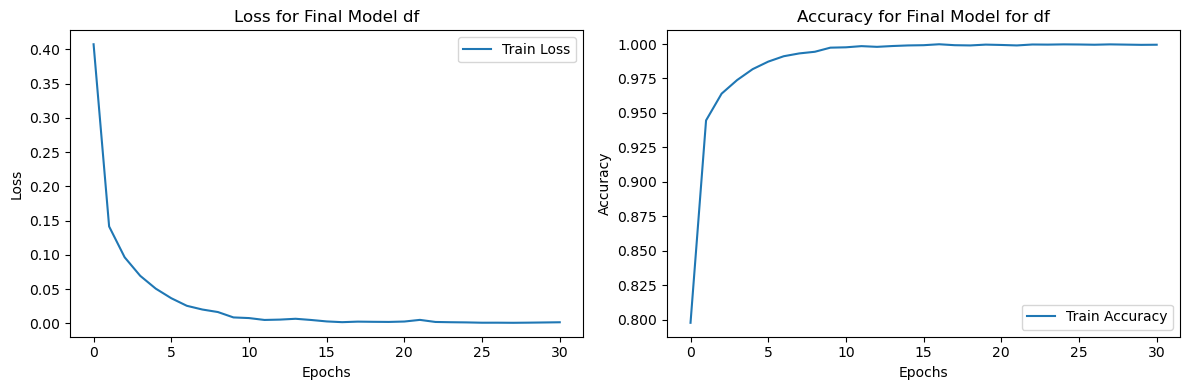

Restoring model weights from the end of the best epoch: 22.
Epoch 35: early stopping
92/92 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9591
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_344 (Dense)           (None, 256)               768256    
                                                                 
 dropout_274 (Dropout)       (None, 256)               0         
                                                                 
 dense_345 (Dense)           (None, 256)               65792     
                                                                 
 dropout_275 (Dropout)       (None, 256)               0         
                                                                 
 dense_346 (Dense)           (None, 256)               65792     
                                                                 
 dropout_276 

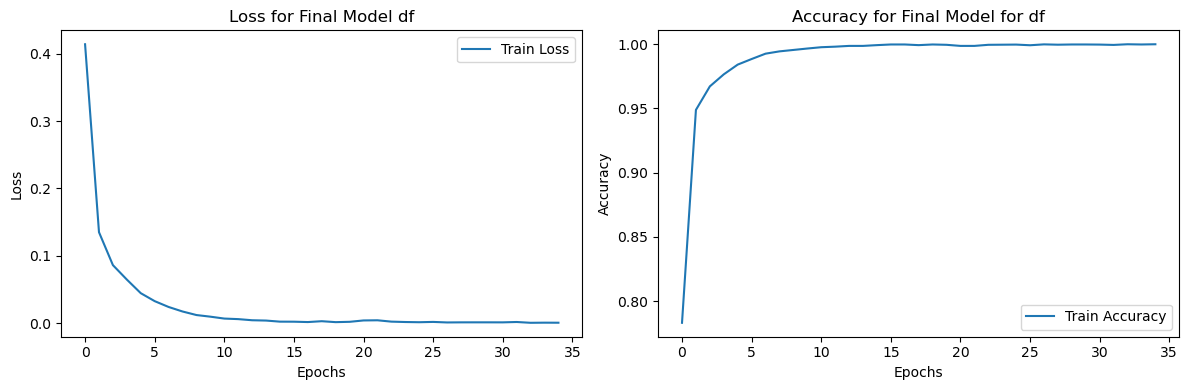

Mean Accuracy: 0.9592022895812988
For DF 1 we get accuracies of: [0.9588015079498291, 0.9516513347625732, 0.9635558724403381, 0.9628746509552002, 0.9591280817985535]
115/115 [==============================] - 0s 1ms/step


In [ ]:

# Assuming datasets is a list of your datasets

print("Analysis of HCC1806 DropSeq")
X = df3.iloc[:, :-1].astype(float)  # Features
Y = df3.iloc[:, -1:].astype(int)  # Target variable

print(X.shape, Y.shape)

kf = KFold(n_splits=5, shuffle=True, random_state=33)

accuracies = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        #loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        verbose=1,
        patience=13,
        mode='min',
        restore_best_weights=True,
        start_from_epoch=17
    )

    history = model.fit(
        x_train, y_train,
        batch_size=60,
        epochs=50,
        verbose=0,
        callbacks=[early_stopping],
        validation_data=(x_test, y_test)
    )

    accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy[1])
    model.summary()
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('Loss for Final Model df')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title('Accuracy for Final Model for df')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
#Summary : 2 hidden layer, 256 neurons, 0.2 dropout, 70 batch size, 150 epochs, 0.001 learning rate 
    

mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)
print("For DF", i, "we get accuracies of:", accuracies)

# Xt = df3.iloc[-2000:, :-1].astype(float)  # Features
# Yt = df3.iloc[-2000:, -1:].astype(int)  # Target variable

# final_history = model.evaluate(
#         Xt, Yt
# )

# model.summary() 
# print("Accuracy on the test set:", model.evaluate(Xt, Yt))
# # Plot the training history of the final model

hcc1806_DropSeq = model.predict(test_df3)
predictions.append(hcc1806_DropSeq)

2 hidden layes with 3 dropouts 0.2,

REPORTS
DF4
SUPPORT VECTOR MACHINE LINEAR KERNEL
(21626, 3000) (21626, 1)
136/136 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9771
Accuracy =  0.9771150946617126
Loss =  0.15413381159305573
ALTERNATIVE MODEL
WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
136/136 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9794
Accuracy =  0.9794267416000366
Loss =  0.11080124974250793

DF3
SUPPORT VECTOR MACHINE LINEAR KERNEL
(21626, 3000) (21626, 1)
136/136 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9771
Accuracy =  0.9771150946617126
Loss =  0.15413381159305573
ALTERNATIVE MODEL
WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
136/136 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9794
Accuracy =  0.9794267416000366
Loss =  0.11080124974250793

#### Neural network optimized for MCF7 DropSeq

Analysis of DF 1
(21626, 3000) (21626, 1)
Restoring model weights from the end of the best epoch: 1.
Epoch 24: early stopping
136/136 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9810


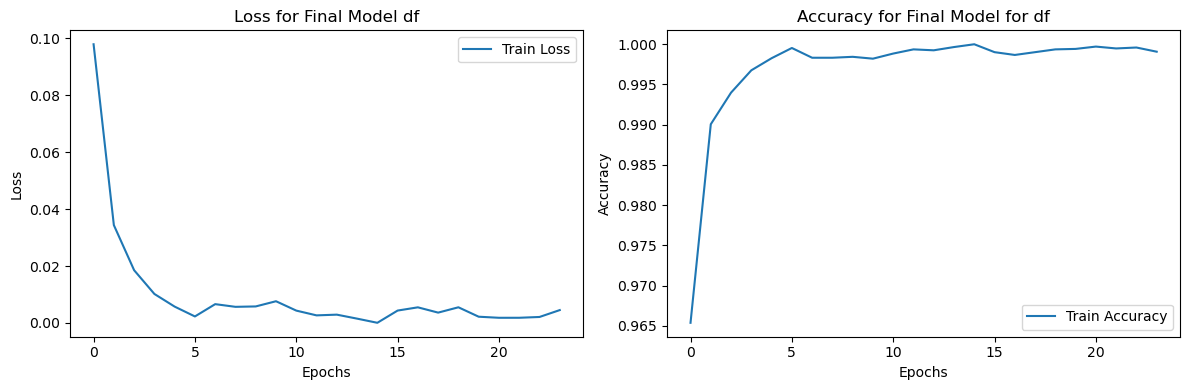

Restoring model weights from the end of the best epoch: 1.
Epoch 24: early stopping
136/136 [==============================] - 1s 4ms/step - loss: 0.0629 - accuracy: 0.9794


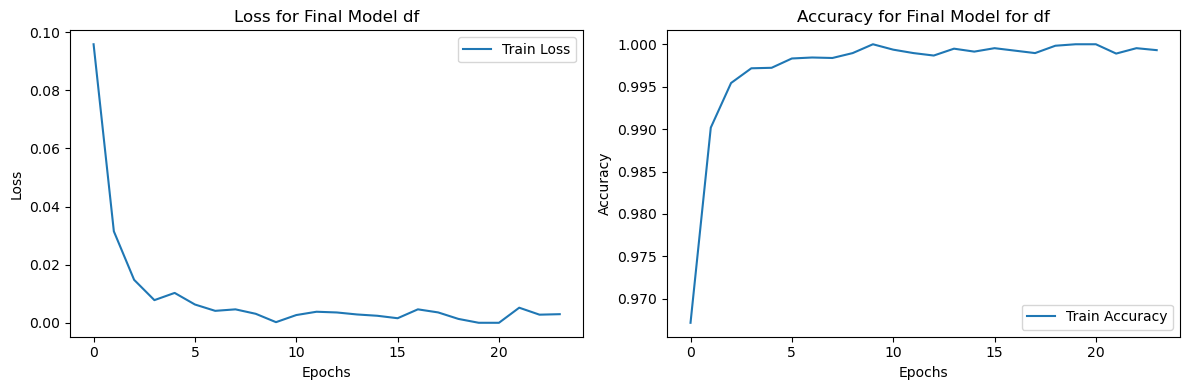

Restoring model weights from the end of the best epoch: 2.
Epoch 25: early stopping
136/136 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.9815


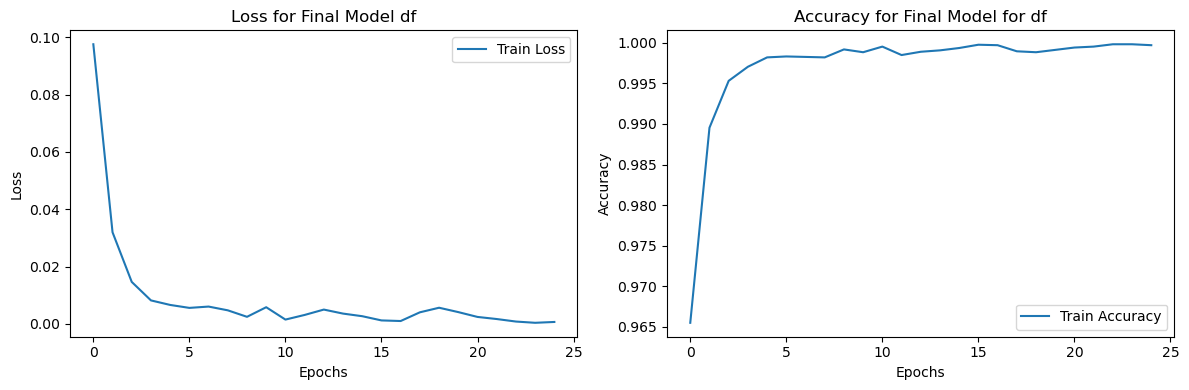

Restoring model weights from the end of the best epoch: 2.
Epoch 25: early stopping
136/136 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9799


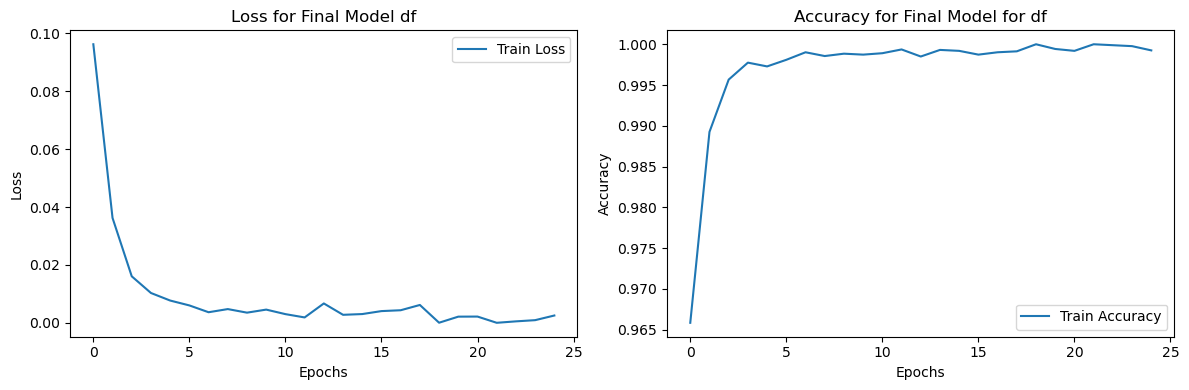

Restoring model weights from the end of the best epoch: 1.
Epoch 24: early stopping
136/136 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9817


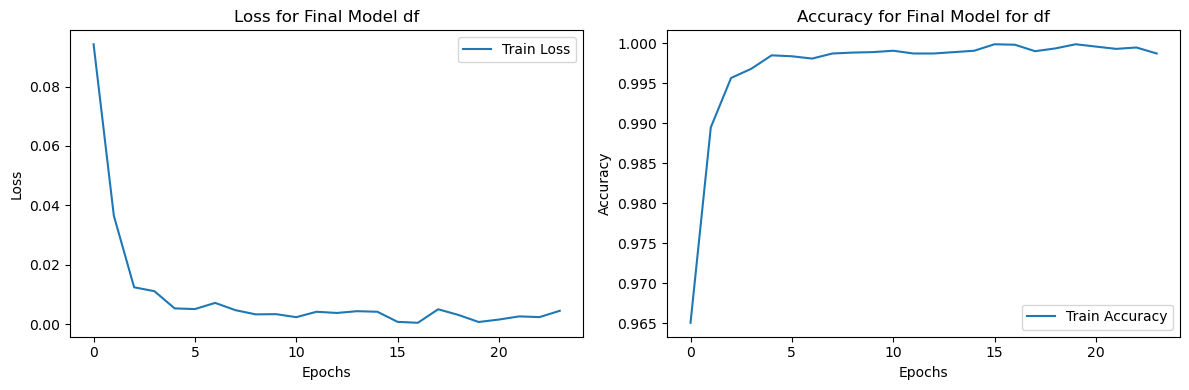

Mean Accuracy: 0.9807176351547241
For DF 1 we get accuracies of: [0.9810448288917542, 0.9794219732284546, 0.981502890586853, 0.9798843860626221, 0.9817340970039368]
169/169 [==============================] - 0s 1ms/step


In [ ]:
#BEST FOR MCF7
df = df4
print("Analysis of DF", i)
X = df.iloc[:, :-1].astype(float)  # Features
Y = df.iloc[:, -1:].astype(int)  # Target variable

print(X.shape, Y.shape)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        #loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        verbose=1,
        patience=23,
        mode='min',
        restore_best_weights=True
    )

    history = model.fit(
        x_train, y_train,
        batch_size=40,
        epochs=100,
        verbose=0,
        callbacks=[early_stopping],
        validation_data=(x_test, y_test)
    )

    accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy[1])

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('Loss for Final Model df')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title('Accuracy for Final Model for df')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)
print("For DF", i, "we get accuracies of:", accuracies)


# Xt = df.iloc[:, :-1].astype(float)  # Features
# Yt = df.iloc[:, -1:].astype(int)  # Target variable

# final_history = model.evaluate(
#     Xt, Yt
# )
# print("Accuracy on the test set:", final_history)

mcf7_DropSeq = model.predict(test_df4)
predictions.append(mcf7_DropSeq)




## Conclusion

Overall, our analysis has yielded various conclusions that we can sumarize below.

The logistic regression and decision tree algorithms carried out revieled a 1.0 accuracy score which is very high. It shows that the it has fully managed to summarize the influence of the gene expressions on SmartSeq datasets. Support vector machine also achieved abnormaly high accuracy scores. 

We therefore chose to implement neural networks which also achieved quite high accuracy scores however being more reliable by avoiding overfitting. We can observe that the neural network had a better performance on the MCF7 DROPSEQ file with 98% of accuracy rather than on the HCC1806 DROPSEQ data frame with about 96% of accuracy. Both accuracy scores are however very significant implying that using a neural network to predict the conditions of the cells is quite reliable. 

The low difference of accuracy between the neural networks run on both dataframes could probably imply that the difference is only due to the fact that the dimensionality is lower on Smartseq. The efficiency of the sequencing techniques could also have had an impact on the accuracy score of such model. In order to draw further conclusions, larger data sets would be required.


In [ ]:
for i, p in enumerate(predictions[:2:]):
    test_datasets[i]["Condition"] = p
    test_datasets[i]["Condition"].replace([1, 0], ["Normo", "Hypo"], inplace=True)
for i, p in enumerate(predictions[2::]):
    threshold = 0.5
    p = np.where(p > threshold, 1, 0)
    test_datasets[i+2]["Condition"] = p
    test_datasets[i+2]["Condition"].replace([1, 0], ["Normo", "Hypo"], inplace=True)


/var/folders/xf/lzrw4fbs51zg32gqtx_rzvbm0000gn/T/ipykernel_28357/2901066283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_datasets[i]["Condition"].replace([1, 0], ["Normo", "Hypo"], inplace=True)
/var/folders/xf/lzrw4fbs51zg32gqtx_rzvbm0000gn/T/ipykernel_28357/2901066283.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [ ]:
test_df1

"DDIT4"  "ANGPTL4"  "CALML5"  "KRT14"  "CCNB1"  "IGFBP3"  "AKR1C2"  \
"1"         0          0         0      169      233       227       521   
"2"      2475          0         0        0     3537       843       214   
"3"      9088       2143         0        0      124         0         0   
"4"      6909       3086         0      909       78       466       508   
"5"     13655       2196         0        1        1     14688      3872   
"6"      7684       1619         6       74        0      1205        79   
"7"     13038       1917         0      108      991       134       681   
"8"       640          1         0        1      128       168      2601   
"9"         3          1         0     1794      256      1075      3335   
"10"      542         81         0       99      180       183       660   
"11"     2072        140         0       42      516       112         0   
"12"      169        463         0        0     1091       109      2346   
"13"    17451       6189         0     1473      397        79       506   
"14"    12270        924         0     1842      296      1064        38   
"15"     6434       2564       673      614        1      2613      1269   
"16"     4820       3460         0       32     2237       441       823   
"17"      231          0         0       35     2219        67       633   
"18"      188         39         0        0      745      1194      4010   
"19"      237         46         0       76      161       110       776   
"20"        0         52         0      948       67        41      1169   
"21"        3          1      1237        1     1716      1001      2451   
"22"     4473       1434         0      710     2027       856      1864   
"23"     5527       1705         0       14        0      3713      1029   
"24"     4477       1756      1569      317      274      1776        29   
"25"       36          0         0      139      659        38       835   
"26"       81          0      1031     1264     1581      3921      6969   
"27"     1468         53         0     3705     2958         0      1068   
"28"     4945         62         0        1        1     15144      2308   
"29"       37          0         0      427     2268       843       359   
"30"    10509       4140         0       61      413      1437      1429   
"31"     6710        348      1172        0      522      1335        64   
"32"     1116          0         0       48     3952       182       140   
"33"       58          0      1166      164      204      1033     13381   
"34"    18584       3124         0      544      243       593        70   
"35"     3916        645      1946        1     2112       245        23   
"36"     4968       1634       797       53       81       464         1   
"37"      301        153         0      745     1647         7      2082   
"38"     2264        127         0        0      732       143        71   
"39"      122         47         0     1917      380       385      4022   
"40"     1845        643         0        1     3309       638       277   
"41"     3654       1807         0        0      973       104        80   
"42"      437          2      1526     3143       82      3354      1492   
"43"    10496          0         1      643        0      4300       215   
"44"     1506        374       635      349       26         0        21   
"45"     1035          0         0      998     5161       392       887   

      "KRT6A"  "NDRG1"  "KRT4"  ...  "ZYG11A"  "NRG1"  "RBMS3"  "VCPIP1"  \
"1"       577        0       0  ...         0     176        0         0   
"2"         0        3       0  ...         0     333        0        18   
"3"         0      415       0  ...         0       0       45         0   
"4"       193      453       0  ...         0      95      167         0   
"5"       184      884     176  ...         0       1        0         0   
"6"        92      696     208  ...         0       0

In [ ]:
test_df2

"CYP1B1"  "CYP1B1-AS1"  "CYP1A1"  "NDRG1"  "DDIT4"  "PFKFB3"  "HK2"  \
"1"        492           253         0     1157     6805      5447   2662   
"2"       7199          3245      7181     1857    20731      4374   5490   
"3"         12            11         1        5      147       301      9   
"4"        373           187         0        0       43        37      0   
"5"         31            13         0        0        0        44      8   
...        ...           ...       ...      ...      ...       ...    ...   
"59"       287           126       666     3270    25776     12144   1119   
"60"     15220          6316      1991      750    12176      7488   3172   
"61"     21998          8898     21329     1498     5144      1146    914   
"62"        39            17         1       29       20         0      0   
"63"       195            81         0        6       93        55      0   

      "AREG"  "MYBL2"  "ADM"  ...  "DNAI7"  "MAFG"  "LZTR1"  "BCO2"  "GRIK5"  \
"1"     2448        0     58  ...        0     193        0       0        0   
"2"        0        0   2150  ...        0     187        0       0        0   
"3"      647     1890      1  ...        0      28        0       0        0   
"4"        0      580      0  ...        0     131        0       0        0   
"5"        0      554      0  ...        0      30        0       0        0   
...      ...      ...    ...  ...      ...     ...      ...     ...      ...   
"59"       0        0    678  ...        0     473        0       0        0   
"60"    2030        0     64  ...        0      36        0       0        0   
"61"       0        0      0  ...        0       0        0       0        0   
"62"      88     1399      0  ...        0       0        0       0        0   
"63"       3      961     16  ...        0      22       20       0        0   

      "SLC25A27"  "DENND5A"  "CDK5R1"  "FAM13A-AS1"  Condition  
"1"            0        285         0             1       Hypo  
"2"            0         55         0             0       Hypo  
"3"            0          1         0             0      Normo  
"4"            0          3         0             0      Normo  
"5"            0          1         0             0      Normo  
...          ...        ...       ...           ...        ...  
"59"           0        315         0            26       Hypo  
"60"          34         78         0             0       Hypo  
"61"           0          0         0            35       Hypo  
"62"           0          0         0             0      Normo  
"63"           0          3         0             0      Normo  

[63 rows x 3001 columns]

In [ ]:
test_df3

"H1-5"  "MALAT1"  "MT-RNR2"  "ARVCF"  "BCYRN1"  "ATXN7L2"  "IGFBP3"  \
"1"          0         3          1        0         2          0         0   
"2"          0         1          0        0         1          0         0   
"3"          2         1          0        0         1          0         0   
"4"          0         0          0        0         0          0         0   
"5"          0         0          0        0         0          0         0   
...        ...       ...        ...      ...       ...        ...       ...   
"3667"       1         5          1        0         0          0         0   
"3668"       0         5          0        0         0          0         0   
"3669"       0         0          0        0         2          0         0   
"3670"       0         0          0        0         3          0         1   
"3671"       3         0          0        0         0          0         0   

        "H1-3"  "CTIF"  "RNF123"  ...  "CDKN3"  "DLD"  "PMPCA"  "ZNF165"  \
"1"          0       0         0  ...        0      0        0         0   
"2"          0       0         0  ...        0      0        0         0   
"3"          1       0         0  ...        0      0        0         0   
"4"          1       0         0  ...        0      0        0         0   
"5"          0       0         0  ...        0      0        0         0   
...        ...     ...       ...  ...      ...    ...      ...       ...   
"3667"       0       0         0  ...        0      0        0         0   
"3668"       0       0         0  ...        0      0        1         0   
"3669"       0       0         0  ...        0      0        0         0   
"3670"       1       0         0  ...        0      0        0         0   
"3671"       3       0         0  ...        0      0        0         0   

        "SCCPDH"  "NTAN1"  "CLIP2"  "DUSP23"  "ZNF682"  Condition  
"1"            0        0        0         0         0      Normo  
"2"            0        0        0         0         0      Normo  
"3"            0        0        0         0         0      Normo  
"4"            0        0        0         0         0       Hypo  
"5"            0        0        0         0         0       Hypo  
...          ...      ...      ...       ...       ...        ...  
"3667"         0        0        0         0         0      Normo  
"3668"         0        0        0         0         0       Hypo  
"3669"         0        0        0         0         0       Hypo  
"3670"         0        0        0         0         0       Hypo  
"3671"         0        0        0         0         0      Normo  

[3671 rows x 3001 columns]

In [ ]:
test_df4

"MALAT1"  "MT-RNR2"  "NEAT1"  "H1-5"  "TFF1"  "MT-RNR1"  "H4C3"  \
"1"            0          0        0       0       3          0       0   
"2"            0          2        0       0       5          0       3   
"3"            3          1        0       0       2          0       0   
"4"            0          0        0       0       3          0       2   
"5"            1          0        0       0       3          0       8   
...          ...        ...      ...     ...     ...        ...     ...   
"5402"         0          0        0       0       3          0       3   
"5403"         0          0        0       0       2          0       1   
"5404"         1          0        0       0       0          0       1   
"5405"         5          0        0       0       0          1       0   
"5406"         1          0        0       0       1          0       2   

        "GDF15"  "KRT81"  "MT-CO3"  ...  "SKIDA1"  "MICALL1"  "RARG"  "MYO1F"  \
"1"           0        0         0  ...         0          0       0        0   
"2"           0        0         0  ...         0          0       0        0   
"3"           0        0         0  ...         0          0       0        0   
"4"           0        0         0  ...         0          0       0        0   
"5"           0        0         0  ...         0          0       0        0   
...         ...      ...       ...  ...       ...        ...     ...      ...   
"5402"        0        0         0  ...         0          0       0        0   
"5403"        0        0         0  ...         0          0       0        0   
"5404"        0        0         0  ...         0          0       0        0   
"5405"        0        0         0  ...         0          0       0        0   
"5406"        0        0         0  ...         0          0       0        0   

        "BRWD1-AS2"  "RPS19BP1"  "AUNIP"  "TNK2"  "SUDS3"  Condition  
"1"               0           0        0       0        0       Hypo  
"2"               0           0        0       0        0      Normo  
"3"               0           0        0       0        0      Normo  
"4"               0           0        0       0        0       Hypo  
"5"               0           0        0       0        0       Hypo  
...             ...         ...      ...     ...      ...        ...  
"5402"            0           0        0       0        0       Hypo  
"5403"            0           0        0       0        2      Normo  
"5404"            0           0        0       0        1       Hypo  
"5405"            0           0        0       0        3      Normo  
"5406"            0           0        0       0        0       Hypo  

[5406 rows x 3001 columns]

In [ ]:
HccSmartpred = test_df1.to_csv("HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep="\t")
McfSmartpred = test_df2.to_csv("MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep="\t")
HccDroppred = test_df3.to_csv("HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", sep="\t")
McfDroppred = test_df4.to_csv("MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", sep="\t")


pandas.core.frame.DataFrame